In [1]:
run_gridsearch = True
skip_best_model_train = False
hyperparam_csv_file = "CV_warm_springs_daily_hyperparams.csv"

In [2]:
import sys
import os
import itertools
import pandas as pd
current_dir = os.getcwd()
print(current_dir)

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', '', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']


In [4]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot
from UCB_training.UCB_utils import combinedPlotFromDf
from UCB_training.UCB_utils import fancyCombinedPlotFromDf

In [5]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'warm_springs_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("warm_springs")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all
Train Basin File Exists: False


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("warm_springs_dam_nlayer.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/WarmSprings_Inflow_daily.csv")

In [7]:
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL',
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE',
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL',
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE',
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
]

In [8]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length": [90, 180],
    "num_layers": [1, 2],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

In [9]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"NoPhysics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=False,
            extend_train_period=False,
            gpu=0
        )
        metrics_dict = trainer.cross_validate()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        no_physics_results.append(row_data)
    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="avg NSE", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping Grid-Search")

NoPhysics: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-03-11 22:43:24,980: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\output.log initialized.
2025-03-11 22:43:24,981: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324


2025-03-11 22:43:24,983: ### Run configurations for testing_run
2025-03-11 22:43:24,983: experiment_name: testing_run
2025-03-11 22:43:24,984: train_basin_file: warm springs
2025-03-11 22:43:24,985: validation_basin_file: warm springs
2025-03-11 22:43:24,986: test_basin_file: warm springs
2025-03-11 22:43:24,986: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:43:24,986: train_end_date: 1996-10-01 00:00:00
2025-03-11 22:43:24,987: validation_start_date: 1996-10-02 00:00:00
2025-03-11 22:43:24,987: validation_end_date: 1997-10-01 00:00:00
2025-03-11 22:43:24,988: test_start_date: 2005-10-01 00:00:00
2025-03-11 22:43:24,989: test_end_date: 2009-09-29 00:00:00
2025-03-11 22:43:24,989: device: cuda:0
2025-03-11 22:43:24,989: physics_informed: False
2025-03-11 22:43:24,990: physics_data_file: None
2025-03-11 22:43:24,990: validate_every: 5
2025-03-11 22:43:24,991: validate_n_random_basins: 1
2025-03-11 22:43:24,991: metrics: ['NSE', 'MSE']
2025-03-11 22:43:24,991: model: cudalstm
2025-0

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
2025-03-11 22:43:31,942: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:43:31,945: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\validation\model_epoch016\validation_results.p
2025-03-11 22:43:32,002: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\output.log initialized.
2025-03-11 22:43:32,003: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332
2025-03-11 22:43:32,004: ### Run configurations for testing_run
2025-03-11 22:43:32,004: experiment_name: testing_run
2025-03-11 22:43:32,005: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.00it/s]
2025-03-11 22:43:32,211: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:43:32,226: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 97.03it/s, Loss: 0.0000]
2025-03-11 22:43:32,427: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 98.62it/s, Loss: 0.0000]
2025-03-11 22:43:32,491: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 98.62it/s, Loss: 0.0000]
2025-03-11 22:43:32,555: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 97.03it/s, Loss: 0.0000]
2025-03-11 22:43:32,619: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 100.27it/s, Loss: 0.0000]
2025-03-11 22:43:32,681: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:43:34,616: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:43:34,618: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\validation\model_epoch016\validation_results.p
2025-03-11 22:43:34,667: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334\output.log initialized.
2025-03-11 22:43:34,668: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334
2025-03-11 22:43:34,668: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:43:34,849: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.87it/s]
2025-03-11 22:43:34,863: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 57.12it/s, Loss: 0.0000]
2025-03-11 22:43:35,156: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 57.12it/s, Loss: 0.0000]
2025-03-11 22:43:35,316: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 57.81it/s, Loss: 0.0000]
2025-03-11 22:43:35,475: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 97.01it/s, Loss: 0.0000]
2025-03-11 22:43:35,569: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 106.20it/s, Loss: 0.0000]
2025-03-11 22:43:35,657: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:43:37,842: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:43:37,844: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334\validation\model_epoch016\validation_results.p
2025-03-11 22:43:37,893: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334\testing_run_1103_224337\output.log initialized.
2025-03-11 22:43:37,894: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
2025-03-11 22:43:38,084: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:43:38,098: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 87.17it/s, Loss: 0.0000]
2025-03-11 22:43:38,374: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:43:38,550: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 86.56it/s, Loss: 0.0000]
2025-03-11 22:43:38,691: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 86.50it/s, Loss: 0.0000]
2025-03-11 22:43:38,832: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 86.57it/s, Loss: 0.0000]
2025-03-11 22:43:38,973: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:43:41,817: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334\testing_run_1103_224337\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:43:41,821: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224324\testing_run_1103_224332\testing_run_1103_224334\testing_run_1103_224337\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.794044628739357, 'MSE': 318758.28125, 'RMSE': 564.5868234824472, 'KGE': 0.7448188809375136, 'Alpha-NSE': 0.7728040814399719, 'Beta-KGE': 0.94017493724823, 'Beta-NSE': -0.019826728850603104, 'Pearson-r': 0.9003988956768313, 'FHV': -30.169010162353516, 'FMS': 1602.0473663573096, 'FLV': 99.99999498658477, 'Peak-Timing': 1.0, 'Peak-MAPE': 46.35575711727142}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:43:42,053: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.53it/s]
2025-03-11 22:43:42,067: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 60.14it/s, Loss: 0.0000]
2025-03-11 22:43:42,236: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 57.86it/s, Loss: 0.0000]
2025-03-11 22:43:42,290: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:43:42,340: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 56.73it/s, Loss: 0.0000]
2025-03-11 22:43:42,396: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 56.73it/s, Loss: 0.0000]
2025-03-11 22:43:42,452: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]
2025-03-11 22:43:45,823: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:43:45,825: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\validation\model_epoch032\validation_results.p
2025-03-11 22:43:45,873: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\output.log initialized.
2025-03-11 22:43:45,874: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345
2025-03-11 22:43:45,874: ### Run configurations for testing_run
2025-03-11 22:43:45,875: experiment_name: testing_run
2025-03-11 22:43:45,875: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:43:46,053: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:43:46,067: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 55.21it/s, Loss: 0.0000]
2025-03-11 22:43:46,301: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:43:46,411: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 56.22it/s, Loss: 0.0000]
2025-03-11 22:43:46,521: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:43:46,630: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 57.89it/s, Loss: 0.0000]
2025-03-11 22:43:46,736: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:43:50,637: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:43:50,638: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\validation\model_epoch032\validation_results.p
2025-03-11 22:43:50,687: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350\output.log initialized.
2025-03-11 22:43:50,688: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350
2025-03-11 22:43:50,688: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:43:50,870: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:43:50,884: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 52.62it/s, Loss: 0.0000]
2025-03-11 22:43:51,184: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 50.09it/s, Loss: 0.0000]
2025-03-11 22:43:51,366: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 51.57it/s, Loss: 0.0000]
2025-03-11 22:43:51,543: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 94.00it/s, Loss: 0.0000]
2025-03-11 22:43:51,642: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 106.06it/s, Loss: 0.0000]
2025-03-11 22:43:51,729: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
2025-03-11 22:43:56,450: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:43:56,451: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350\validation\model_epoch032\validation_results.p
2025-03-11 22:43:56,500: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350\testing_run_1103_224356\output.log initialized.
2025-03-11 22:43:56,500: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:43:56,686: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.13it/s]
2025-03-11 22:43:56,700: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 51.64it/s, Loss: 0.0000]
2025-03-11 22:43:57,065: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 53.59it/s, Loss: 0.0000]
2025-03-11 22:43:57,292: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 70.44it/s, Loss: 0.0000]
2025-03-11 22:43:57,464: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 103.77it/s, Loss: 0.0000]
2025-03-11 22:43:57,583: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 102.81it/s, Loss: 0.0000]
2025-03-11 22:43:57,702: Epoch 5 aver

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:44:03,743: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350\testing_run_1103_224356\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:03,745: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224341\testing_run_1103_224345\testing_run_1103_224350\testing_run_1103_224356\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7918501198291779, 'MSE': 322154.71875, 'RMSE': 567.5867499774814, 'KGE': 0.6600155200563942, 'Alpha-NSE': 0.6680135726928711, 'Beta-KGE': 0.9989319443702698, 'Beta-NSE': -0.0003539746976457536, 'Pearson-r': 0.926697080934356, 'FHV': -35.63970625400543, 'FMS': 35.68905974706454, 'FLV': -8072.079529516627, 'Peak-Timing': 1.0, 'Peak-MAPE': 46.38831913471222}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:44:03,977: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.54it/s]
2025-03-11 22:44:03,991: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 83.55it/s, Loss: 0.0000]
2025-03-11 22:44:04,149: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 87.91it/s, Loss: 0.0000]
2025-03-11 22:44:04,186: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 86.86it/s, Loss: 0.0000]
2025-03-11 22:44:04,223: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 85.94it/s, Loss: 0.0000]
2025-03-11 22:44:04,260: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 85.94it/s, Loss: 0.0000]
2025-03-11 22:44:04,297: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:44:06,141: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:06,144: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\validation\model_epoch016\validation_results.p
2025-03-11 22:44:06,193: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\output.log initialized.
2025-03-11 22:44:06,193: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406
2025-03-11 22:44:06,194: ### Run configurations for testing_run
2025-03-11 22:44:06,194: experiment_name: testing_run
2025-03-11 22:44:06,194: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:44:06,372: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.51it/s]
2025-03-11 22:44:06,385: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 52.33it/s, Loss: 0.0000]
2025-03-11 22:44:06,628: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 52.31it/s, Loss: 0.0000]
2025-03-11 22:44:06,746: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 53.70it/s, Loss: 0.0000]
2025-03-11 22:44:06,860: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 109.33it/s, Loss: 0.0000]
2025-03-11 22:44:06,918: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 105.49it/s, Loss: 0.0000]
2025-03-11 22:44:06,978: Epoch 5 average loss: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:44:08,894: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:08,896: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\validation\model_epoch016\validation_results.p
2025-03-11 22:44:08,945: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408\output.log initialized.
2025-03-11 22:44:08,945: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408
2025-03-11 22:44:08,946: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:44:09,124: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.94it/s]
2025-03-11 22:44:09,137: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 55.25it/s, Loss: 0.0000]
2025-03-11 22:44:09,429: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 57.33it/s, Loss: 0.0000]
2025-03-11 22:44:09,588: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 75.69it/s, Loss: 0.0000]
2025-03-11 22:44:09,709: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 103.69it/s, Loss: 0.0000]
2025-03-11 22:44:09,798: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 101.39it/s, Loss: 0.0000]
2025-03-11 22:44:09,890: Epoch 5 average loss: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:44:12,126: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:12,128: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408\validation\model_epoch016\validation_results.p
2025-03-11 22:44:12,178: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408\testing_run_1103_224412\output.log initialized.
2025-03-11 22:44:12,179: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:44:12,364: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.20it/s]
2025-03-11 22:44:12,377: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 83.53it/s, Loss: 0.0000]
2025-03-11 22:44:12,653: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 84.76it/s, Loss: 0.0000]
2025-03-11 22:44:12,796: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 85.32it/s, Loss: 0.0000]
2025-03-11 22:44:12,940: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 85.04it/s, Loss: 0.0000]
2025-03-11 22:44:13,084: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 86.56it/s, Loss: 0.0000]
2025-03-11 22:44:13,225: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]
2025-03-11 22:44:16,077: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408\testing_run_1103_224412\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:16,080: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224403\testing_run_1103_224406\testing_run_1103_224408\testing_run_1103_224412\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.7943828999996185, 'MSE': 318234.71875, 'RMSE': 564.1229642108182, 'KGE': 0.6210639602641506, 'Alpha-NSE': 0.6867155432701111, 'Beta-KGE': 0.800474226474762, 'Beta-NSE': -0.06612517684698105, 'Pearson-r': 0.9249344481049858, 'FHV': -35.46401858329773, 'FMS': 131.5304228345841, 'FLV': -1487.466893549448, 'Peak-Timing': 1.0, 'Peak-MAPE': 50.79917907714844}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:44:16,312: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:44:16,326: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 79.16it/s, Loss: 0.0000]
2025-03-11 22:44:16,485: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 83.56it/s, Loss: 0.0000]
2025-03-11 22:44:16,523: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 81.30it/s, Loss: 0.0000]
2025-03-11 22:44:16,563: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 79.16it/s, Loss: 0.0000]
2025-03-11 22:44:16,604: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 85.95it/s, Loss: 0.0000]
2025-03-11 22:44:16,642: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:44:20,191: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:20,193: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\validation\model_epoch032\validation_results.p
2025-03-11 22:44:20,241: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\output.log initialized.
2025-03-11 22:44:20,241: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420
2025-03-11 22:44:20,242: ### Run configurations for testing_run
2025-03-11 22:44:20,242: experiment_name: testing_run
2025-03-11 22:44:20,243: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:44:20,422: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:44:20,435: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 96.33it/s, Loss: 0.0000]
2025-03-11 22:44:20,623: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 97.95it/s, Loss: 0.0000]
2025-03-11 22:44:20,687: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 98.62it/s, Loss: 0.0000]
2025-03-11 22:44:20,750: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 99.33it/s, Loss: 0.0000]
2025-03-11 22:44:20,814: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 103.68it/s, Loss: 0.0000]
2025-03-11 22:44:20,874: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:44:24,843: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:24,844: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\validation\model_epoch032\validation_results.p
2025-03-11 22:44:24,894: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424\output.log initialized.
2025-03-11 22:44:24,894: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424
2025-03-11 22:44:24,895: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:44:25,078: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:44:25,092: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 33.73it/s, Loss: 0.0000]
2025-03-11 22:44:25,490: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 80.55it/s, Loss: 0.0000]
2025-03-11 22:44:25,604: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 103.59it/s, Loss: 0.0000]
2025-03-11 22:44:25,694: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 102.55it/s, Loss: 0.0000]
2025-03-11 22:44:25,784: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 106.16it/s, Loss: 0.0000]
2025-03-11 22:44:25,872: Epoch 5 average loss:

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:44:30,751: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:30,753: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424\validation\model_epoch032\validation_results.p
2025-03-11 22:44:30,803: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424\testing_run_1103_224430\output.log initialized.
2025-03-11 22:44:30,804: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:44:30,990: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:44:31,004: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 52.55it/s, Loss: 0.0000]
2025-03-11 22:44:31,365: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 55.19it/s, Loss: 0.0000]
2025-03-11 22:44:31,584: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 54.68it/s, Loss: 0.0000]
2025-03-11 22:44:31,805: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 102.80it/s, Loss: 0.0000]
2025-03-11 22:44:31,924: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 103.69it/s, Loss: 0.0000]
2025-03-11 22:44:32,043: Epoch 5 aver

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:44:38,019: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424\testing_run_1103_224430\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:38,020: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224416\testing_run_1103_224420\testing_run_1103_224424\testing_run_1103_224430\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8464904129505157, 'MSE': 237587.640625, 'RMSE': 487.4296263308171, 'KGE': 0.7416987444489826, 'Alpha-NSE': 0.749710738658905, 'Beta-KGE': 1.0201513767242432, 'Beta-NSE': 0.006678396370261908, 'Pearson-r': 0.9394298234055847, 'FHV': -25.653168559074402, 'FMS': 13.953954631460396, 'FLV': -7956.0157848036, 'Peak-Timing': 1.0, 'Peak-MAPE': 40.443119406700134}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
2025-03-11 22:44:38,251: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.70it/s]
2025-03-11 22:44:38,264: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:44:38,449: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 73.32it/s, Loss: 0.0000]
2025-03-11 22:44:38,493: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 75.21it/s, Loss: 0.0000]
2025-03-11 22:44:38,536: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 75.26it/s, Loss: 0.0000]
2025-03-11 22:44:38,579: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:44:38,621: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]
2025-03-11 22:44:40,493: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:40,494: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\validation\model_epoch016\validation_results.p
2025-03-11 22:44:40,541: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\output.log initialized.
2025-03-11 22:44:40,542: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440
2025-03-11 22:44:40,543: ### Run configurations for testing_run
2025-03-11 22:44:40,544: experiment_name: testing_run
2025-03-11 22:44:40,544: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:44:40,726: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:44:40,740: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 88.44it/s, Loss: 0.0000]
2025-03-11 22:44:40,940: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 90.49it/s, Loss: 0.0000]
2025-03-11 22:44:41,009: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 64.18it/s, Loss: 0.0000]
2025-03-11 22:44:41,104: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:44:41,172: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 92.31it/s, Loss: 0.0000]
2025-03-11 22:44:41,240: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:44:43,312: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:43,313: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\validation\model_epoch016\validation_results.p
2025-03-11 22:44:43,363: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443\output.log initialized.
2025-03-11 22:44:43,363: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443
2025-03-11 22:44:43,364: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
2025-03-11 22:44:43,556: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:44:43,570: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 73.00it/s, Loss: 0.0000]
2025-03-11 22:44:43,817: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 74.98it/s, Loss: 0.0000]
2025-03-11 22:44:43,926: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 74.25it/s, Loss: 0.0000]
2025-03-11 22:44:44,037: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 75.64it/s, Loss: 0.0000]
2025-03-11 22:44:44,146: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 75.69it/s, Loss: 0.0000]
2025-03-11 22:44:44,253: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:44:46,689: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:46,691: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443\validation\model_epoch016\validation_results.p
2025-03-11 22:44:46,740: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443\testing_run_1103_224446\output.log initialized.
2025-03-11 22:44:46,741: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:44:46,924: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.83it/s]
2025-03-11 22:44:46,938: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 76.90it/s, Loss: 0.0000]
2025-03-11 22:44:47,223: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:44:47,367: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 77.11it/s, Loss: 0.0000]
2025-03-11 22:44:47,512: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.78it/s, Loss: 0.0000]
2025-03-11 22:44:47,654: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 77.12it/s, Loss: 0.0000]
2025-03-11 22:44:47,800: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:44:50,674: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443\testing_run_1103_224446\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:44:50,676: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224438\testing_run_1103_224440\testing_run_1103_224443\testing_run_1103_224446\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.3024945855140686, 'MSE': 1079533.0, 'RMSE': 1039.0057747673975, 'KGE': 0.2661564379280412, 'Alpha-NSE': 0.4074257016181946, 'Beta-KGE': 0.9129806756973267, 'Beta-NSE': -0.028839224949479103, 'Pearson-r': 0.575960247512479, 'FHV': -77.24418640136719, 'FMS': 171.6585779346056, 'FLV': -3824.1358749884484, 'Peak-Timing': 1.0, 'Peak-MAPE': 85.80824732780457}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:44:50,948: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.17it/s]
2025-03-11 22:44:50,961: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 75.20it/s, Loss: 0.0000]
2025-03-11 22:44:51,128: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:44:51,169: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 79.16it/s, Loss: 0.0000]
2025-03-11 22:44:51,210: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:44:51,250: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:44:51,292: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:44:54,517: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:54,519: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\validation\model_epoch032\validation_results.p
2025-03-11 22:44:54,567: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\output.log initialized.
2025-03-11 22:44:54,567: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454
2025-03-11 22:44:54,568: ### Run configurations for testing_run
2025-03-11 22:44:54,568: experiment_name: testing_run
2025-03-11 22:44:54,568: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:44:54,747: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:44:54,759: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:44:54,951: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 92.55it/s, Loss: 0.0000]
2025-03-11 22:44:55,017: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 92.55it/s, Loss: 0.0000]
2025-03-11 22:44:55,085: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 94.00it/s, Loss: 0.0000]
2025-03-11 22:44:55,152: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 89.76it/s, Loss: 0.0000]
2025-03-11 22:44:55,222: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:44:59,339: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:44:59,340: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\validation\model_epoch032\validation_results.p
2025-03-11 22:44:59,390: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459\output.log initialized.
2025-03-11 22:44:59,391: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459
2025-03-11 22:44:59,391: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:44:59,577: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.52it/s]
2025-03-11 22:44:59,590: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 72.53it/s, Loss: 0.0000]
2025-03-11 22:44:59,833: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 72.25it/s, Loss: 0.0000]
2025-03-11 22:44:59,946: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 72.94it/s, Loss: 0.0000]
2025-03-11 22:45:00,059: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 74.95it/s, Loss: 0.0000]
2025-03-11 22:45:00,169: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 60.30it/s, Loss: 0.0000]
2025-03-11 22:45:00,303: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:45:05,527: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:45:05,528: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459\validation\model_epoch032\validation_results.p
2025-03-11 22:45:05,577: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459\testing_run_1103_224505\output.log initialized.
2025-03-11 22:45:05,578: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:45:05,758: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.17it/s]
2025-03-11 22:45:05,772: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 77.70it/s, Loss: 0.0000]
2025-03-11 22:45:06,051: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 77.66it/s, Loss: 0.0000]
2025-03-11 22:45:06,196: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 77.66it/s, Loss: 0.0000]
2025-03-11 22:45:06,341: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.77it/s, Loss: 0.0000]
2025-03-11 22:45:06,483: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 78.77it/s, Loss: 0.0000]
2025-03-11 22:45:06,625: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
2025-03-11 22:45:12,607: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459\testing_run_1103_224505\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:45:12,610: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224450\testing_run_1103_224454\testing_run_1103_224459\testing_run_1103_224505\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.4467311501502991, 'MSE': 856297.1875, 'RMSE': 925.3632732608313, 'KGE': 0.3194156513182338, 'Alpha-NSE': 0.3763563632965088, 'Beta-KGE': 0.8315104842185974, 'Beta-NSE': -0.05583940073847771, 'Pearson-r': 0.7858156094819786, 'FHV': -71.9616174697876, 'FMS': 65.6612752915135, 'FLV': -9511.149648614539, 'Peak-Timing': 1.0, 'Peak-MAPE': 80.64830303192139}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:45:12,847: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.30it/s]
2025-03-11 22:45:12,861: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 88.47it/s, Loss: 0.0000]
2025-03-11 22:45:13,016: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:45:13,052: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 97.03it/s, Loss: 0.0000]
2025-03-11 22:45:13,086: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 88.47it/s, Loss: 0.0000]
2025-03-11 22:45:13,122: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:45:13,157: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:45:14,816: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:14,817: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\validation\model_epoch016\validation_results.p
2025-03-11 22:45:14,883: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\output.log initialized.
2025-03-11 22:45:14,884: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514
2025-03-11 22:45:14,885: ### Run configurations for testing_run
2025-03-11 22:45:14,885: experiment_name: testing_run
2025-03-11 22:45:14,885: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:45:15,072: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.07it/s]
2025-03-11 22:45:15,086: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 60.14it/s, Loss: 0.0000]
2025-03-11 22:45:15,311: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 62.65it/s, Loss: 0.0000]
2025-03-11 22:45:15,409: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 63.98it/s, Loss: 0.0000]
2025-03-11 22:45:15,506: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 68.34it/s, Loss: 0.0000]
2025-03-11 22:45:15,597: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 76.15it/s, Loss: 0.0000]
2025-03-11 22:45:15,679: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:45:17,808: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:17,811: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\validation\model_epoch016\validation_results.p
2025-03-11 22:45:17,862: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517\output.log initialized.
2025-03-11 22:45:17,863: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517
2025-03-11 22:45:17,864: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:45:18,045: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.23it/s]
2025-03-11 22:45:18,058: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:45:18,304: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 73.04it/s, Loss: 0.0000]
2025-03-11 22:45:18,416: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 74.95it/s, Loss: 0.0000]
2025-03-11 22:45:18,526: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 73.57it/s, Loss: 0.0000]
2025-03-11 22:45:18,638: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 76.42it/s, Loss: 0.0000]
2025-03-11 22:45:18,744: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:45:21,174: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:21,176: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517\validation\model_epoch016\validation_results.p
2025-03-11 22:45:21,225: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517\testing_run_1103_224521\output.log initialized.
2025-03-11 22:45:21,226: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:45:21,414: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:45:21,427: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 74.54it/s, Loss: 0.0000]
2025-03-11 22:45:21,710: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 77.24it/s, Loss: 0.0000]
2025-03-11 22:45:21,856: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 78.21it/s, Loss: 0.0000]
2025-03-11 22:45:21,999: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.80it/s, Loss: 0.0000]
2025-03-11 22:45:22,141: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 78.78it/s, Loss: 0.0000]
2025-03-11 22:45:22,284: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
2025-03-11 22:45:25,111: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517\testing_run_1103_224521\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:25,113: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224512\testing_run_1103_224514\testing_run_1103_224517\testing_run_1103_224521\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.27989041805267334, 'MSE': 1114517.625, 'RMSE': 1055.7071682052747, 'KGE': 0.16611092844812247, 'Alpha-NSE': 0.2897632420063019, 'Beta-KGE': 0.7532360553741455, 'Beta-NSE': -0.08178047090768814, 'Pearson-r': 0.6393862358687044, 'FHV': -81.09925985336304, 'FMS': 79.73456413660726, 'FLV': -8141.122864343417, 'Peak-Timing': 1.0, 'Peak-MAPE': 88.15043568611145}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:45:25,344: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:45:25,358: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 79.16it/s, Loss: 0.0000]
2025-03-11 22:45:25,517: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:45:25,566: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:45:25,621: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 83.33it/s, Loss: 0.0000]
2025-03-11 22:45:25,660: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 81.24it/s, Loss: 0.0000]
2025-03-11 22:45:25,700: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:45:28,915: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:45:28,917: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\validation\model_epoch032\validation_results.p
2025-03-11 22:45:28,965: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\output.log initialized.
2025-03-11 22:45:28,965: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528
2025-03-11 22:45:28,966: ### Run configurations for testing_run
2025-03-11 22:45:28,966: experiment_name: testing_run
2025-03-11 22:45:28,967: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  2.67it/s]
2025-03-11 22:45:29,370: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:45:29,384: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 39.32it/s, Loss: 0.0000]
2025-03-11 22:45:29,662: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 38.81it/s, Loss: 0.0000]
2025-03-11 22:45:29,820: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:45:29,912: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 97.03it/s, Loss: 0.0000]
2025-03-11 22:45:29,977: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 97.03it/s, Loss: 0.0000]
2025-03-11 22:45:30,041: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
2025-03-11 22:45:34,052: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:45:34,053: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\validation\model_epoch032\validation_results.p
2025-03-11 22:45:34,102: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534\output.log initialized.
2025-03-11 22:45:34,103: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534
2025-03-11 22:45:34,103: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:45:34,284: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.17it/s]
2025-03-11 22:45:34,297: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 73.59it/s, Loss: 0.0000]
2025-03-11 22:45:34,537: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 72.94it/s, Loss: 0.0000]
2025-03-11 22:45:34,650: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 74.97it/s, Loss: 0.0000]
2025-03-11 22:45:34,759: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:45:34,869: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 77.11it/s, Loss: 0.0000]
2025-03-11 22:45:34,975: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:45:39,939: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:45:39,940: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534\validation\model_epoch032\validation_results.p
2025-03-11 22:45:40,019: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534\testing_run_1103_224540\output.log initialized.
2025-03-11 22:45:40,020: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:45:40,204: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
2025-03-11 22:45:40,217: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 77.14it/s, Loss: 0.0000]
2025-03-11 22:45:40,496: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 75.95it/s, Loss: 0.0000]
2025-03-11 22:45:40,643: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 78.57it/s, Loss: 0.0000]
2025-03-11 22:45:40,786: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.22it/s, Loss: 0.0000]
2025-03-11 22:45:40,928: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 77.69it/s, Loss: 0.0000]
2025-03-11 22:45:41,072: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:45:47,111: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534\testing_run_1103_224540\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:45:47,113: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224525\testing_run_1103_224528\testing_run_1103_224534\testing_run_1103_224540\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.4806629419326782, 'MSE': 803780.8125, 'RMSE': 896.5382381694603, 'KGE': 0.34855391514618084, 'Alpha-NSE': 0.3781527280807495, 'Beta-KGE': 0.9145623445510864, 'Beta-NSE': -0.02831503376364708, 'Pearson-r': 0.8256773712068686, 'FHV': -68.68728399276733, 'FMS': 26.732215188433432, 'FLV': -9721.158154303752, 'Peak-Timing': 1.0, 'Peak-MAPE': 78.90556454658508}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:45:47,344: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.14it/s]
2025-03-11 22:45:47,358: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 54.69it/s, Loss: 0.0000]
2025-03-11 22:45:47,533: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:45:47,592: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 54.66it/s, Loss: 0.0000]
2025-03-11 22:45:47,650: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:45:47,707: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:45:47,760: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]
2025-03-11 22:45:49,536: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:49,538: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\validation\model_epoch016\validation_results.p
2025-03-11 22:45:49,586: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\output.log initialized.
2025-03-11 22:45:49,588: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549
2025-03-11 22:45:49,588: ### Run configurations for testing_run
2025-03-11 22:45:49,588: experiment_name: testing_run
2025-03-11 22:45:49,588: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:45:49,769: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.96it/s]
2025-03-11 22:45:49,783: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:45:50,019: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 70.78it/s, Loss: 0.0000]
2025-03-11 22:45:50,106: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 70.06it/s, Loss: 0.0000]
2025-03-11 22:45:50,194: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 71.60it/s, Loss: 0.0000]
2025-03-11 22:45:50,280: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 72.48it/s, Loss: 0.0000]
2025-03-11 22:45:50,364: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:45:52,487: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:52,489: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\validation\model_epoch016\validation_results.p
2025-03-11 22:45:52,537: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552\output.log initialized.
2025-03-11 22:45:52,537: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552
2025-03-11 22:45:52,538: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:45:52,721: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:45:52,734: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 76.44it/s, Loss: 0.0000]
2025-03-11 22:45:52,977: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 76.43it/s, Loss: 0.0000]
2025-03-11 22:45:53,097: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 76.75it/s, Loss: 0.0000]
2025-03-11 22:45:53,217: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 77.79it/s, Loss: 0.0000]
2025-03-11 22:45:53,334: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 78.47it/s, Loss: 0.0000]
2025-03-11 22:45:53,451: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:45:55,966: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:45:55,967: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552\validation\model_epoch016\validation_results.p
2025-03-11 22:45:56,017: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552\testing_run_1103_224556\output.log initialized.
2025-03-11 22:45:56,018: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:45:56,205: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.34it/s]
2025-03-11 22:45:56,218: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 79.51it/s, Loss: 0.0000]
2025-03-11 22:45:56,501: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 80.22it/s, Loss: 0.0000]
2025-03-11 22:45:56,654: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 80.74it/s, Loss: 0.0000]
2025-03-11 22:45:56,805: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 79.97it/s, Loss: 0.0000]
2025-03-11 22:45:56,958: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 80.74it/s, Loss: 0.0000]
2025-03-11 22:45:57,109: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:46:00,287: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552\testing_run_1103_224556\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:46:00,289: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224547\testing_run_1103_224549\testing_run_1103_224552\testing_run_1103_224556\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.8392827212810516, 'MSE': 248743.015625, 'RMSE': 498.7414316306597, 'KGE': 0.538753895749984, 'Alpha-NSE': 0.8082031011581421, 'Beta-KGE': 1.4144113063812256, 'Beta-NSE': 0.13734076917171478, 'Pearson-r': 0.9349985582939215, 'FHV': -20.16282230615616, 'FMS': -10.84729686963805, 'FLV': -1322.0090445200644, 'Peak-Timing': 1.0, 'Peak-MAPE': 36.97837591171265}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:46:00,523: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.31it/s]
2025-03-11 22:46:00,536: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 83.55it/s, Loss: 0.0000]
2025-03-11 22:46:00,723: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 83.49it/s, Loss: 0.0000]
2025-03-11 22:46:00,762: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 85.64it/s, Loss: 0.0000]
2025-03-11 22:46:00,801: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 82.39it/s, Loss: 0.0000]
2025-03-11 22:46:00,839: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 83.44it/s, Loss: 0.0000]
2025-03-11 22:46:00,877: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:46:04,171: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:04,172: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\validation\model_epoch032\validation_results.p
2025-03-11 22:46:04,220: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\output.log initialized.
2025-03-11 22:46:04,221: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604
2025-03-11 22:46:04,221: ### Run configurations for testing_run
2025-03-11 22:46:04,222: experiment_name: testing_run
2025-03-11 22:46:04,222: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:46:04,402: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.98it/s]
2025-03-11 22:46:04,416: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 58.60it/s, Loss: 0.0000]
2025-03-11 22:46:04,641: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:46:04,744: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 63.75it/s, Loss: 0.0000]
2025-03-11 22:46:04,841: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 69.93it/s, Loss: 0.0000]
2025-03-11 22:46:04,928: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 51.87it/s, Loss: 0.0000]
2025-03-11 22:46:05,047: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
2025-03-11 22:46:09,349: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:09,350: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\validation\model_epoch032\validation_results.p
2025-03-11 22:46:09,399: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609\output.log initialized.
2025-03-11 22:46:09,400: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609
2025-03-11 22:46:09,401: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.66it/s]
2025-03-11 22:46:09,608: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.04it/s]
2025-03-11 22:46:09,621: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 73.97it/s, Loss: 0.0000]
2025-03-11 22:46:09,872: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 76.47it/s, Loss: 0.0000]
2025-03-11 22:46:09,992: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 75.84it/s, Loss: 0.0000]
2025-03-11 22:46:10,114: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 77.10it/s, Loss: 0.0000]
2025-03-11 22:46:10,234: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 78.45it/s, Loss: 0.0000]
2025-03-11 22:46:10,350: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:46:15,535: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:15,536: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609\validation\model_epoch032\validation_results.p
2025-03-11 22:46:15,586: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609\testing_run_1103_224615\output.log initialized.
2025-03-11 22:46:15,587: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:46:15,772: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:46:15,786: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 79.56it/s, Loss: 0.0000]
2025-03-11 22:46:16,071: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 80.20it/s, Loss: 0.0000]
2025-03-11 22:46:16,223: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 79.68it/s, Loss: 0.0000]
2025-03-11 22:46:16,376: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 80.21it/s, Loss: 0.0000]
2025-03-11 22:46:16,529: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 79.14it/s, Loss: 0.0000]
2025-03-11 22:46:16,684: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:46:23,029: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609\testing_run_1103_224615\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:23,031: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224600\testing_run_1103_224604\testing_run_1103_224609\testing_run_1103_224615\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8563875406980515, 'MSE': 222269.78125, 'RMSE': 471.45496205894364, 'KGE': 0.7391307714412543, 'Alpha-NSE': 0.7535843849182129, 'Beta-KGE': 0.9341062307357788, 'Beta-NSE': -0.021837959066033363, 'Pearson-r': 0.9453180996594557, 'FHV': -27.064839005470276, 'FMS': 65.70973683701938, 'FLV': -4182.052729122771, 'Peak-Timing': 1.0, 'Peak-MAPE': 41.86975955963135}


Fol

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:46:23,295: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.49it/s]
2025-03-11 22:46:23,308: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 81.25it/s, Loss: 0.0000]
2025-03-11 22:46:23,470: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 82.10it/s, Loss: 0.0000]
2025-03-11 22:46:23,509: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 83.56it/s, Loss: 0.0000]
2025-03-11 22:46:23,548: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 81.30it/s, Loss: 0.0000]
2025-03-11 22:46:23,587: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 82.00it/s, Loss: 0.0000]
2025-03-11 22:46:23,627: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:46:25,340: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:46:25,342: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\validation\model_epoch016\validation_results.p
2025-03-11 22:46:25,391: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\output.log initialized.
2025-03-11 22:46:25,392: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625
2025-03-11 22:46:25,392: ### Run configurations for testing_run
2025-03-11 22:46:25,392: experiment_name: testing_run
2025-03-11 22:46:25,393: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:46:25,571: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.44it/s]
2025-03-11 22:46:25,585: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 68.48it/s, Loss: 0.0000]
2025-03-11 22:46:25,799: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 70.78it/s, Loss: 0.0000]
2025-03-11 22:46:25,887: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 68.88it/s, Loss: 0.0000]
2025-03-11 22:46:25,976: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 70.78it/s, Loss: 0.0000]
2025-03-11 22:46:26,064: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 75.36it/s, Loss: 0.0000]
2025-03-11 22:46:26,147: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:46:28,268: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:46:28,269: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\validation\model_epoch016\validation_results.p
2025-03-11 22:46:28,318: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628\output.log initialized.
2025-03-11 22:46:28,319: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628
2025-03-11 22:46:28,319: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:46:28,500: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:46:28,513: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 70.75it/s, Loss: 0.0000]
2025-03-11 22:46:28,771: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 65.88it/s, Loss: 0.0000]
2025-03-11 22:46:28,911: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 74.38it/s, Loss: 0.0000]
2025-03-11 22:46:29,033: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 75.20it/s, Loss: 0.0000]
2025-03-11 22:46:29,156: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 77.77it/s, Loss: 0.0000]
2025-03-11 22:46:29,275: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:46:31,825: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:46:31,827: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628\validation\model_epoch016\validation_results.p
2025-03-11 22:46:31,877: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628\testing_run_1103_224631\output.log initialized.
2025-03-11 22:46:31,877: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]
2025-03-11 22:46:32,066: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:46:32,079: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 79.01it/s, Loss: 0.0000]
2025-03-11 22:46:32,362: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 80.76it/s, Loss: 0.0000]
2025-03-11 22:46:32,514: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 80.20it/s, Loss: 0.0000]
2025-03-11 22:46:32,667: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 80.57it/s, Loss: 0.0000]
2025-03-11 22:46:32,819: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 71.63it/s, Loss: 0.0000]
2025-03-11 22:46:32,989: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:46:36,235: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628\testing_run_1103_224631\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:46:36,237: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224623\testing_run_1103_224625\testing_run_1103_224628\testing_run_1103_224631\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.8439883142709732, 'MSE': 241460.140625, 'RMSE': 491.38593857069213, 'KGE': 0.693089383677976, 'Alpha-NSE': 0.743706226348877, 'Beta-KGE': 0.8417562246322632, 'Beta-NSE': -0.052443843334913254, 'Pearson-r': 0.9411227076353134, 'FHV': -27.67086625099182, 'FMS': 124.07555755797716, 'FLV': -1686.0169855727875, 'Peak-Timing': 1.0, 'Peak-MAPE': 42.60666370391846}


Fol

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:46:36,472: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.32it/s]
2025-03-11 22:46:36,485: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 81.30it/s, Loss: 0.0000]
2025-03-11 22:46:36,643: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 82.83it/s, Loss: 0.0000]
2025-03-11 22:46:36,683: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 83.57it/s, Loss: 0.0000]
2025-03-11 22:46:36,721: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 81.24it/s, Loss: 0.0000]
2025-03-11 22:46:36,759: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 83.61it/s, Loss: 0.0000]
2025-03-11 22:46:36,797: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:46:40,117: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:40,119: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\validation\model_epoch032\validation_results.p
2025-03-11 22:46:40,168: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\output.log initialized.
2025-03-11 22:46:40,169: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640
2025-03-11 22:46:40,169: ### Run configurations for testing_run
2025-03-11 22:46:40,170: experiment_name: testing_run
2025-03-11 22:46:40,170: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
2025-03-11 22:46:40,350: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.34it/s]
2025-03-11 22:46:40,363: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 70.78it/s, Loss: 0.0000]
2025-03-11 22:46:40,572: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 71.66it/s, Loss: 0.0000]
2025-03-11 22:46:40,658: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 70.75it/s, Loss: 0.0000]
2025-03-11 22:46:40,746: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 76.15it/s, Loss: 0.0000]
2025-03-11 22:46:40,828: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 76.14it/s, Loss: 0.0000]
2025-03-11 22:46:40,908: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:46:45,193: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:45,194: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\validation\model_epoch032\validation_results.p
2025-03-11 22:46:45,244: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645\output.log initialized.
2025-03-11 22:46:45,245: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645
2025-03-11 22:46:45,245: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:46:45,430: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.14it/s]
2025-03-11 22:46:45,444: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 65.40it/s, Loss: 0.0000]
2025-03-11 22:46:45,712: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 68.89it/s, Loss: 0.0000]
2025-03-11 22:46:45,845: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 73.95it/s, Loss: 0.0000]
2025-03-11 22:46:45,971: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 76.46it/s, Loss: 0.0000]
2025-03-11 22:46:46,093: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 77.11it/s, Loss: 0.0000]
2025-03-11 22:46:46,212: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:46:51,457: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:51,459: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645\validation\model_epoch032\validation_results.p
2025-03-11 22:46:51,507: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645\testing_run_1103_224651\output.log initialized.
2025-03-11 22:46:51,508: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:46:51,694: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:46:51,707: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 78.72it/s, Loss: 0.0000]
2025-03-11 22:46:51,992: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 78.12it/s, Loss: 0.0000]
2025-03-11 22:46:52,149: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 79.11it/s, Loss: 0.0000]
2025-03-11 22:46:52,304: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 79.17it/s, Loss: 0.0000]
2025-03-11 22:46:52,458: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 80.18it/s, Loss: 0.0000]
2025-03-11 22:46:52,611: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:46:58,969: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645\testing_run_1103_224651\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:46:58,971: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224636\testing_run_1103_224640\testing_run_1103_224645\testing_run_1103_224651\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8802894279360771, 'MSE': 185276.71875, 'RMSE': 430.4378221648279, 'KGE': 0.7383797111458437, 'Alpha-NSE': 0.7419055104255676, 'Beta-KGE': 0.9764457941055298, 'Beta-NSE': -0.007806135807186365, 'Pearson-r': 0.9642563379586493, 'FHV': -24.738046526908875, 'FMS': -2.7220231697247974, 'FLV': -9305.144670078473, 'Peak-Timing': 1.0, 'Peak-MAPE': 39.01568055152893}


Fo

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:46:59,206: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.04it/s]
2025-03-11 22:46:59,219: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 45.60it/s, Loss: 0.0000]
2025-03-11 22:46:59,411: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:46:59,466: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 58.95it/s, Loss: 0.0000]
2025-03-11 22:46:59,520: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:46:59,571: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:46:59,626: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]
2025-03-11 22:47:01,394: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:01,395: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\validation\model_epoch016\validation_results.p
2025-03-11 22:47:01,443: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\output.log initialized.
2025-03-11 22:47:01,444: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701
2025-03-11 22:47:01,445: ### Run configurations for testing_run
2025-03-11 22:47:01,445: experiment_name: testing_run
2025-03-11 22:47:01,445: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:47:01,626: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:47:01,640: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 63.33it/s, Loss: 0.0000]
2025-03-11 22:47:01,863: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 64.61it/s, Loss: 0.0000]
2025-03-11 22:47:01,958: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:47:02,056: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 64.00it/s, Loss: 0.0000]
2025-03-11 22:47:02,152: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 64.69it/s, Loss: 0.0000]
2025-03-11 22:47:02,248: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:47:04,612: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:04,613: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\validation\model_epoch016\validation_results.p
2025-03-11 22:47:04,662: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704\output.log initialized.
2025-03-11 22:47:04,662: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704
2025-03-11 22:47:04,663: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:47:04,847: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:47:04,861: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.03it/s, Loss: 0.0000]
2025-03-11 22:47:05,137: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.31it/s, Loss: 0.0000]
2025-03-11 22:47:05,279: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.28it/s, Loss: 0.0000]
2025-03-11 22:47:05,421: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 56.89it/s, Loss: 0.0000]
2025-03-11 22:47:05,564: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 56.88it/s, Loss: 0.0000]
2025-03-11 22:47:05,705: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:47:08,511: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:08,512: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704\validation\model_epoch016\validation_results.p
2025-03-11 22:47:08,573: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704\testing_run_1103_224708\output.log initialized.
2025-03-11 22:47:08,574: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:47:08,773: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.11it/s]
2025-03-11 22:47:08,786: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 57.45it/s, Loss: 0.0000]
2025-03-11 22:47:09,113: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.36it/s, Loss: 0.0000]
2025-03-11 22:47:09,304: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.35it/s, Loss: 0.0000]
2025-03-11 22:47:09,496: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 58.67it/s, Loss: 0.0000]
2025-03-11 22:47:09,686: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.36it/s, Loss: 0.0000]
2025-03-11 22:47:09,878: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:47:13,267: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704\testing_run_1103_224708\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:13,268: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224659\testing_run_1103_224701\testing_run_1103_224704\testing_run_1103_224708\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.24599593877792358, 'MSE': 1166976.25, 'RMSE': 1080.2667494651494, 'KGE': 0.20683399909850075, 'Alpha-NSE': 0.3755899965763092, 'Beta-KGE': 0.9295053482055664, 'Beta-NSE': -0.023362748324871063, 'Pearson-r': 0.5160010778122691, 'FHV': -78.82307767868042, 'FMS': 77.42732638739443, 'FLV': -7635.116422129016, 'Peak-Timing': 1.0, 'Peak-MAPE': 88.36459517478943}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:47:13,504: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.06it/s]
2025-03-11 22:47:13,517: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:47:13,705: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 69.92it/s, Loss: 0.0000]
2025-03-11 22:47:13,750: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 68.36it/s, Loss: 0.0000]
2025-03-11 22:47:13,797: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 69.92it/s, Loss: 0.0000]
2025-03-11 22:47:13,843: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:47:13,888: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:47:17,560: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:47:17,561: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\validation\model_epoch032\validation_results.p
2025-03-11 22:47:17,609: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\output.log initialized.
2025-03-11 22:47:17,610: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717
2025-03-11 22:47:17,610: ### Run configurations for testing_run
2025-03-11 22:47:17,610: experiment_name: testing_run
2025-03-11 22:47:17,610: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.61it/s]
2025-03-11 22:47:17,790: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.23it/s]
2025-03-11 22:47:17,803: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 52.78it/s, Loss: 0.0000]
2025-03-11 22:47:18,043: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 55.69it/s, Loss: 0.0000]
2025-03-11 22:47:18,153: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 59.00it/s, Loss: 0.0000]
2025-03-11 22:47:18,256: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 62.02it/s, Loss: 0.0000]
2025-03-11 22:47:18,354: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 63.33it/s, Loss: 0.0000]
2025-03-11 22:47:18,452: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:47:23,190: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:47:23,192: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\validation\model_epoch032\validation_results.p
2025-03-11 22:47:23,240: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723\output.log initialized.
2025-03-11 22:47:23,241: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723
2025-03-11 22:47:23,241: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:47:23,424: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:47:23,437: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.32it/s, Loss: 0.0000]
2025-03-11 22:47:23,709: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 56.87it/s, Loss: 0.0000]
2025-03-11 22:47:23,852: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 56.88it/s, Loss: 0.0000]
2025-03-11 22:47:23,996: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 45.99it/s, Loss: 0.0000]
2025-03-11 22:47:24,172: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:47:24,313: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:47:30,278: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:47:30,279: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723\validation\model_epoch032\validation_results.p
2025-03-11 22:47:30,327: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723\testing_run_1103_224730\output.log initialized.
2025-03-11 22:47:30,327: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:47:30,513: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.55it/s]
2025-03-11 22:47:30,526: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 58.66it/s, Loss: 0.0000]
2025-03-11 22:47:30,852: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.05it/s, Loss: 0.0000]
2025-03-11 22:47:31,045: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.05it/s, Loss: 0.0000]
2025-03-11 22:47:31,237: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 58.35it/s, Loss: 0.0000]
2025-03-11 22:47:31,429: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.04it/s, Loss: 0.0000]
2025-03-11 22:47:31,620: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]
2025-03-11 22:47:39,051: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723\testing_run_1103_224730\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:47:39,053: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224713\testing_run_1103_224717\testing_run_1103_224723\testing_run_1103_224730\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.35737472772598267, 'MSE': 994594.6875, 'RMSE': 997.2936816705499, 'KGE': 0.30078057196835495, 'Alpha-NSE': 0.40600648522377014, 'Beta-KGE': 0.9018158316612244, 'Beta-NSE': -0.03253937512636185, 'Pearson-r': 0.644416842316309, 'FHV': -73.57980608940125, 'FMS': 103.89124016238604, 'FLV': -5457.082865392403, 'Peak-Timing': 1.0, 'Peak-MAPE': 84.00744199752808}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:47:39,284: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.61it/s]
2025-03-11 22:47:39,297: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 69.89it/s, Loss: 0.0000]
2025-03-11 22:47:39,461: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:47:39,508: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 70.97it/s, Loss: 0.0000]
2025-03-11 22:47:39,554: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 69.98it/s, Loss: 0.0000]
2025-03-11 22:47:39,599: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 66.80it/s, Loss: 0.0000]
2025-03-11 22:47:39,646: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
2025-03-11 22:47:41,406: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:41,407: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\validation\model_epoch016\validation_results.p
2025-03-11 22:47:41,456: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\output.log initialized.
2025-03-11 22:47:41,456: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741
2025-03-11 22:47:41,457: ### Run configurations for testing_run
2025-03-11 22:47:41,457: experiment_name: testing_run
2025-03-11 22:47:41,458: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:47:41,637: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:47:41,650: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:47:41,872: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 63.33it/s, Loss: 0.0000]
2025-03-11 22:47:41,970: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 63.33it/s, Loss: 0.0000]
2025-03-11 22:47:42,067: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 64.69it/s, Loss: 0.0000]
2025-03-11 22:47:42,162: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 64.69it/s, Loss: 0.0000]
2025-03-11 22:47:42,258: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:47:44,601: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:44,603: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\validation\model_epoch016\validation_results.p
2025-03-11 22:47:44,653: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744\output.log initialized.
2025-03-11 22:47:44,654: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744
2025-03-11 22:47:44,654: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:47:44,837: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.37it/s]
2025-03-11 22:47:44,851: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 56.90it/s, Loss: 0.0000]
2025-03-11 22:47:45,123: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.31it/s, Loss: 0.0000]
2025-03-11 22:47:45,264: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.31it/s, Loss: 0.0000]
2025-03-11 22:47:45,407: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 57.09it/s, Loss: 0.0000]
2025-03-11 22:47:45,549: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.12it/s, Loss: 0.0000]
2025-03-11 22:47:45,691: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]
2025-03-11 22:47:48,489: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:48,490: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744\validation\model_epoch016\validation_results.p
2025-03-11 22:47:48,539: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744\testing_run_1103_224748\output.log initialized.
2025-03-11 22:47:48,540: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:47:48,724: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:47:48,737: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 57.01it/s, Loss: 0.0000]
2025-03-11 22:47:49,064: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:47:49,257: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 52.27it/s, Loss: 0.0000]
2025-03-11 22:47:49,471: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 58.12it/s, Loss: 0.0000]
2025-03-11 22:47:49,662: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.05it/s, Loss: 0.0000]
2025-03-11 22:47:49,854: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:47:53,260: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744\testing_run_1103_224748\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:47:53,261: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224739\testing_run_1103_224741\testing_run_1103_224744\testing_run_1103_224748\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.23350876569747925, 'MSE': 1186302.625, 'RMSE': 1089.1752039961248, 'KGE': 0.13253859348626684, 'Alpha-NSE': 0.2889973223209381, 'Beta-KGE': 0.772136926651001, 'Beta-NSE': -0.07551649212837219, 'Pearson-r': 0.5583633802231331, 'FHV': -82.05113410949707, 'FMS': 72.01623583361113, 'FLV': -9449.45008390633, 'Peak-Timing': 1.0, 'Peak-MAPE': 89.97433185577393}


Fold 2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:47:53,495: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.89it/s]
2025-03-11 22:47:53,509: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 67.62it/s, Loss: 0.0000]
2025-03-11 22:47:53,673: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 68.39it/s, Loss: 0.0000]
2025-03-11 22:47:53,720: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 69.55it/s, Loss: 0.0000]
2025-03-11 22:47:53,766: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 69.95it/s, Loss: 0.0000]
2025-03-11 22:47:53,811: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 68.32it/s, Loss: 0.0000]
2025-03-11 22:47:53,857: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:47:57,239: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:47:57,242: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\validation\model_epoch032\validation_results.p
2025-03-11 22:47:57,290: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\output.log initialized.
2025-03-11 22:47:57,291: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757
2025-03-11 22:47:57,292: ### Run configurations for testing_run
2025-03-11 22:47:57,292: experiment_name: testing_run
2025-03-11 22:47:57,292: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:47:57,469: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:47:57,483: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 62.65it/s, Loss: 0.0000]
2025-03-11 22:47:57,706: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 63.99it/s, Loss: 0.0000]
2025-03-11 22:47:57,803: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 62.65it/s, Loss: 0.0000]
2025-03-11 22:47:57,900: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 63.31it/s, Loss: 0.0000]
2025-03-11 22:47:57,997: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 63.98it/s, Loss: 0.0000]
2025-03-11 22:47:58,094: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:48:03,226: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:48:03,227: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\validation\model_epoch032\validation_results.p
2025-03-11 22:48:03,276: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803\output.log initialized.
2025-03-11 22:48:03,277: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803
2025-03-11 22:48:03,278: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:48:03,457: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.37it/s]
2025-03-11 22:48:03,469: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.70it/s, Loss: 0.0000]
2025-03-11 22:48:03,781: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.13it/s, Loss: 0.0000]
2025-03-11 22:48:03,924: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 56.96it/s, Loss: 0.0000]
2025-03-11 22:48:04,067: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 56.89it/s, Loss: 0.0000]
2025-03-11 22:48:04,209: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.35it/s, Loss: 0.0000]
2025-03-11 22:48:04,352: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:48:10,300: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:48:10,301: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803\validation\model_epoch032\validation_results.p
2025-03-11 22:48:10,350: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803\testing_run_1103_224810\output.log initialized.
2025-03-11 22:48:10,351: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.50it/s]
2025-03-11 22:48:10,537: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.05it/s]
2025-03-11 22:48:10,551: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 57.15it/s, Loss: 0.0000]
2025-03-11 22:48:10,879: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:48:11,073: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:48:11,267: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 57.60it/s, Loss: 0.0000]
2025-03-11 22:48:11,460: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.36it/s, Loss: 0.0000]
2025-03-11 22:48:11,651: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:48:19,064: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803\testing_run_1103_224810\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:48:19,067: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224753\testing_run_1103_224757\testing_run_1103_224803\testing_run_1103_224810\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.4562222361564636, 'MSE': 841607.8125, 'RMSE': 917.3918532993412, 'KGE': 0.3477392390402648, 'Alpha-NSE': 0.38464051485061646, 'Beta-KGE': 0.9724796414375305, 'Beta-NSE': -0.0091205770149827, 'Pearson-r': 0.7854785927021467, 'FHV': -69.9647068977356, 'FMS': 36.40508454691607, 'FLV': -219.11378217045493, 'Peak-Timing': 1.0, 'Peak-MAPE': 78.85300517082214}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
2025-03-11 22:48:19,311: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.55it/s]
2025-03-11 22:48:19,324: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 60.13it/s, Loss: 0.0000]
2025-03-11 22:48:19,497: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 61.42it/s, Loss: 0.0000]
2025-03-11 22:48:19,550: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 60.13it/s, Loss: 0.0000]
2025-03-11 22:48:19,602: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 61.38it/s, Loss: 0.0000]
2025-03-11 22:48:19,654: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 62.63it/s, Loss: 0.0000]
2025-03-11 22:48:19,705: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:48:21,521: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:48:21,523: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\validation\model_epoch016\validation_results.p
2025-03-11 22:48:21,573: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\output.log initialized.
2025-03-11 22:48:21,574: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821
2025-03-11 22:48:21,575: ### Run configurations for testing_run
2025-03-11 22:48:21,575: experiment_name: testing_run
2025-03-11 22:48:21,576: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:48:21,757: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.38it/s]
2025-03-11 22:48:21,771: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 58.41it/s, Loss: 0.0000]
2025-03-11 22:48:21,998: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 58.39it/s, Loss: 0.0000]
2025-03-11 22:48:22,104: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 58.41it/s, Loss: 0.0000]
2025-03-11 22:48:22,210: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 59.57it/s, Loss: 0.0000]
2025-03-11 22:48:22,314: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 58.96it/s, Loss: 0.0000]
2025-03-11 22:48:22,419: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
2025-03-11 22:48:24,840: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:48:24,843: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\validation\model_epoch016\validation_results.p
2025-03-11 22:48:24,893: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824\output.log initialized.
2025-03-11 22:48:24,893: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824
2025-03-11 22:48:24,894: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:48:25,079: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.53it/s]
2025-03-11 22:48:25,092: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:48:25,374: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:48:25,530: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 58.59it/s, Loss: 0.0000]
2025-03-11 22:48:25,686: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 58.99it/s, Loss: 0.0000]
2025-03-11 22:48:25,841: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 58.21it/s, Loss: 0.0000]
2025-03-11 22:48:25,999: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
2025-03-11 22:48:28,976: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:48:28,979: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824\validation\model_epoch016\validation_results.p
2025-03-11 22:48:29,030: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824\testing_run_1103_224829\output.log initialized.
2025-03-11 22:48:29,030: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.45it/s]
2025-03-11 22:48:29,217: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.13it/s]
2025-03-11 22:48:29,231: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 57.57it/s, Loss: 0.0000]
2025-03-11 22:48:29,575: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 58.06it/s, Loss: 0.0000]
2025-03-11 22:48:29,785: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 58.02it/s, Loss: 0.0000]
2025-03-11 22:48:29,993: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 58.15it/s, Loss: 0.0000]
2025-03-11 22:48:30,201: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 58.13it/s, Loss: 0.0000]
2025-03-11 22:48:30,410: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]
2025-03-11 22:48:34,036: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824\testing_run_1103_224829\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:48:34,039: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224819\testing_run_1103_224821\testing_run_1103_224824\testing_run_1103_224829\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.8025957196950912, 'MSE': 305523.71875, 'RMSE': 552.742000168252, 'KGE': 0.615947941736707, 'Alpha-NSE': 0.6815944314002991, 'Beta-KGE': 0.7960066795349121, 'Beta-NSE': -0.06760578602552414, 'Pearson-r': 0.9329134697081379, 'FHV': -33.50377380847931, 'FMS': 113.52364428935888, 'FLV': -3601.921274241432, 'Peak-Timing': 1.0, 'Peak-MAPE': 46.92060947418213}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.66it/s]
2025-03-11 22:48:34,300: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.67it/s]
2025-03-11 22:48:34,313: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:48:34,484: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:48:34,536: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:48:34,588: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:48:34,639: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 62.63it/s, Loss: 0.0000]
2025-03-11 22:48:34,690: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]
2025-03-11 22:48:38,211: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:48:38,212: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\validation\model_epoch032\validation_results.p
2025-03-11 22:48:38,260: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\output.log initialized.
2025-03-11 22:48:38,261: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838
2025-03-11 22:48:38,261: ### Run configurations for testing_run
2025-03-11 22:48:38,262: experiment_name: testing_run
2025-03-11 22:48:38,263: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.59it/s]
2025-03-11 22:48:38,444: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.97it/s]
2025-03-11 22:48:38,458: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 58.39it/s, Loss: 0.0000]
2025-03-11 22:48:38,687: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:48:38,791: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 59.00it/s, Loss: 0.0000]
2025-03-11 22:48:38,896: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:48:39,035: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:48:39,139: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
2025-03-11 22:48:44,087: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:48:44,089: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\validation\model_epoch032\validation_results.p
2025-03-11 22:48:44,139: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844\output.log initialized.
2025-03-11 22:48:44,140: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844
2025-03-11 22:48:44,141: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:48:44,325: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.80it/s]
2025-03-11 22:48:44,338: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 57.49it/s, Loss: 0.0000]
2025-03-11 22:48:44,626: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 58.59it/s, Loss: 0.0000]
2025-03-11 22:48:44,784: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:48:44,940: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 58.59it/s, Loss: 0.0000]
2025-03-11 22:48:45,095: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:48:45,251: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:48:51,522: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:48:51,523: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844\validation\model_epoch032\validation_results.p
2025-03-11 22:48:51,572: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844\testing_run_1103_224851\output.log initialized.
2025-03-11 22:48:51,573: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:48:51,758: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.86it/s]
2025-03-11 22:48:51,771: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 57.01it/s, Loss: 0.0000]
2025-03-11 22:48:52,117: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:48:52,326: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 58.12it/s, Loss: 0.0000]
2025-03-11 22:48:52,536: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:48:52,746: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 57.57it/s, Loss: 0.0000]
2025-03-11 22:48:52,958: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:49:01,221: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844\testing_run_1103_224851\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:49:01,222: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224834\testing_run_1103_224838\testing_run_1103_224844\testing_run_1103_224851\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8625480979681015, 'MSE': 212735.0625, 'RMSE': 461.232113474333, 'KGE': 0.6482542755716718, 'Alpha-NSE': 0.7547059059143066, 'Beta-KGE': 0.7522668242454529, 'Beta-NSE': -0.08210167288780212, 'Pearson-r': 0.9532652624822271, 'FHV': -24.752821028232574, 'FMS': 168.92772582790653, 'FLV': -607.1989323134105, 'Peak-Timing': 1.0, 'Peak-MAPE': 38.78421485424042}


Fold 2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:49:01,461: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.01it/s]
2025-03-11 22:49:01,474: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 61.33it/s, Loss: 0.0000]
2025-03-11 22:49:01,648: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:49:01,701: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 60.13it/s, Loss: 0.0000]
2025-03-11 22:49:01,754: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:49:01,807: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 61.35it/s, Loss: 0.0000]
2025-03-11 22:49:01,859: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]
2025-03-11 22:49:03,763: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:03,765: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\validation\model_epoch016\validation_results.p
2025-03-11 22:49:03,814: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\output.log initialized.
2025-03-11 22:49:03,815: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903
2025-03-11 22:49:03,815: ### Run configurations for testing_run
2025-03-11 22:49:03,816: experiment_name: testing_run
2025-03-11 22:49:03,816: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:49:03,997: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.99it/s]
2025-03-11 22:49:04,010: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:49:04,240: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 58.41it/s, Loss: 0.0000]
2025-03-11 22:49:04,347: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 58.57it/s, Loss: 0.0000]
2025-03-11 22:49:04,451: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 59.56it/s, Loss: 0.0000]
2025-03-11 22:49:04,555: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 58.42it/s, Loss: 0.0000]
2025-03-11 22:49:04,660: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
2025-03-11 22:49:07,121: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:07,123: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\validation\model_epoch016\validation_results.p
2025-03-11 22:49:07,173: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907\output.log initialized.
2025-03-11 22:49:07,173: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907
2025-03-11 22:49:07,174: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:49:07,360: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:49:07,373: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 58.51it/s, Loss: 0.0000]
2025-03-11 22:49:07,659: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 57.84it/s, Loss: 0.0000]
2025-03-11 22:49:07,816: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 58.22it/s, Loss: 0.0000]
2025-03-11 22:49:07,974: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 57.84it/s, Loss: 0.0000]
2025-03-11 22:49:08,131: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 58.21it/s, Loss: 0.0000]
2025-03-11 22:49:08,289: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
2025-03-11 22:49:11,288: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:11,288: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907\validation\model_epoch016\validation_results.p
2025-03-11 22:49:11,339: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907\testing_run_1103_224911\output.log initialized.
2025-03-11 22:49:11,340: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.34it/s]
2025-03-11 22:49:11,528: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.44it/s]
2025-03-11 22:49:11,542: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 57.65it/s, Loss: 0.0000]
2025-03-11 22:49:11,882: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 57.86it/s, Loss: 0.0000]
2025-03-11 22:49:12,092: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:49:12,304: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 57.57it/s, Loss: 0.0000]
2025-03-11 22:49:12,514: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 58.40it/s, Loss: 0.0000]
2025-03-11 22:49:12,723: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
2025-03-11 22:49:16,288: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907\testing_run_1103_224911\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:16,290: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224901\testing_run_1103_224903\testing_run_1103_224907\testing_run_1103_224911\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.7888127863407135, 'MSE': 326855.59375, 'RMSE': 571.7128595282776, 'KGE': 0.5911212705181357, 'Alpha-NSE': 0.7017903327941895, 'Beta-KGE': 0.7323987483978271, 'Beta-NSE': -0.08868619054555893, 'Pearson-r': 0.9184992027728939, 'FHV': -33.139196038246155, 'FMS': 1594.0466742820925, 'FLV': 99.99999498658477, 'Peak-Timing': 1.0, 'Peak-MAPE': 47.68940806388855}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
2025-03-11 22:49:16,553: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.55it/s]
2025-03-11 22:49:16,567: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 60.19it/s, Loss: 0.0000]
2025-03-11 22:49:16,739: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 60.13it/s, Loss: 0.0000]
2025-03-11 22:49:16,792: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 62.66it/s, Loss: 0.0000]
2025-03-11 22:49:16,842: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:49:16,894: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 61.40it/s, Loss: 0.0000]
2025-03-11 22:49:16,945: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
2025-03-11 22:49:20,458: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:49:20,460: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\validation\model_epoch032\validation_results.p
2025-03-11 22:49:20,509: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\output.log initialized.
2025-03-11 22:49:20,510: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920
2025-03-11 22:49:20,510: ### Run configurations for testing_run
2025-03-11 22:49:20,510: experiment_name: testing_run
2025-03-11 22:49:20,511: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:49:20,692: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.61it/s]
2025-03-11 22:49:20,705: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 58.94it/s, Loss: 0.0000]
2025-03-11 22:49:20,934: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 50.14it/s, Loss: 0.0000]
2025-03-11 22:49:21,063: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 56.74it/s, Loss: 0.0000]
2025-03-11 22:49:21,171: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 58.41it/s, Loss: 0.0000]
2025-03-11 22:49:21,277: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:49:21,381: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
2025-03-11 22:49:26,376: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:49:26,379: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\validation\model_epoch032\validation_results.p
2025-03-11 22:49:26,437: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926\output.log initialized.
2025-03-11 22:49:26,437: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926
2025-03-11 22:49:26,438: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:49:26,623: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.07it/s]
2025-03-11 22:49:26,636: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:49:26,922: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 58.60it/s, Loss: 0.0000]
2025-03-11 22:49:27,079: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 58.94it/s, Loss: 0.0000]
2025-03-11 22:49:27,235: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 58.59it/s, Loss: 0.0000]
2025-03-11 22:49:27,390: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 58.59it/s, Loss: 0.0000]
2025-03-11 22:49:27,547: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]
2025-03-11 22:49:33,877: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:49:33,878: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926\validation\model_epoch032\validation_results.p
2025-03-11 22:49:33,927: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926\testing_run_1103_224933\output.log initialized.
2025-03-11 22:49:33,928: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.19it/s]
2025-03-11 22:49:34,121: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:49:34,135: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:49:34,479: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 56.90it/s, Loss: 0.0000]
2025-03-11 22:49:34,693: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 54.69it/s, Loss: 0.0000]
2025-03-11 22:49:34,915: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 54.47it/s, Loss: 0.0000]
2025-03-11 22:49:35,137: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 55.18it/s, Loss: 0.0000]
2025-03-11 22:49:35,358: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
2025-03-11 22:49:43,210: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926\testing_run_1103_224933\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:49:43,212: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224916\testing_run_1103_224920\testing_run_1103_224926\testing_run_1103_224933\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8968598768115044, 'MSE': 159630.546875, 'RMSE': 399.5379166925212, 'KGE': 0.7719683862725233, 'Alpha-NSE': 0.7744850516319275, 'Beta-KGE': 1.0014623403549194, 'Beta-NSE': 0.00048464853898622096, 'Pearson-r': 0.9662466819054913, 'FHV': -22.11151123046875, 'FMS': 7.2075305246422525, 'FLV': -9344.84991496767, 'Peak-Timing': 1.0, 'Peak-MAPE': 34.25223529338837}


Fol

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:49:43,447: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
2025-03-11 22:49:43,461: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 40.64it/s, Loss: 0.0000]
2025-03-11 22:49:43,660: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 41.19it/s, Loss: 0.0000]
2025-03-11 22:49:43,736: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 42.35it/s, Loss: 0.0000]
2025-03-11 22:49:43,809: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 41.21it/s, Loss: 0.0000]
2025-03-11 22:49:43,884: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 42.37it/s, Loss: 0.0000]
2025-03-11 22:49:43,958: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
2025-03-11 22:49:46,077: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:46,078: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\validation\model_epoch016\validation_results.p
2025-03-11 22:49:46,125: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\output.log initialized.
2025-03-11 22:49:46,125: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946
2025-03-11 22:49:46,126: ### Run configurations for testing_run
2025-03-11 22:49:46,126: experiment_name: testing_run
2025-03-11 22:49:46,127: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:49:46,310: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:49:46,323: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 37.14it/s, Loss: 0.0000]
2025-03-11 22:49:46,613: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 38.51it/s, Loss: 0.0000]
2025-03-11 22:49:46,770: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 38.81it/s, Loss: 0.0000]
2025-03-11 22:49:46,928: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 38.31it/s, Loss: 0.0000]
2025-03-11 22:49:47,087: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 38.67it/s, Loss: 0.0000]
2025-03-11 22:49:47,244: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
2025-03-11 22:49:50,271: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:50,273: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\validation\model_epoch016\validation_results.p
2025-03-11 22:49:50,322: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950\output.log initialized.
2025-03-11 22:49:50,322: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950
2025-03-11 22:49:50,323: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:49:50,550: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:49:50,564: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 34.28it/s, Loss: 0.0000]
2025-03-11 22:49:50,929: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:49:51,164: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 34.59it/s, Loss: 0.0000]
2025-03-11 22:49:51,398: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 34.73it/s, Loss: 0.0000]
2025-03-11 22:49:51,631: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 34.72it/s, Loss: 0.0000]
2025-03-11 22:49:51,865: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]
2025-03-11 22:49:55,710: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:49:55,711: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950\validation\model_epoch016\validation_results.p
2025-03-11 22:49:55,758: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950\testing_run_1103_224955\output.log initialized.
2025-03-11 22:49:55,759: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
2025-03-11 22:49:55,949: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.04it/s]
2025-03-11 22:49:55,962: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 34.68it/s, Loss: 0.0000]
2025-03-11 22:49:56,468: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 34.79it/s, Loss: 0.0000]
2025-03-11 22:49:56,788: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 34.90it/s, Loss: 0.0000]
2025-03-11 22:49:57,105: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 34.78it/s, Loss: 0.0000]
2025-03-11 22:49:57,423: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.05it/s, Loss: 0.0000]
2025-03-11 22:49:57,739: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
2025-03-11 22:50:02,576: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950\testing_run_1103_224955\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:50:02,578: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_224943\testing_run_1103_224946\testing_run_1103_224950\testing_run_1103_224955\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.297092080116272, 'MSE': 1087894.5, 'RMSE': 1043.0218118524656, 'KGE': 0.175081132770593, 'Alpha-NSE': 0.33929383754730225, 'Beta-KGE': 0.679634690284729, 'Beta-NSE': -0.10617281496524811, 'Pearson-r': 0.6240683935353188, 'FHV': -77.87729501724243, 'FMS': 51.788064616916095, 'FLV': -4324.625537202631, 'Peak-Timing': 1.0, 'Peak-MAPE': 87.31416463851929}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:50:02,817: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.06it/s]
2025-03-11 22:50:02,830: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:50:03,029: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 41.76it/s, Loss: 0.0000]
2025-03-11 22:50:03,103: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 42.37it/s, Loss: 0.0000]
2025-03-11 22:50:03,176: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:50:03,250: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 42.95it/s, Loss: 0.0000]
2025-03-11 22:50:03,322: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
2025-03-11 22:50:07,433: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:50:07,436: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\validation\model_epoch032\validation_results.p
2025-03-11 22:50:07,485: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\output.log initialized.
2025-03-11 22:50:07,486: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007
2025-03-11 22:50:07,486: ### Run configurations for testing_run
2025-03-11 22:50:07,487: experiment_name: testing_run
2025-03-11 22:50:07,487: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:50:07,704: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.34it/s]
2025-03-11 22:50:07,718: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00,  9.85it/s, Loss: 0.0000]
2025-03-11 22:50:08,460: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 38.06it/s, Loss: 0.0000]
2025-03-11 22:50:08,620: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 38.16it/s, Loss: 0.0000]
2025-03-11 22:50:08,779: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 38.08it/s, Loss: 0.0000]
2025-03-11 22:50:08,939: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 38.31it/s, Loss: 0.0000]
2025-03-11 22:50:09,099: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]
2025-03-11 22:50:15,542: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:50:15,543: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\validation\model_epoch032\validation_results.p
2025-03-11 22:50:15,592: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015\output.log initialized.
2025-03-11 22:50:15,593: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015
2025-03-11 22:50:15,593: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:50:15,780: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.07it/s]
2025-03-11 22:50:15,793: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:50:16,162: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 34.38it/s, Loss: 0.0000]
2025-03-11 22:50:16,397: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 34.43it/s, Loss: 0.0000]
2025-03-11 22:50:16,632: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 34.22it/s, Loss: 0.0000]
2025-03-11 22:50:16,869: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:50:17,102: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:50:25,621: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:50:25,622: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015\validation\model_epoch032\validation_results.p
2025-03-11 22:50:25,671: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015\testing_run_1103_225025\output.log initialized.
2025-03-11 22:50:25,672: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.39it/s]
2025-03-11 22:50:25,860: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.71it/s]
2025-03-11 22:50:25,873: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 34.69it/s, Loss: 0.0000]
2025-03-11 22:50:26,331: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 34.69it/s, Loss: 0.0000]
2025-03-11 22:50:26,651: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 34.90it/s, Loss: 0.0000]
2025-03-11 22:50:26,969: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 34.68it/s, Loss: 0.0000]
2025-03-11 22:50:27,289: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 34.63it/s, Loss: 0.0000]
2025-03-11 22:50:27,609: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]
2025-03-11 22:50:38,473: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015\testing_run_1103_225025\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:50:38,475: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225002\testing_run_1103_225007\testing_run_1103_225015\testing_run_1103_225025\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.31529098749160767, 'MSE': 1059727.875, 'RMSE': 1029.4308500331626, 'KGE': 0.22346937571834913, 'Alpha-NSE': 0.3537364602088928, 'Beta-KGE': 0.7798121571540833, 'Beta-NSE': -0.07297283411026001, 'Pearson-r': 0.6300532991811112, 'FHV': -76.15727186203003, 'FMS': 67.58440683729374, 'FLV': -8619.71400968391, 'Peak-Timing': 1.0, 'Peak-MAPE': 87.21654415130615}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:50:38,715: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 339.51it/s]
2025-03-11 22:50:38,728: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 41.22it/s, Loss: 0.0000]
2025-03-11 22:50:38,927: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 42.37it/s, Loss: 0.0000]
2025-03-11 22:50:39,000: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:50:39,075: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 42.37it/s, Loss: 0.0000]
2025-03-11 22:50:39,149: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 42.95it/s, Loss: 0.0000]
2025-03-11 22:50:39,222: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]
2025-03-11 22:50:41,323: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:50:41,325: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\validation\model_epoch016\validation_results.p
2025-03-11 22:50:41,374: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\output.log initialized.
2025-03-11 22:50:41,375: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041
2025-03-11 22:50:41,375: ### Run configurations for testing_run
2025-03-11 22:50:41,375: experiment_name: testing_run
2025-03-11 22:50:41,376: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:50:41,559: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.23it/s]
2025-03-11 22:50:41,572: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 38.76it/s, Loss: 0.0000]
2025-03-11 22:50:41,860: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 38.56it/s, Loss: 0.0000]
2025-03-11 22:50:42,018: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 38.56it/s, Loss: 0.0000]
2025-03-11 22:50:42,177: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 37.91it/s, Loss: 0.0000]
2025-03-11 22:50:42,338: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 36.45it/s, Loss: 0.0000]
2025-03-11 22:50:42,506: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]
2025-03-11 22:50:45,607: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:50:45,609: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\validation\model_epoch016\validation_results.p
2025-03-11 22:50:45,658: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045\output.log initialized.
2025-03-11 22:50:45,659: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045
2025-03-11 22:50:45,659: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
2025-03-11 22:50:45,846: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.94it/s]
2025-03-11 22:50:45,859: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 34.58it/s, Loss: 0.0000]
2025-03-11 22:50:46,226: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:50:46,460: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 34.62it/s, Loss: 0.0000]
2025-03-11 22:50:46,694: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 34.43it/s, Loss: 0.0000]
2025-03-11 22:50:46,929: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 34.72it/s, Loss: 0.0000]
2025-03-11 22:50:47,163: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]
2025-03-11 22:50:51,036: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:50:51,036: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045\validation\model_epoch016\validation_results.p
2025-03-11 22:50:51,087: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045\testing_run_1103_225051\output.log initialized.
2025-03-11 22:50:51,088: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
2025-03-11 22:50:51,278: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.84it/s]
2025-03-11 22:50:51,292: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 34.70it/s, Loss: 0.0000]
2025-03-11 22:50:51,749: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 34.68it/s, Loss: 0.0000]
2025-03-11 22:50:52,069: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 34.71it/s, Loss: 0.0000]
2025-03-11 22:50:52,388: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 34.47it/s, Loss: 0.0000]
2025-03-11 22:50:52,708: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 34.68it/s, Loss: 0.0000]
2025-03-11 22:50:53,028: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]
2025-03-11 22:50:57,859: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045\testing_run_1103_225051\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:50:57,861: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225038\testing_run_1103_225041\testing_run_1103_225045\testing_run_1103_225051\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.3924502730369568, 'MSE': 940308.0625, 'RMSE': 969.6948295726858, 'KGE': 0.31305941660613945, 'Alpha-NSE': 0.3800069987773895, 'Beta-KGE': 1.037413477897644, 'Beta-NSE': 0.012399245984852314, 'Pearson-r': 0.7065783320542258, 'FHV': -71.54543995857239, 'FMS': 73.4405941172381, 'FLV': -9523.687478983888, 'Peak-Timing': 1.0, 'Peak-MAPE': 82.4028730392456}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:50:58,098: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.70it/s]
2025-03-11 22:50:58,112: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 40.66it/s, Loss: 0.0000]
2025-03-11 22:50:58,311: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 42.04it/s, Loss: 0.0000]
2025-03-11 22:50:58,385: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:50:58,460: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 42.19it/s, Loss: 0.0000]
2025-03-11 22:50:58,534: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 42.37it/s, Loss: 0.0000]
2025-03-11 22:50:58,608: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]
2025-03-11 22:51:02,777: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:51:02,780: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\validation\model_epoch032\validation_results.p
2025-03-11 22:51:02,829: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\output.log initialized.
2025-03-11 22:51:02,829: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102
2025-03-11 22:51:02,830: ### Run configurations for testing_run
2025-03-11 22:51:02,831: experiment_name: testing_run
2025-03-11 22:51:02,831: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:51:03,016: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.23it/s]
2025-03-11 22:51:03,029: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 38.56it/s, Loss: 0.0000]
2025-03-11 22:51:03,318: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 38.31it/s, Loss: 0.0000]
2025-03-11 22:51:03,477: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 38.56it/s, Loss: 0.0000]
2025-03-11 22:51:03,636: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 38.82it/s, Loss: 0.0000]
2025-03-11 22:51:03,792: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 38.51it/s, Loss: 0.0000]
2025-03-11 22:51:03,951: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]
2025-03-11 22:51:10,405: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:51:10,407: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\validation\model_epoch032\validation_results.p
2025-03-11 22:51:10,456: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110\output.log initialized.
2025-03-11 22:51:10,456: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110
2025-03-11 22:51:10,457: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.39it/s]
2025-03-11 22:51:10,645: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:51:10,659: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 34.13it/s, Loss: 0.0000]
2025-03-11 22:51:11,027: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 34.48it/s, Loss: 0.0000]
2025-03-11 22:51:11,262: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 34.43it/s, Loss: 0.0000]
2025-03-11 22:51:11,497: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 34.42it/s, Loss: 0.0000]
2025-03-11 22:51:11,733: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:51:11,968: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:51:20,512: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:51:20,513: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110\validation\model_epoch032\validation_results.p
2025-03-11 22:51:20,563: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110\testing_run_1103_225120\output.log initialized.
2025-03-11 22:51:20,564: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
2025-03-11 22:51:20,755: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:51:20,769: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 34.11it/s, Loss: 0.0000]
2025-03-11 22:51:21,235: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 34.79it/s, Loss: 0.0000]
2025-03-11 22:51:21,555: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 34.61it/s, Loss: 0.0000]
2025-03-11 22:51:21,875: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 34.73it/s, Loss: 0.0000]
2025-03-11 22:51:22,194: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.12it/s, Loss: 0.0000]
2025-03-11 22:51:22,510: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]
2025-03-11 22:51:33,354: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110\testing_run_1103_225120\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:51:33,355: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225057\testing_run_1103_225102\testing_run_1103_225110\testing_run_1103_225120\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.3404025435447693, 'MSE': 1020862.625, 'RMSE': 1010.3774665935499, 'KGE': 0.2409783467393547, 'Alpha-NSE': 0.34065696597099304, 'Beta-KGE': 0.8095343708992004, 'Beta-NSE': -0.06312254816293716, 'Pearson-r': 0.6758033347994095, 'FHV': -76.7599880695343, 'FMS': 95.57804093817413, 'FLV': -5170.8057712349, 'Peak-Timing': 1.0, 'Peak-MAPE': 84.23465490341187}


Fold 2 r

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [10]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"Physics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data,
            hourly=False,
            extend_train_period=False,
            gpu=0
        )
        metrics_dict = trainer.cross_validate()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        physics_results.append(row_data)
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="avg NSE", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping Grid-Search")

Physics: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-03-11 22:51:33,423: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\output.log initialized.
2025-03-11 22:51:33,424: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133
2025-03-11 22:51:33,424: ### Run configurations for testing_run
2025-03-11 22:51:33,425: experiment_name: testing_run
2025-03-11 22:51:33,425: train_basin_file: warm springs
2025-03-11 22:51:33,425: validation_basin_file: warm springs
2025-03-11 22:51:33,426: test_basin_file: warm springs
2025-03-11 22:51:33,426: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:51:33,427: train_end_date: 1996-10-01 00:00:00
2025-03-11 22:51:33,428: validation_start_date: 1996-10-02 00:00:00
2025-03-11 22:51:33,428: validation_end_date: 1997-10-01 00:00:00
2025-03-11

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-03-11 22:51:35,894: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:51:35,895: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\validation\model_epoch016\validation_results.p
2025-03-11 22:51:35,945: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\output.log initialized.
2025-03-11 22:51:35,945: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135
2025-03-11 22:51:35,946: ### Run configurations for testing_run
2025-03-11 22:51:35,946: experiment_name: testing_run
2025-03-11 22:51:35,946: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:51:36,240: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.94it/s]
2025-03-11 22:51:36,259: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 74.66it/s, Loss: 0.0000]
2025-03-11 22:51:36,493: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 78.96it/s, Loss: 0.0000]
2025-03-11 22:51:36,571: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 77.10it/s, Loss: 0.0000]
2025-03-11 22:51:36,652: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 81.27it/s, Loss: 0.0000]
2025-03-11 22:51:36,728: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 78.38it/s, Loss: 0.0000]
2025-03-11 22:51:36,807: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
2025-03-11 22:51:39,184: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:51:39,185: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\validation\model_epoch016\validation_results.p
2025-03-11 22:51:39,235: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139\output.log initialized.
2025-03-11 22:51:39,236: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139
2025-03-11 22:51:39,236: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
2025-03-11 22:51:39,536: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.41it/s]
2025-03-11 22:51:39,555: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 51.27it/s, Loss: 0.0000]
2025-03-11 22:51:39,889: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 50.41it/s, Loss: 0.0000]
2025-03-11 22:51:40,069: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 52.47it/s, Loss: 0.0000]
2025-03-11 22:51:40,243: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 88.47it/s, Loss: 0.0000]
2025-03-11 22:51:40,345: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 99.33it/s, Loss: 0.0000]
2025-03-11 22:51:40,439: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
2025-03-11 22:51:44,841: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:51:44,842: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139\validation\model_epoch016\validation_results.p
2025-03-11 22:51:44,890: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139\testing_run_1103_225144\output.log initialized.
2025-03-11 22:51:44,890: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
2025-03-11 22:51:45,185: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 252.50it/s]
2025-03-11 22:51:45,205: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 90.38it/s, Loss: 0.0000]
2025-03-11 22:51:45,499: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:51:45,632: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 90.50it/s, Loss: 0.0000]
2025-03-11 22:51:45,767: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 88.72it/s, Loss: 0.0000]
2025-03-11 22:51:45,905: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 87.81it/s, Loss: 0.0000]
2025-03-11 22:51:46,043: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]
2025-03-11 22:51:49,119: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139\testing_run_1103_225144\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:51:49,121: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225133\testing_run_1103_225135\testing_run_1103_225139\testing_run_1103_225144\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.855308011174202, 'MSE': 223940.578125, 'RMSE': 473.223602671084, 'KGE': 0.7281144712715099, 'Alpha-NSE': 0.7527258396148682, 'Beta-KGE': 1.0988737344741821, 'Beta-NSE': 0.03276790305972099, 'Pearson-r': 0.9452166542740619, 'FHV': -25.848278403282166, 'FMS': 1.5222850579275982, 'FLV': -7462.975283693004, 'Peak-Timing': 0.0, 'Peak-MAPE': 39.537009596824646}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
2025-03-11 22:51:49,468: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.07it/s]
2025-03-11 22:51:49,487: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 75.20it/s, Loss: 0.0000]
2025-03-11 22:51:49,664: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 72.63it/s, Loss: 0.0000]
2025-03-11 22:51:49,708: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 52.76it/s, Loss: 0.0000]
2025-03-11 22:51:49,767: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 56.73it/s, Loss: 0.0000]
2025-03-11 22:51:49,823: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 57.51it/s, Loss: 0.0000]
2025-03-11 22:51:49,878: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-03-11 22:51:53,358: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:51:53,359: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\validation\model_epoch032\validation_results.p
2025-03-11 22:51:53,407: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\output.log initialized.
2025-03-11 22:51:53,407: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153
2025-03-11 22:51:53,408: ### Run configurations for testing_run
2025-03-11 22:51:53,408: experiment_name: testing_run
2025-03-11 22:51:53,408: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 22:51:53,710: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:51:53,730: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 52.31it/s, Loss: 0.0000]
2025-03-11 22:51:53,986: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 51.36it/s, Loss: 0.0000]
2025-03-11 22:51:54,106: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:51:54,219: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 47.75it/s, Loss: 0.0000]
2025-03-11 22:51:54,351: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 55.19it/s, Loss: 0.0000]
2025-03-11 22:51:54,463: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-03-11 22:51:58,678: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:51:58,680: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\validation\model_epoch032\validation_results.p
2025-03-11 22:51:58,728: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158\output.log initialized.
2025-03-11 22:51:58,728: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158
2025-03-11 22:51:58,729: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:51:59,024: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.05it/s]
2025-03-11 22:51:59,042: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 48.52it/s, Loss: 0.0000]
2025-03-11 22:51:59,374: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 43.18it/s, Loss: 0.0000]
2025-03-11 22:51:59,586: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 49.04it/s, Loss: 0.0000]
2025-03-11 22:51:59,772: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 99.17it/s, Loss: 0.0000]
2025-03-11 22:51:59,866: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 94.99it/s, Loss: 0.0000]
2025-03-11 22:51:59,963: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:52:05,211: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:52:05,212: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158\validation\model_epoch032\validation_results.p
2025-03-11 22:52:05,262: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158\testing_run_1103_225205\output.log initialized.
2025-03-11 22:52:05,262: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
2025-03-11 22:52:05,570: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.04it/s]
2025-03-11 22:52:05,590: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 50.13it/s, Loss: 0.0000]
2025-03-11 22:52:05,983: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 52.09it/s, Loss: 0.0000]
2025-03-11 22:52:06,217: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 58.69it/s, Loss: 0.0000]
2025-03-11 22:52:06,425: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 97.81it/s, Loss: 0.0000]
2025-03-11 22:52:06,551: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 84.14it/s, Loss: 0.0000]
2025-03-11 22:52:06,697: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
2025-03-11 22:52:12,655: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158\testing_run_1103_225205\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:52:12,657: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225149\testing_run_1103_225153\testing_run_1103_225158\testing_run_1103_225205\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8768059611320496, 'MSE': 190668.09375, 'RMSE': 436.6555779444481, 'KGE': 0.7288331112088262, 'Alpha-NSE': 0.7440274357795715, 'Beta-KGE': 0.9191009402275085, 'Beta-NSE': -0.026810897514224052, 'Pearson-r': 0.9617263789140573, 'FHV': -26.40138566493988, 'FMS': 10.251125441869693, 'FLV': -7642.39214653254, 'Peak-Timing': 0.0, 'Peak-MAPE': 38.916149735450745}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
2025-03-11 22:52:13,007: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.69it/s]
2025-03-11 22:52:13,025: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 81.36it/s, Loss: 0.0000]
2025-03-11 22:52:13,200: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 77.46it/s, Loss: 0.0000]
2025-03-11 22:52:13,242: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 55.71it/s, Loss: 0.0000]
2025-03-11 22:52:13,299: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 55.68it/s, Loss: 0.0000]
2025-03-11 22:52:13,356: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:52:13,411: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
2025-03-11 22:52:15,362: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:52:15,362: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\validation\model_epoch016\validation_results.p
2025-03-11 22:52:15,412: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\output.log initialized.
2025-03-11 22:52:15,413: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215
2025-03-11 22:52:15,413: ### Run configurations for testing_run
2025-03-11 22:52:15,413: experiment_name: testing_run
2025-03-11 22:52:15,414: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
2025-03-11 22:52:15,708: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:52:15,727: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 98.62it/s, Loss: 0.0000]
2025-03-11 22:52:15,928: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 98.91it/s, Loss: 0.0000]
2025-03-11 22:52:15,992: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 89.75it/s, Loss: 0.0000]
2025-03-11 22:52:16,062: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 54.70it/s, Loss: 0.0000]
2025-03-11 22:52:16,174: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 63.98it/s, Loss: 0.0000]
2025-03-11 22:52:16,270: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
2025-03-11 22:52:18,427: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:52:18,428: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\validation\model_epoch016\validation_results.p
2025-03-11 22:52:18,477: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218\output.log initialized.
2025-03-11 22:52:18,477: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218
2025-03-11 22:52:18,478: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:52:18,776: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.68it/s]
2025-03-11 22:52:18,795: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 79.12it/s, Loss: 0.0000]
2025-03-11 22:52:19,054: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 66.34it/s, Loss: 0.0000]
2025-03-11 22:52:19,192: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 29.55it/s, Loss: 0.0000]
2025-03-11 22:52:19,499: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 50.50it/s, Loss: 0.0000]
2025-03-11 22:52:19,680: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 54.47it/s, Loss: 0.0000]
2025-03-11 22:52:19,847: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-03-11 22:52:22,328: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:52:22,330: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218\validation\model_epoch016\validation_results.p
2025-03-11 22:52:22,380: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218\testing_run_1103_225222\output.log initialized.
2025-03-11 22:52:22,381: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
2025-03-11 22:52:22,680: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.70it/s]
2025-03-11 22:52:22,698: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 75.94it/s, Loss: 0.0000]
2025-03-11 22:52:23,009: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 78.64it/s, Loss: 0.0000]
2025-03-11 22:52:23,165: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 80.21it/s, Loss: 0.0000]
2025-03-11 22:52:23,317: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 80.22it/s, Loss: 0.0000]
2025-03-11 22:52:23,469: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 80.75it/s, Loss: 0.0000]
2025-03-11 22:52:23,619: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:52:26,779: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218\testing_run_1103_225222\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:52:26,781: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225212\testing_run_1103_225215\testing_run_1103_225218\testing_run_1103_225222\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.8718983680009842, 'MSE': 198263.609375, 'RMSE': 445.268019708355, 'KGE': 0.7534729861375062, 'Alpha-NSE': 0.7577885389328003, 'Beta-KGE': 1.0032076835632324, 'Beta-NSE': 0.0010630525648593903, 'Pearson-r': 0.9541863834890899, 'FHV': -25.957712531089783, 'FMS': 15.715813485606795, 'FLV': -5835.736491260687, 'Peak-Timing': 0.0, 'Peak-MAPE': 39.270901679992676}


Fo

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:52:27,130: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:52:27,149: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 71.75it/s, Loss: 0.0000]
2025-03-11 22:52:27,330: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 72.81it/s, Loss: 0.0000]
2025-03-11 22:52:27,374: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 71.57it/s, Loss: 0.0000]
2025-03-11 22:52:27,417: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:52:27,462: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 75.26it/s, Loss: 0.0000]
2025-03-11 22:52:27,504: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]
2025-03-11 22:52:31,134: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:52:31,135: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\validation\model_epoch032\validation_results.p
2025-03-11 22:52:31,184: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\output.log initialized.
2025-03-11 22:52:31,185: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231
2025-03-11 22:52:31,185: ### Run configurations for testing_run
2025-03-11 22:52:31,186: experiment_name: testing_run
2025-03-11 22:52:31,186: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
2025-03-11 22:52:31,479: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.22it/s]
2025-03-11 22:52:31,497: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 51.86it/s, Loss: 0.0000]
2025-03-11 22:52:31,751: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 52.30it/s, Loss: 0.0000]
2025-03-11 22:52:31,869: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 52.29it/s, Loss: 0.0000]
2025-03-11 22:52:31,985: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 51.39it/s, Loss: 0.0000]
2025-03-11 22:52:32,105: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 52.76it/s, Loss: 0.0000]
2025-03-11 22:52:32,222: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
2025-03-11 22:52:36,446: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:52:36,448: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\validation\model_epoch032\validation_results.p
2025-03-11 22:52:36,496: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236\output.log initialized.
2025-03-11 22:52:36,497: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236
2025-03-11 22:52:36,497: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:52:36,799: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.85it/s]
2025-03-11 22:52:36,818: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 49.30it/s, Loss: 0.0000]
2025-03-11 22:52:37,149: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 51.87it/s, Loss: 0.0000]
2025-03-11 22:52:37,325: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 54.03it/s, Loss: 0.0000]
2025-03-11 22:52:37,495: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 76.43it/s, Loss: 0.0000]
2025-03-11 22:52:37,615: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 100.22it/s, Loss: 0.0000]
2025-03-11 22:52:37,707: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]
2025-03-11 22:52:42,990: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:52:42,991: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236\validation\model_epoch032\validation_results.p
2025-03-11 22:52:43,040: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236\testing_run_1103_225243\output.log initialized.
2025-03-11 22:52:43,040: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:52:43,340: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.09it/s]
2025-03-11 22:52:43,360: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 66.10it/s, Loss: 0.0000]
2025-03-11 22:52:43,697: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 65.65it/s, Loss: 0.0000]
2025-03-11 22:52:43,882: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 73.36it/s, Loss: 0.0000]
2025-03-11 22:52:44,048: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 78.83it/s, Loss: 0.0000]
2025-03-11 22:52:44,203: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 78.14it/s, Loss: 0.0000]
2025-03-11 22:52:44,360: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]
2025-03-11 22:52:50,717: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236\testing_run_1103_225243\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:52:50,719: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225226\testing_run_1103_225231\testing_run_1103_225236\testing_run_1103_225243\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.8847509175539017, 'MSE': 178371.640625, 'RMSE': 422.34066892142886, 'KGE': 0.7699374120100351, 'Alpha-NSE': 0.7757136821746826, 'Beta-KGE': 0.9703812003135681, 'Beta-NSE': -0.009816015139222145, 'Pearson-r': 0.9582008524711799, 'FHV': -23.573991656303406, 'FMS': -10.157384473776618, 'FLV': -8484.779929310629, 'Peak-Timing': 1.0, 'Peak-MAPE': 36.08901798725128}




c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
2025-03-11 22:52:51,070: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:52:51,088: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 38.06it/s, Loss: 0.0000]
2025-03-11 22:52:51,312: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 37.35it/s, Loss: 0.0000]
2025-03-11 22:52:51,395: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 37.60it/s, Loss: 0.0000]
2025-03-11 22:52:51,478: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 40.11it/s, Loss: 0.0000]
2025-03-11 22:52:51,556: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 40.65it/s, Loss: 0.0000]
2025-03-11 22:52:51,633: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
2025-03-11 22:52:53,485: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:52:53,486: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\validation\model_epoch016\validation_results.p
2025-03-11 22:52:53,534: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\output.log initialized.
2025-03-11 22:52:53,535: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253
2025-03-11 22:52:53,535: ### Run configurations for testing_run
2025-03-11 22:52:53,535: experiment_name: testing_run
2025-03-11 22:52:53,536: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:52:53,832: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.13it/s]
2025-03-11 22:52:53,851: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:52:54,166: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 36.09it/s, Loss: 0.0000]
2025-03-11 22:52:54,334: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 45.57it/s, Loss: 0.0000]
2025-03-11 22:52:54,468: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 93.96it/s, Loss: 0.0000]
2025-03-11 22:52:54,535: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 95.49it/s, Loss: 0.0000]
2025-03-11 22:52:54,601: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:52:56,825: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:52:56,826: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\validation\model_epoch016\validation_results.p
2025-03-11 22:52:56,875: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256\output.log initialized.
2025-03-11 22:52:56,875: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256
2025-03-11 22:52:56,876: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:52:57,177: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.62it/s]
2025-03-11 22:52:57,196: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 60.32it/s, Loss: 0.0000]
2025-03-11 22:52:57,485: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 65.74it/s, Loss: 0.0000]
2025-03-11 22:52:57,610: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 68.58it/s, Loss: 0.0000]
2025-03-11 22:52:57,730: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:52:57,846: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 70.97it/s, Loss: 0.0000]
2025-03-11 22:52:57,963: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]
2025-03-11 22:53:00,685: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:53:00,686: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256\validation\model_epoch016\validation_results.p
2025-03-11 22:53:00,735: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256\testing_run_1103_225300\output.log initialized.
2025-03-11 22:53:00,735: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 22:53:01,041: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.91it/s]
2025-03-11 22:53:01,060: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 58.99it/s, Loss: 0.0000]
2025-03-11 22:53:01,409: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 63.73it/s, Loss: 0.0000]
2025-03-11 22:53:01,584: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 68.49it/s, Loss: 0.0000]
2025-03-11 22:53:01,748: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 69.80it/s, Loss: 0.0000]
2025-03-11 22:53:01,907: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:53:02,063: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
2025-03-11 22:53:05,285: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256\testing_run_1103_225300\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:53:05,286: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225250\testing_run_1103_225253\testing_run_1103_225256\testing_run_1103_225300\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5180595219135284, 'MSE': 745901.9375, 'RMSE': 863.6561454074185, 'KGE': 0.3579839521668018, 'Alpha-NSE': 0.39110174775123596, 'Beta-KGE': 0.8513534665107727, 'Beta-NSE': -0.04926319792866707, 'Pearson-r': 0.8609614004479478, 'FHV': -67.17437505722046, 'FMS': 9.38380434936179, 'FLV': -299.8256444303125, 'Peak-Timing': 1.0, 'Peak-MAPE': 76.46709084510803}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.79it/s]
2025-03-11 22:53:05,639: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.04it/s]
2025-03-11 22:53:05,658: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 81.30it/s, Loss: 0.0000]
2025-03-11 22:53:05,831: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 81.30it/s, Loss: 0.0000]
2025-03-11 22:53:05,871: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 12.53it/s, Loss: 0.0000]
2025-03-11 22:53:06,113: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 63.97it/s, Loss: 0.0000]
2025-03-11 22:53:06,162: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 67.16it/s, Loss: 0.0000]
2025-03-11 22:53:06,210: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
2025-03-11 22:53:09,876: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:53:09,877: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\validation\model_epoch032\validation_results.p
2025-03-11 22:53:09,927: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\output.log initialized.
2025-03-11 22:53:09,928: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309
2025-03-11 22:53:09,928: ### Run configurations for testing_run
2025-03-11 22:53:09,928: experiment_name: testing_run
2025-03-11 22:53:09,929: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
2025-03-11 22:53:10,219: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.10it/s]
2025-03-11 22:53:10,238: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 35.60it/s, Loss: 0.0000]
2025-03-11 22:53:10,554: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 35.17it/s, Loss: 0.0000]
2025-03-11 22:53:10,728: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 79.13it/s, Loss: 0.0000]
2025-03-11 22:53:10,806: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 87.15it/s, Loss: 0.0000]
2025-03-11 22:53:10,876: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 87.37it/s, Loss: 0.0000]
2025-03-11 22:53:10,948: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
2025-03-11 22:53:15,353: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:53:15,354: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\validation\model_epoch032\validation_results.p
2025-03-11 22:53:15,403: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315\output.log initialized.
2025-03-11 22:53:15,403: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315
2025-03-11 22:53:15,404: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
2025-03-11 22:53:15,708: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.64it/s]
2025-03-11 22:53:15,727: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 70.35it/s, Loss: 0.0000]
2025-03-11 22:53:15,992: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 70.99it/s, Loss: 0.0000]
2025-03-11 22:53:16,109: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 72.92it/s, Loss: 0.0000]
2025-03-11 22:53:16,221: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 70.36it/s, Loss: 0.0000]
2025-03-11 22:53:16,337: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 72.25it/s, Loss: 0.0000]
2025-03-11 22:53:16,450: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 22:53:21,838: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:53:21,839: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315\validation\model_epoch032\validation_results.p
2025-03-11 22:53:21,888: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315\testing_run_1103_225321\output.log initialized.
2025-03-11 22:53:21,889: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
2025-03-11 22:53:22,197: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.83it/s]
2025-03-11 22:53:22,216: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 71.90it/s, Loss: 0.0000]
2025-03-11 22:53:22,525: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 73.52it/s, Loss: 0.0000]
2025-03-11 22:53:22,678: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 72.55it/s, Loss: 0.0000]
2025-03-11 22:53:22,832: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 73.53it/s, Loss: 0.0000]
2025-03-11 22:53:22,985: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 73.04it/s, Loss: 0.0000]
2025-03-11 22:53:23,137: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]
2025-03-11 22:53:29,737: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315\testing_run_1103_225321\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:53:29,738: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225305\testing_run_1103_225309\testing_run_1103_225315\testing_run_1103_225321\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5777124166488647, 'MSE': 653576.8125, 'RMSE': 808.4409765097264, 'KGE': 0.3868801273735485, 'Alpha-NSE': 0.44555220007896423, 'Beta-KGE': 0.7686064839363098, 'Beta-NSE': -0.07668652385473251, 'Pearson-r': 0.8776862391393268, 'FHV': -62.50925064086914, 'FMS': 23.0518576960071, 'FLV': -8895.797805523853, 'Peak-Timing': 0.0, 'Peak-MAPE': 73.48932027816772}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:53:30,098: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:53:30,117: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 71.57it/s, Loss: 0.0000]
2025-03-11 22:53:30,296: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 73.31it/s, Loss: 0.0000]
2025-03-11 22:53:30,340: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 73.28it/s, Loss: 0.0000]
2025-03-11 22:53:30,383: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 73.37it/s, Loss: 0.0000]
2025-03-11 22:53:30,426: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 68.32it/s, Loss: 0.0000]
2025-03-11 22:53:30,472: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
2025-03-11 22:53:32,485: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:53:32,487: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\validation\model_epoch016\validation_results.p
2025-03-11 22:53:32,535: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\output.log initialized.
2025-03-11 22:53:32,536: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332
2025-03-11 22:53:32,536: ### Run configurations for testing_run
2025-03-11 22:53:32,537: experiment_name: testing_run
2025-03-11 22:53:32,538: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:53:32,838: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:53:32,858: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 34.98it/s, Loss: 0.0000]
2025-03-11 22:53:33,175: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 15.62it/s, Loss: 0.0000]
2025-03-11 22:53:33,562: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 51.86it/s, Loss: 0.0000]
2025-03-11 22:53:33,680: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 90.12it/s, Loss: 0.0000]
2025-03-11 22:53:33,749: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 93.15it/s, Loss: 0.0000]
2025-03-11 22:53:33,817: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:53:36,048: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:53:36,050: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\validation\model_epoch016\validation_results.p
2025-03-11 22:53:36,100: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336\output.log initialized.
2025-03-11 22:53:36,100: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336
2025-03-11 22:53:36,101: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:53:36,427: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.02it/s]
2025-03-11 22:53:36,445: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 66.29it/s, Loss: 0.0000]
2025-03-11 22:53:36,719: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 67.38it/s, Loss: 0.0000]
2025-03-11 22:53:36,841: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 69.13it/s, Loss: 0.0000]
2025-03-11 22:53:36,960: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 71.21it/s, Loss: 0.0000]
2025-03-11 22:53:37,075: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 70.37it/s, Loss: 0.0000]
2025-03-11 22:53:37,191: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:53:39,927: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:53:39,929: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336\validation\model_epoch016\validation_results.p
2025-03-11 22:53:39,979: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336\testing_run_1103_225339\output.log initialized.
2025-03-11 22:53:39,979: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:53:40,288: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.89it/s]
2025-03-11 22:53:40,307: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 70.53it/s, Loss: 0.0000]
2025-03-11 22:53:40,621: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 73.22it/s, Loss: 0.0000]
2025-03-11 22:53:40,774: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 72.55it/s, Loss: 0.0000]
2025-03-11 22:53:40,927: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 73.55it/s, Loss: 0.0000]
2025-03-11 22:53:41,080: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 73.03it/s, Loss: 0.0000]
2025-03-11 22:53:41,233: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
2025-03-11 22:53:44,493: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336\testing_run_1103_225339\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:53:44,495: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225329\testing_run_1103_225332\testing_run_1103_225336\testing_run_1103_225339\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.47606968879699707, 'MSE': 810889.8125, 'RMSE': 900.4942045899019, 'KGE': 0.3075530136603548, 'Alpha-NSE': 0.3711552917957306, 'Beta-KGE': 0.7614153623580933, 'Beta-NSE': -0.07906975597143173, 'Pearson-r': 0.835335090150864, 'FHV': -69.72109079360962, 'FMS': 57.38647449766694, 'FLV': -6950.805594022548, 'Peak-Timing': 0.0, 'Peak-MAPE': 78.39223742485046}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
2025-03-11 22:53:44,849: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.07it/s]
2025-03-11 22:53:44,867: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 81.29it/s, Loss: 0.0000]
2025-03-11 22:53:45,042: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 85.94it/s, Loss: 0.0000]
2025-03-11 22:53:45,080: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 85.87it/s, Loss: 0.0000]
2025-03-11 22:53:45,118: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 81.33it/s, Loss: 0.0000]
2025-03-11 22:53:45,157: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 83.49it/s, Loss: 0.0000]
2025-03-11 22:53:45,195: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
2025-03-11 22:53:48,853: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:53:48,854: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\validation\model_epoch032\validation_results.p
2025-03-11 22:53:48,903: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\output.log initialized.
2025-03-11 22:53:48,904: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348
2025-03-11 22:53:48,904: ### Run configurations for testing_run
2025-03-11 22:53:48,905: experiment_name: testing_run
2025-03-11 22:53:48,905: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:53:49,206: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.66it/s]
2025-03-11 22:53:49,225: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 33.71it/s, Loss: 0.0000]
2025-03-11 22:53:49,548: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 35.70it/s, Loss: 0.0000]
2025-03-11 22:53:49,719: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 36.42it/s, Loss: 0.0000]
2025-03-11 22:53:49,887: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 61.99it/s, Loss: 0.0000]
2025-03-11 22:53:49,986: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 91.52it/s, Loss: 0.0000]
2025-03-11 22:53:50,054: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]
2025-03-11 22:53:54,474: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:53:54,475: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\validation\model_epoch032\validation_results.p
2025-03-11 22:53:54,525: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354\output.log initialized.
2025-03-11 22:53:54,526: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354
2025-03-11 22:53:54,526: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
2025-03-11 22:53:54,840: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.04it/s]
2025-03-11 22:53:54,860: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.31it/s, Loss: 0.0000]
2025-03-11 22:53:55,166: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 56.48it/s, Loss: 0.0000]
2025-03-11 22:53:55,311: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 60.75it/s, Loss: 0.0000]
2025-03-11 22:53:55,446: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 61.50it/s, Loss: 0.0000]
2025-03-11 22:53:55,578: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 70.36it/s, Loss: 0.0000]
2025-03-11 22:53:55,694: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
2025-03-11 22:54:01,172: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:54:01,174: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354\validation\model_epoch032\validation_results.p
2025-03-11 22:54:01,225: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354\testing_run_1103_225401\output.log initialized.
2025-03-11 22:54:01,225: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.62it/s]
2025-03-11 22:54:01,534: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.89it/s]
2025-03-11 22:54:01,554: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 71.14it/s, Loss: 0.0000]
2025-03-11 22:54:01,865: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 73.04it/s, Loss: 0.0000]
2025-03-11 22:54:02,018: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 73.04it/s, Loss: 0.0000]
2025-03-11 22:54:02,172: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 73.68it/s, Loss: 0.0000]
2025-03-11 22:54:02,322: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 72.84it/s, Loss: 0.0000]
2025-03-11 22:54:02,476: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:54:09,294: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354\testing_run_1103_225401\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:54:09,295: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225344\testing_run_1103_225348\testing_run_1103_225354\testing_run_1103_225401\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5102809071540833, 'MSE': 757940.9375, 'RMSE': 870.5980343993432, 'KGE': 0.3101509283654462, 'Alpha-NSE': 0.3871667981147766, 'Beta-KGE': 0.7138474583625793, 'Beta-NSE': -0.09483431279659271, 'Pearson-r': 0.8641915642656723, 'FHV': -67.85828471183777, 'FMS': 44.040236567417054, 'FLV': -8701.574346875035, 'Peak-Timing': 1.0, 'Peak-MAPE': 77.52046585083008}


Fold 2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
2025-03-11 22:54:09,658: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:54:09,677: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 51.86it/s, Loss: 0.0000]
2025-03-11 22:54:09,869: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 49.31it/s, Loss: 0.0000]
2025-03-11 22:54:09,933: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:54:09,992: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 55.71it/s, Loss: 0.0000]
2025-03-11 22:54:10,050: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:54:10,103: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
2025-03-11 22:54:12,141: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:12,142: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\validation\model_epoch016\validation_results.p
2025-03-11 22:54:12,194: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\output.log initialized.
2025-03-11 22:54:12,194: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412
2025-03-11 22:54:12,195: ### Run configurations for testing_run
2025-03-11 22:54:12,195: experiment_name: testing_run
2025-03-11 22:54:12,196: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
2025-03-11 22:54:12,499: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.17it/s]
2025-03-11 22:54:12,518: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 66.11it/s, Loss: 0.0000]
2025-03-11 22:54:12,751: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 69.13it/s, Loss: 0.0000]
2025-03-11 22:54:12,841: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 68.36it/s, Loss: 0.0000]
2025-03-11 22:54:12,932: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 68.38it/s, Loss: 0.0000]
2025-03-11 22:54:13,023: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 72.46it/s, Loss: 0.0000]
2025-03-11 22:54:13,107: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:54:15,572: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:15,574: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\validation\model_epoch016\validation_results.p
2025-03-11 22:54:15,623: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415\output.log initialized.
2025-03-11 22:54:15,623: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415
2025-03-11 22:54:15,624: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
2025-03-11 22:54:15,929: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:54:15,949: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 72.79it/s, Loss: 0.0000]
2025-03-11 22:54:16,218: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 73.95it/s, Loss: 0.0000]
2025-03-11 22:54:16,341: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 74.58it/s, Loss: 0.0000]
2025-03-11 22:54:16,464: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 74.56it/s, Loss: 0.0000]
2025-03-11 22:54:16,588: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 74.58it/s, Loss: 0.0000]
2025-03-11 22:54:16,711: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
2025-03-11 22:54:19,495: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:19,496: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415\validation\model_epoch016\validation_results.p
2025-03-11 22:54:19,545: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415\testing_run_1103_225419\output.log initialized.
2025-03-11 22:54:19,546: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
2025-03-11 22:54:19,856: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.17it/s]
2025-03-11 22:54:19,876: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 60.66it/s, Loss: 0.0000]
2025-03-11 22:54:20,221: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 67.98it/s, Loss: 0.0000]
2025-03-11 22:54:20,400: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 57.33it/s, Loss: 0.0000]
2025-03-11 22:54:20,612: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 73.57it/s, Loss: 0.0000]
2025-03-11 22:54:20,778: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 74.73it/s, Loss: 0.0000]
2025-03-11 22:54:20,942: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
2025-03-11 22:54:24,212: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415\testing_run_1103_225419\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:24,213: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225409\testing_run_1103_225412\testing_run_1103_225415\testing_run_1103_225419\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.8958038315176964, 'MSE': 161264.984375, 'RMSE': 401.5781174005875, 'KGE': 0.8141695205471602, 'Alpha-NSE': 0.8362843990325928, 'Beta-KGE': 0.9250127077102661, 'Beta-NSE': -0.02485167421400547, 'Pearson-r': 0.9540971124153715, 'FHV': -18.266387283802032, 'FMS': 110.46928155394997, 'FLV': -3655.4743039104565, 'Peak-Timing': 0.0, 'Peak-MAPE': 30.202403664588928}


F

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:54:24,569: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.83it/s]
2025-03-11 22:54:24,588: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:54:24,774: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 64.00it/s, Loss: 0.0000]
2025-03-11 22:54:24,824: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 64.81it/s, Loss: 0.0000]
2025-03-11 22:54:24,873: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:54:24,926: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 51.86it/s, Loss: 0.0000]
2025-03-11 22:54:24,988: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 22:54:28,793: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:54:28,796: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\validation\model_epoch032\validation_results.p
2025-03-11 22:54:28,846: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\output.log initialized.
2025-03-11 22:54:28,846: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428
2025-03-11 22:54:28,847: ### Run configurations for testing_run
2025-03-11 22:54:28,847: experiment_name: testing_run
2025-03-11 22:54:28,848: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 22:54:29,148: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:54:29,167: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 72.43it/s, Loss: 0.0000]
2025-03-11 22:54:29,390: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 76.16it/s, Loss: 0.0000]
2025-03-11 22:54:29,472: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:54:29,557: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:54:29,641: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 73.37it/s, Loss: 0.0000]
2025-03-11 22:54:29,726: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
2025-03-11 22:54:34,299: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:54:34,300: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\validation\model_epoch032\validation_results.p
2025-03-11 22:54:34,349: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434\output.log initialized.
2025-03-11 22:54:34,350: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434
2025-03-11 22:54:34,350: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
2025-03-11 22:54:34,653: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:54:34,672: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 70.48it/s, Loss: 0.0000]
2025-03-11 22:54:34,945: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 74.56it/s, Loss: 0.0000]
2025-03-11 22:54:35,069: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 73.97it/s, Loss: 0.0000]
2025-03-11 22:54:35,193: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 73.55it/s, Loss: 0.0000]
2025-03-11 22:54:35,317: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 77.39it/s, Loss: 0.0000]
2025-03-11 22:54:35,435: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:54:41,284: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:54:41,286: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434\validation\model_epoch032\validation_results.p
2025-03-11 22:54:41,337: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434\testing_run_1103_225441\output.log initialized.
2025-03-11 22:54:41,337: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
2025-03-11 22:54:41,647: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.43it/s]
2025-03-11 22:54:41,665: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 56.22it/s, Loss: 0.0000]
2025-03-11 22:54:42,037: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 66.11it/s, Loss: 0.0000]
2025-03-11 22:54:42,219: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 72.47it/s, Loss: 0.0000]
2025-03-11 22:54:42,388: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 73.82it/s, Loss: 0.0000]
2025-03-11 22:54:42,554: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 74.73it/s, Loss: 0.0000]
2025-03-11 22:54:42,716: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
2025-03-11 22:54:49,408: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434\testing_run_1103_225441\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:54:49,410: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225424\testing_run_1103_225428\testing_run_1103_225434\testing_run_1103_225441\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.898385800421238, 'MSE': 157268.859375, 'RMSE': 396.57137992421997, 'KGE': 0.7696020012854682, 'Alpha-NSE': 0.7721003293991089, 'Beta-KGE': 1.0105174779891968, 'Beta-NSE': 0.0034856328275054693, 'Pearson-r': 0.9678385229130645, 'FHV': -21.740692853927612, 'FMS': -4.3453631854536425, 'FLV': -8827.497532378193, 'Peak-Timing': 0.0, 'Peak-MAPE': 33.95999372005463}


F

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
2025-03-11 22:54:49,769: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.13it/s]
2025-03-11 22:54:49,788: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:54:49,960: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 81.36it/s, Loss: 0.0000]
2025-03-11 22:54:50,000: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 81.30it/s, Loss: 0.0000]
2025-03-11 22:54:50,040: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 79.16it/s, Loss: 0.0000]
2025-03-11 22:54:50,080: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 83.56it/s, Loss: 0.0000]
2025-03-11 22:54:50,119: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]
2025-03-11 22:54:52,150: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:52,151: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\validation\model_epoch016\validation_results.p
2025-03-11 22:54:52,200: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\output.log initialized.
2025-03-11 22:54:52,200: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452
2025-03-11 22:54:52,201: ### Run configurations for testing_run
2025-03-11 22:54:52,202: experiment_name: testing_run
2025-03-11 22:54:52,202: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
2025-03-11 22:54:52,520: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 249.13it/s]
2025-03-11 22:54:52,538: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 64.02it/s, Loss: 0.0000]
2025-03-11 22:54:52,772: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 63.33it/s, Loss: 0.0000]
2025-03-11 22:54:52,870: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 66.13it/s, Loss: 0.0000]
2025-03-11 22:54:52,964: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 69.13it/s, Loss: 0.0000]
2025-03-11 22:54:53,053: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 69.95it/s, Loss: 0.0000]
2025-03-11 22:54:53,141: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
2025-03-11 22:54:55,576: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:55,578: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\validation\model_epoch016\validation_results.p
2025-03-11 22:54:55,627: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455\output.log initialized.
2025-03-11 22:54:55,627: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455
2025-03-11 22:54:55,628: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
2025-03-11 22:54:55,935: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:54:55,954: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 72.35it/s, Loss: 0.0000]
2025-03-11 22:54:56,222: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 69.95it/s, Loss: 0.0000]
2025-03-11 22:54:56,353: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 74.28it/s, Loss: 0.0000]
2025-03-11 22:54:56,477: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 72.16it/s, Loss: 0.0000]
2025-03-11 22:54:56,605: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 75.18it/s, Loss: 0.0000]
2025-03-11 22:54:56,727: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
2025-03-11 22:54:59,536: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:54:59,538: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455\validation\model_epoch016\validation_results.p
2025-03-11 22:54:59,591: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455\testing_run_1103_225459\output.log initialized.
2025-03-11 22:54:59,592: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]
2025-03-11 22:54:59,905: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.72it/s]
2025-03-11 22:54:59,924: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 74.92it/s, Loss: 0.0000]
2025-03-11 22:55:00,234: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 69.55it/s, Loss: 0.0000]
2025-03-11 22:55:00,408: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 72.92it/s, Loss: 0.0000]
2025-03-11 22:55:00,576: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 74.76it/s, Loss: 0.0000]
2025-03-11 22:55:00,740: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 74.25it/s, Loss: 0.0000]
2025-03-11 22:55:00,904: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:55:04,210: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455\testing_run_1103_225459\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:55:04,212: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225449\testing_run_1103_225452\testing_run_1103_225455\testing_run_1103_225459\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.9113769978284836, 'MSE': 137162.3125, 'RMSE': 370.3543067118297, 'KGE': 0.7600266353230604, 'Alpha-NSE': 0.8285685777664185, 'Beta-KGE': 0.8355441689491272, 'Beta-NSE': -0.054502587765455246, 'Pearson-r': 0.966047638392746, 'FHV': -19.97014284133911, 'FMS': 181.2245945077901, 'FLV': -1195.89773823187, 'Peak-Timing': 0.0, 'Peak-MAPE': 30.76474964618683}


Fold 2 r

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
2025-03-11 22:55:04,576: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.69it/s]
2025-03-11 22:55:04,595: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 65.35it/s, Loss: 0.0000]
2025-03-11 22:55:04,778: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 68.32it/s, Loss: 0.0000]
2025-03-11 22:55:04,825: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 65.78it/s, Loss: 0.0000]
2025-03-11 22:55:04,872: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 65.35it/s, Loss: 0.0000]
2025-03-11 22:55:04,921: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 64.04it/s, Loss: 0.0000]
2025-03-11 22:55:04,971: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
2025-03-11 22:55:08,587: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:55:08,589: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\validation\model_epoch032\validation_results.p
2025-03-11 22:55:08,641: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\output.log initialized.
2025-03-11 22:55:08,641: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508
2025-03-11 22:55:08,642: ### Run configurations for testing_run
2025-03-11 22:55:08,642: experiment_name: testing_run
2025-03-11 22:55:08,643: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
2025-03-11 22:55:08,953: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 167.10it/s]
2025-03-11 22:55:08,979: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 70.75it/s, Loss: 0.0000]
2025-03-11 22:55:09,209: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 71.99it/s, Loss: 0.0000]
2025-03-11 22:55:09,294: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 70.78it/s, Loss: 0.0000]
2025-03-11 22:55:09,382: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 74.41it/s, Loss: 0.0000]
2025-03-11 22:55:09,466: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 75.20it/s, Loss: 0.0000]
2025-03-11 22:55:09,548: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]
2025-03-11 22:55:14,151: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:55:14,153: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\validation\model_epoch032\validation_results.p
2025-03-11 22:55:14,202: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514\output.log initialized.
2025-03-11 22:55:14,203: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514
2025-03-11 22:55:14,203: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:55:14,509: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.94it/s]
2025-03-11 22:55:14,528: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 73.35it/s, Loss: 0.0000]
2025-03-11 22:55:14,797: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 73.95it/s, Loss: 0.0000]
2025-03-11 22:55:14,922: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 73.36it/s, Loss: 0.0000]
2025-03-11 22:55:15,047: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 74.56it/s, Loss: 0.0000]
2025-03-11 22:55:15,169: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 77.11it/s, Loss: 0.0000]
2025-03-11 22:55:15,289: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
2025-03-11 22:55:21,169: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:55:21,170: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514\validation\model_epoch032\validation_results.p
2025-03-11 22:55:21,219: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514\testing_run_1103_225521\output.log initialized.
2025-03-11 22:55:21,220: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:55:21,526: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.95it/s]
2025-03-11 22:55:21,545: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 74.46it/s, Loss: 0.0000]
2025-03-11 22:55:21,862: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 75.76it/s, Loss: 0.0000]
2025-03-11 22:55:22,022: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 76.15it/s, Loss: 0.0000]
2025-03-11 22:55:22,182: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 76.63it/s, Loss: 0.0000]
2025-03-11 22:55:22,340: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 76.62it/s, Loss: 0.0000]
2025-03-11 22:55:22,501: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
2025-03-11 22:55:29,232: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514\testing_run_1103_225521\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:55:29,234: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225504\testing_run_1103_225508\testing_run_1103_225514\testing_run_1103_225521\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.9008722230792046, 'MSE': 153420.609375, 'RMSE': 391.68942974632336, 'KGE': 0.8117424647672546, 'Alpha-NSE': 0.8235594630241394, 'Beta-KGE': 1.0511841773986816, 'Beta-NSE': 0.016963018104434013, 'Pearson-r': 0.9588926227107758, 'FHV': -18.66268813610077, 'FMS': 12.953888438696303, 'FLV': -7831.6094038241445, 'Peak-Timing': 1.0, 'Peak-MAPE': 30.179888010025024}


F

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
2025-03-11 22:55:29,591: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.23it/s]
2025-03-11 22:55:29,609: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 42.37it/s, Loss: 0.0000]
2025-03-11 22:55:29,817: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 56.08it/s, Loss: 0.0000]
2025-03-11 22:55:29,873: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 55.63it/s, Loss: 0.0000]
2025-03-11 22:55:29,930: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 61.39it/s, Loss: 0.0000]
2025-03-11 22:55:29,982: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 60.94it/s, Loss: 0.0000]
2025-03-11 22:55:30,033: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 22:55:32,081: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:55:32,083: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\validation\model_epoch016\validation_results.p
2025-03-11 22:55:32,132: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\output.log initialized.
2025-03-11 22:55:32,134: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532
2025-03-11 22:55:32,134: ### Run configurations for testing_run
2025-03-11 22:55:32,134: experiment_name: testing_run
2025-03-11 22:55:32,134: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:55:32,435: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.93it/s]
2025-03-11 22:55:32,455: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 59.62it/s, Loss: 0.0000]
2025-03-11 22:55:32,697: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 61.47it/s, Loss: 0.0000]
2025-03-11 22:55:32,798: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 60.18it/s, Loss: 0.0000]
2025-03-11 22:55:32,901: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 60.17it/s, Loss: 0.0000]
2025-03-11 22:55:33,002: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 60.75it/s, Loss: 0.0000]
2025-03-11 22:55:33,103: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
2025-03-11 22:55:35,754: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:55:35,755: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\validation\model_epoch016\validation_results.p
2025-03-11 22:55:35,804: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535\output.log initialized.
2025-03-11 22:55:35,805: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535
2025-03-11 22:55:35,805: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:55:36,107: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:55:36,125: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 54.57it/s, Loss: 0.0000]
2025-03-11 22:55:36,423: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 54.77it/s, Loss: 0.0000]
2025-03-11 22:55:36,572: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 55.42it/s, Loss: 0.0000]
2025-03-11 22:55:36,718: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 55.03it/s, Loss: 0.0000]
2025-03-11 22:55:36,867: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 56.08it/s, Loss: 0.0000]
2025-03-11 22:55:37,012: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 22:55:40,158: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:55:40,160: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535\validation\model_epoch016\validation_results.p
2025-03-11 22:55:40,209: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535\testing_run_1103_225540\output.log initialized.
2025-03-11 22:55:40,210: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.61it/s]
2025-03-11 22:55:40,522: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.04it/s]
2025-03-11 22:55:40,541: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 54.58it/s, Loss: 0.0000]
2025-03-11 22:55:40,899: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 48.16it/s, Loss: 0.0000]
2025-03-11 22:55:41,129: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 55.42it/s, Loss: 0.0000]
2025-03-11 22:55:41,331: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 55.18it/s, Loss: 0.0000]
2025-03-11 22:55:41,532: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 55.08it/s, Loss: 0.0000]
2025-03-11 22:55:41,734: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
2025-03-11 22:55:45,473: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535\testing_run_1103_225540\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:55:45,477: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225529\testing_run_1103_225532\testing_run_1103_225535\testing_run_1103_225540\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.6104511022567749, 'MSE': 602906.9375, 'RMSE': 776.470822053218, 'KGE': 0.44303903190191307, 'Alpha-NSE': 0.47208109498023987, 'Beta-KGE': 0.8650332093238831, 'Beta-NSE': -0.044729575514793396, 'Pearson-r': 0.8847129013198574, 'FHV': -59.64483022689819, 'FMS': 62.681313295603346, 'FLV': -6924.126520604213, 'Peak-Timing': 0.0, 'Peak-MAPE': 69.64078545570374}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:55:45,849: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:55:45,867: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 65.39it/s, Loss: 0.0000]
2025-03-11 22:55:46,050: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 48.52it/s, Loss: 0.0000]
2025-03-11 22:55:46,115: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:55:46,165: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 65.35it/s, Loss: 0.0000]
2025-03-11 22:55:46,214: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:55:46,260: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
2025-03-11 22:55:49,947: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:55:49,950: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\validation\model_epoch032\validation_results.p
2025-03-11 22:55:49,999: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\output.log initialized.
2025-03-11 22:55:50,000: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549
2025-03-11 22:55:50,001: ### Run configurations for testing_run
2025-03-11 22:55:50,001: experiment_name: testing_run
2025-03-11 22:55:50,001: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:55:50,303: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.70it/s]
2025-03-11 22:55:50,323: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 60.14it/s, Loss: 0.0000]
2025-03-11 22:55:50,568: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 62.02it/s, Loss: 0.0000]
2025-03-11 22:55:50,668: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 57.83it/s, Loss: 0.0000]
2025-03-11 22:55:50,772: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 60.88it/s, Loss: 0.0000]
2025-03-11 22:55:50,874: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 61.55it/s, Loss: 0.0000]
2025-03-11 22:55:50,974: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]
2025-03-11 22:55:56,129: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:55:56,130: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\validation\model_epoch032\validation_results.p
2025-03-11 22:55:56,180: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556\output.log initialized.
2025-03-11 22:55:56,181: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556
2025-03-11 22:55:56,182: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.64it/s]
2025-03-11 22:55:56,488: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.63it/s]
2025-03-11 22:55:56,507: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 53.83it/s, Loss: 0.0000]
2025-03-11 22:55:56,809: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:55:56,959: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 55.31it/s, Loss: 0.0000]
2025-03-11 22:55:57,105: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 54.57it/s, Loss: 0.0000]
2025-03-11 22:55:57,254: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 54.57it/s, Loss: 0.0000]
2025-03-11 22:55:57,404: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:56:03,753: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:56:03,754: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556\validation\model_epoch032\validation_results.p
2025-03-11 22:56:03,802: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556\testing_run_1103_225603\output.log initialized.
2025-03-11 22:56:03,803: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
2025-03-11 22:56:04,129: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.49it/s]
2025-03-11 22:56:04,148: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 54.72it/s, Loss: 0.0000]
2025-03-11 22:56:04,509: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 54.63it/s, Loss: 0.0000]
2025-03-11 22:56:04,712: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 54.41it/s, Loss: 0.0000]
2025-03-11 22:56:04,916: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 54.44it/s, Loss: 0.0000]
2025-03-11 22:56:05,120: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 54.34it/s, Loss: 0.0000]
2025-03-11 22:56:05,325: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
2025-03-11 22:56:13,617: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556\testing_run_1103_225603\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:56:13,619: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225545\testing_run_1103_225549\testing_run_1103_225556\testing_run_1103_225603\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5639828741550446, 'MSE': 674826.125, 'RMSE': 821.4780124872485, 'KGE': 0.3936332925316811, 'Alpha-NSE': 0.4329194128513336, 'Beta-KGE': 0.8279231190681458, 'Beta-NSE': -0.05702829360961914, 'Pearson-r': 0.8715876226609832, 'FHV': -63.15748691558838, 'FMS': 40.781977376192216, 'FLV': -9208.045901164447, 'Peak-Timing': 0.0, 'Peak-MAPE': 72.76703119277954}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:56:13,970: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:56:13,989: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 65.51it/s, Loss: 0.0000]
2025-03-11 22:56:14,171: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 65.39it/s, Loss: 0.0000]
2025-03-11 22:56:14,219: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 66.28it/s, Loss: 0.0000]
2025-03-11 22:56:14,266: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 66.84it/s, Loss: 0.0000]
2025-03-11 22:56:14,313: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 63.96it/s, Loss: 0.0000]
2025-03-11 22:56:14,363: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:56:16,393: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:56:16,394: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\validation\model_epoch016\validation_results.p
2025-03-11 22:56:16,443: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\output.log initialized.
2025-03-11 22:56:16,444: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616
2025-03-11 22:56:16,445: ### Run configurations for testing_run
2025-03-11 22:56:16,445: experiment_name: testing_run
2025-03-11 22:56:16,446: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
2025-03-11 22:56:16,744: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.86it/s]
2025-03-11 22:56:16,762: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:56:17,005: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 60.14it/s, Loss: 0.0000]
2025-03-11 22:56:17,107: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:56:17,208: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 60.76it/s, Loss: 0.0000]
2025-03-11 22:56:17,309: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 59.33it/s, Loss: 0.0000]
2025-03-11 22:56:17,412: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:56:20,042: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:56:20,043: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\validation\model_epoch016\validation_results.p
2025-03-11 22:56:20,094: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620\output.log initialized.
2025-03-11 22:56:20,094: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620
2025-03-11 22:56:20,095: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 22:56:20,398: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.13it/s]
2025-03-11 22:56:20,417: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 54.57it/s, Loss: 0.0000]
2025-03-11 22:56:20,717: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 53.11it/s, Loss: 0.0000]
2025-03-11 22:56:20,871: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:56:21,022: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 54.58it/s, Loss: 0.0000]
2025-03-11 22:56:21,170: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 55.69it/s, Loss: 0.0000]
2025-03-11 22:56:21,316: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
2025-03-11 22:56:24,469: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:56:24,470: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620\validation\model_epoch016\validation_results.p
2025-03-11 22:56:24,519: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620\testing_run_1103_225624\output.log initialized.
2025-03-11 22:56:24,520: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:56:24,827: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:56:24,846: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 55.15it/s, Loss: 0.0000]
2025-03-11 22:56:25,201: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 54.87it/s, Loss: 0.0000]
2025-03-11 22:56:25,404: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 54.60it/s, Loss: 0.0000]
2025-03-11 22:56:25,608: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 55.14it/s, Loss: 0.0000]
2025-03-11 22:56:25,810: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 54.60it/s, Loss: 0.0000]
2025-03-11 22:56:26,012: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:56:29,775: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620\testing_run_1103_225624\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:56:29,777: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225613\testing_run_1103_225616\testing_run_1103_225620\testing_run_1103_225624\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5381425023078918, 'MSE': 714819.375, 'RMSE': 845.4699137166266, 'KGE': 0.30684395768090367, 'Alpha-NSE': 0.4290296733379364, 'Beta-KGE': 0.6331908702850342, 'Beta-NSE': -0.1215648502111435, 'Pearson-r': 0.858899867354284, 'FHV': -65.31317830085754, 'FMS': 1587.2134626929928, 'FLV': 99.99999498658141, 'Peak-Timing': 0.0, 'Peak-MAPE': 74.1226077079773}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
2025-03-11 22:56:30,160: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:56:30,179: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 65.43it/s, Loss: 0.0000]
2025-03-11 22:56:30,364: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:56:30,411: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 68.32it/s, Loss: 0.0000]
2025-03-11 22:56:30,457: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:56:30,504: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 65.38it/s, Loss: 0.0000]
2025-03-11 22:56:30,552: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
2025-03-11 22:56:34,182: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:56:34,184: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\validation\model_epoch032\validation_results.p
2025-03-11 22:56:34,233: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\output.log initialized.
2025-03-11 22:56:34,233: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634
2025-03-11 22:56:34,234: ### Run configurations for testing_run
2025-03-11 22:56:34,234: experiment_name: testing_run
2025-03-11 22:56:34,235: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:56:34,529: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.09it/s]
2025-03-11 22:56:34,572: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 47.72it/s, Loss: 0.0000]
2025-03-11 22:56:34,850: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 44.90it/s, Loss: 0.0000]
2025-03-11 22:56:34,987: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:56:35,095: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:56:35,200: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 61.37it/s, Loss: 0.0000]
2025-03-11 22:56:35,301: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
2025-03-11 22:56:40,429: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:56:40,431: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\validation\model_epoch032\validation_results.p
2025-03-11 22:56:40,479: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640\output.log initialized.
2025-03-11 22:56:40,480: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640
2025-03-11 22:56:40,480: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:56:40,782: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.71it/s]
2025-03-11 22:56:40,801: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 53.84it/s, Loss: 0.0000]
2025-03-11 22:56:41,100: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 54.81it/s, Loss: 0.0000]
2025-03-11 22:56:41,248: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 54.94it/s, Loss: 0.0000]
2025-03-11 22:56:41,395: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 54.57it/s, Loss: 0.0000]
2025-03-11 22:56:41,545: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 54.49it/s, Loss: 0.0000]
2025-03-11 22:56:41,695: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
2025-03-11 22:56:48,049: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:56:48,050: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640\validation\model_epoch032\validation_results.p
2025-03-11 22:56:48,099: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640\testing_run_1103_225648\output.log initialized.
2025-03-11 22:56:48,100: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 22:56:48,403: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:56:48,423: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 54.07it/s, Loss: 0.0000]
2025-03-11 22:56:48,785: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 54.88it/s, Loss: 0.0000]
2025-03-11 22:56:48,987: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 54.88it/s, Loss: 0.0000]
2025-03-11 22:56:49,190: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 54.86it/s, Loss: 0.0000]
2025-03-11 22:56:49,393: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 54.60it/s, Loss: 0.0000]
2025-03-11 22:56:49,597: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]
2025-03-11 22:56:57,704: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640\testing_run_1103_225648\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:56:57,706: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225629\testing_run_1103_225634\testing_run_1103_225640\testing_run_1103_225648\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5870447158813477, 'MSE': 639133.125, 'RMSE': 799.4580195357353, 'KGE': 0.38819278444704075, 'Alpha-NSE': 0.4255332946777344, 'Beta-KGE': 0.8111238479614258, 'Beta-NSE': -0.06259577721357346, 'Pearson-r': 0.9071459604004881, 'FHV': -61.772364377975464, 'FMS': -1.3328928161640727, 'FLV': -9651.051076850186, 'Peak-Timing': 0.0, 'Peak-MAPE': 71.75977826118469}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  2.43it/s]
2025-03-11 22:56:58,237: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.77it/s]
2025-03-11 22:56:58,263: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:56:58,476: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:56:58,534: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 53.72it/s, Loss: 0.0000]
2025-03-11 22:56:58,593: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:56:58,652: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 54.69it/s, Loss: 0.0000]
2025-03-11 22:56:58,710: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]
2025-03-11 22:57:00,931: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:00,932: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\validation\model_epoch016\validation_results.p
2025-03-11 22:57:00,983: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\output.log initialized.
2025-03-11 22:57:00,983: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700
2025-03-11 22:57:00,984: ### Run configurations for testing_run
2025-03-11 22:57:00,985: experiment_name: testing_run
2025-03-11 22:57:00,986: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
2025-03-11 22:57:01,290: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.43it/s]
2025-03-11 22:57:01,311: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:57:01,618: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 57.83it/s, Loss: 0.0000]
2025-03-11 22:57:01,725: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 54.76it/s, Loss: 0.0000]
2025-03-11 22:57:01,838: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:57:01,944: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:57:02,052: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
2025-03-11 22:57:05,174: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:05,176: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\validation\model_epoch016\validation_results.p
2025-03-11 22:57:05,229: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705\output.log initialized.
2025-03-11 22:57:05,229: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705
2025-03-11 22:57:05,230: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
2025-03-11 22:57:05,528: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
2025-03-11 22:57:05,548: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 56.44it/s, Loss: 0.0000]
2025-03-11 22:57:05,857: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 56.40it/s, Loss: 0.0000]
2025-03-11 22:57:06,019: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 56.04it/s, Loss: 0.0000]
2025-03-11 22:57:06,182: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 57.10it/s, Loss: 0.0000]
2025-03-11 22:57:06,342: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 57.10it/s, Loss: 0.0000]
2025-03-11 22:57:06,502: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
2025-03-11 22:57:09,736: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:09,738: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705\validation\model_epoch016\validation_results.p
2025-03-11 22:57:09,786: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705\testing_run_1103_225709\output.log initialized.
2025-03-11 22:57:09,787: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
2025-03-11 22:57:10,114: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:57:10,133: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 56.81it/s, Loss: 0.0000]
2025-03-11 22:57:10,497: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 56.71it/s, Loss: 0.0000]
2025-03-11 22:57:10,711: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 56.58it/s, Loss: 0.0000]
2025-03-11 22:57:10,925: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 57.29it/s, Loss: 0.0000]
2025-03-11 22:57:11,138: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 56.75it/s, Loss: 0.0000]
2025-03-11 22:57:11,352: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]
2025-03-11 22:57:15,194: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705\testing_run_1103_225709\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:15,195: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225657\testing_run_1103_225700\testing_run_1103_225705\testing_run_1103_225709\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.8899508565664291, 'MSE': 170323.65625, 'RMSE': 412.7028667819016, 'KGE': 0.7967877113279366, 'Alpha-NSE': 0.8017955422401428, 'Beta-KGE': 1.0079550743103027, 'Beta-NSE': 0.0026364123914390802, 'Pearson-r': 0.9558758118015007, 'FHV': -21.800266206264496, 'FMS': 38.47788402279064, 'FLV': -5152.33002920003, 'Peak-Timing': 0.0, 'Peak-MAPE': 33.11207890510559}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
2025-03-11 22:57:15,543: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.05it/s]
2025-03-11 22:57:15,562: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:57:15,748: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 60.25it/s, Loss: 0.0000]
2025-03-11 22:57:15,801: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:57:15,853: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 58.13it/s, Loss: 0.0000]
2025-03-11 22:57:15,908: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 60.20it/s, Loss: 0.0000]
2025-03-11 22:57:15,961: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]
2025-03-11 22:57:19,701: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:57:19,703: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\validation\model_epoch032\validation_results.p
2025-03-11 22:57:19,752: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\output.log initialized.
2025-03-11 22:57:19,753: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719
2025-03-11 22:57:19,753: ### Run configurations for testing_run
2025-03-11 22:57:19,753: experiment_name: testing_run
2025-03-11 22:57:19,754: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
2025-03-11 22:57:20,048: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.66it/s]
2025-03-11 22:57:20,067: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:57:20,313: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:57:20,419: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 45.23it/s, Loss: 0.0000]
2025-03-11 22:57:20,555: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 57.83it/s, Loss: 0.0000]
2025-03-11 22:57:20,662: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 57.83it/s, Loss: 0.0000]
2025-03-11 22:57:20,767: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]
2025-03-11 22:57:26,017: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:57:26,018: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\validation\model_epoch032\validation_results.p
2025-03-11 22:57:26,069: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726\output.log initialized.
2025-03-11 22:57:26,069: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726
2025-03-11 22:57:26,070: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
2025-03-11 22:57:26,373: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:57:26,391: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 56.38it/s, Loss: 0.0000]
2025-03-11 22:57:26,700: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 56.95it/s, Loss: 0.0000]
2025-03-11 22:57:26,861: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 57.47it/s, Loss: 0.0000]
2025-03-11 22:57:27,020: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 57.47it/s, Loss: 0.0000]
2025-03-11 22:57:27,178: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 57.84it/s, Loss: 0.0000]
2025-03-11 22:57:27,337: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]
2025-03-11 22:57:33,942: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:57:33,945: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726\validation\model_epoch032\validation_results.p
2025-03-11 22:57:33,995: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726\testing_run_1103_225733\output.log initialized.
2025-03-11 22:57:33,995: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:57:34,296: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:57:34,316: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 56.49it/s, Loss: 0.0000]
2025-03-11 22:57:34,680: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:57:34,892: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 56.75it/s, Loss: 0.0000]
2025-03-11 22:57:35,107: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 57.01it/s, Loss: 0.0000]
2025-03-11 22:57:35,320: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 56.48it/s, Loss: 0.0000]
2025-03-11 22:57:35,535: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-03-11 22:57:43,723: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726\testing_run_1103_225733\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:57:43,725: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225715\testing_run_1103_225719\testing_run_1103_225726\testing_run_1103_225733\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.9423890151083469, 'MSE': 89164.8359375, 'RMSE': 298.6048156636125, 'KGE': 0.8570192133360626, 'Alpha-NSE': 0.8788632154464722, 'Beta-KGE': 1.0720306634902954, 'Beta-NSE': 0.023871803656220436, 'Pearson-r': 0.9758967159868539, 'FHV': -12.684442102909088, 'FMS': -18.307769538354595, 'FLV': -714.1962488271062, 'Peak-Timing': 0.0, 'Peak-MAPE': 18.337523937225342}


F

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
2025-03-11 22:57:44,079: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.62it/s]
2025-03-11 22:57:44,098: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:57:44,286: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 60.16it/s, Loss: 0.0000]
2025-03-11 22:57:44,339: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 61.35it/s, Loss: 0.0000]
2025-03-11 22:57:44,391: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 60.13it/s, Loss: 0.0000]
2025-03-11 22:57:44,444: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:57:44,499: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]
2025-03-11 22:57:46,583: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:46,585: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\validation\model_epoch016\validation_results.p
2025-03-11 22:57:46,636: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\output.log initialized.
2025-03-11 22:57:46,636: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746
2025-03-11 22:57:46,637: ### Run configurations for testing_run
2025-03-11 22:57:46,638: experiment_name: testing_run
2025-03-11 22:57:46,638: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
2025-03-11 22:57:46,954: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:57:46,973: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 57.31it/s, Loss: 0.0000]
2025-03-11 22:57:47,218: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:57:47,325: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:57:47,431: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 58.07it/s, Loss: 0.0000]
2025-03-11 22:57:47,537: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:57:47,644: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
2025-03-11 22:57:50,312: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:50,314: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\validation\model_epoch016\validation_results.p
2025-03-11 22:57:50,363: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750\output.log initialized.
2025-03-11 22:57:50,364: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750
2025-03-11 22:57:50,365: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.77it/s]
2025-03-11 22:57:50,662: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:57:50,682: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 56.74it/s, Loss: 0.0000]
2025-03-11 22:57:50,986: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 57.10it/s, Loss: 0.0000]
2025-03-11 22:57:51,146: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 57.49it/s, Loss: 0.0000]
2025-03-11 22:57:51,305: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 57.48it/s, Loss: 0.0000]
2025-03-11 22:57:51,464: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 57.48it/s, Loss: 0.0000]
2025-03-11 22:57:51,623: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]
2025-03-11 22:57:54,861: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:57:54,863: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750\validation\model_epoch016\validation_results.p
2025-03-11 22:57:54,912: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750\testing_run_1103_225754\output.log initialized.
2025-03-11 22:57:54,913: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.73it/s]
2025-03-11 22:57:55,215: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.97it/s]
2025-03-11 22:57:55,235: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:57:55,596: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 57.29it/s, Loss: 0.0000]
2025-03-11 22:57:55,808: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 57.01it/s, Loss: 0.0000]
2025-03-11 22:57:56,022: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 57.16it/s, Loss: 0.0000]
2025-03-11 22:57:56,235: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 57.02it/s, Loss: 0.0000]
2025-03-11 22:57:56,448: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]
2025-03-11 22:58:00,304: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750\testing_run_1103_225754\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:58:00,305: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225743\testing_run_1103_225746\testing_run_1103_225750\testing_run_1103_225754\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.9112616702914238, 'MSE': 137340.796875, 'RMSE': 370.5951927305588, 'KGE': 0.7105505819086647, 'Alpha-NSE': 0.8715559244155884, 'Beta-KGE': 0.7433047890663147, 'Beta-NSE': -0.08507180213928223, 'Pearson-r': 0.9627085296027447, 'FHV': -17.08218902349472, 'FMS': 1558.5327033219862, 'FLV': 99.99999498658477, 'Peak-Timing': 0.0, 'Peak-MAPE': 27.366018295288086}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.69it/s]
2025-03-11 22:58:00,663: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.36it/s]
2025-03-11 22:58:00,683: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 59.01it/s, Loss: 0.0000]
2025-03-11 22:58:00,874: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:58:00,927: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:58:00,982: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 57.84it/s, Loss: 0.0000]
2025-03-11 22:58:01,035: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 60.12it/s, Loss: 0.0000]
2025-03-11 22:58:01,088: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
2025-03-11 22:58:04,847: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:58:04,849: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\validation\model_epoch032\validation_results.p
2025-03-11 22:58:04,898: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\output.log initialized.
2025-03-11 22:58:04,898: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804
2025-03-11 22:58:04,899: ### Run configurations for testing_run
2025-03-11 22:58:04,899: experiment_name: testing_run
2025-03-11 22:58:04,900: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
2025-03-11 22:58:05,192: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.72it/s]
2025-03-11 22:58:05,210: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:58:05,895: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 56.21it/s, Loss: 0.0000]
2025-03-11 22:58:06,005: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 56.23it/s, Loss: 0.0000]
2025-03-11 22:58:06,114: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 57.68it/s, Loss: 0.0000]
2025-03-11 22:58:06,221: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 57.85it/s, Loss: 0.0000]
2025-03-11 22:58:06,328: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-03-11 22:58:11,571: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:58:11,574: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\validation\model_epoch032\validation_results.p
2025-03-11 22:58:11,623: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811\output.log initialized.
2025-03-11 22:58:11,624: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811
2025-03-11 22:58:11,625: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
2025-03-11 22:58:11,923: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:58:11,942: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 9/9 [00:00<00:00, 57.11it/s, Loss: 0.0000]
2025-03-11 22:58:12,247: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 9/9 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:58:12,408: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 9/9 [00:00<00:00, 57.46it/s, Loss: 0.0000]
2025-03-11 22:58:12,567: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 9/9 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:58:12,728: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 9/9 [00:00<00:00, 57.11it/s, Loss: 0.0000]
2025-03-11 22:58:12,887: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]
2025-03-11 22:58:19,496: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:58:19,498: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811\validation\model_epoch032\validation_results.p
2025-03-11 22:58:19,547: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811\testing_run_1103_225819\output.log initialized.
2025-03-11 22:58:19,548: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:58:19,849: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.34it/s]
2025-03-11 22:58:19,868: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 56.57it/s, Loss: 0.0000]
2025-03-11 22:58:20,235: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 57.03it/s, Loss: 0.0000]
2025-03-11 22:58:20,447: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 49.32it/s, Loss: 0.0000]
2025-03-11 22:58:20,694: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 55.45it/s, Loss: 0.0000]
2025-03-11 22:58:20,913: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 55.96it/s, Loss: 0.0000]
2025-03-11 22:58:21,130: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]
2025-03-11 22:58:29,318: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811\testing_run_1103_225819\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:58:29,320: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225800\testing_run_1103_225804\testing_run_1103_225811\testing_run_1103_225819\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.9172731190919876, 'MSE': 128036.84375, 'RMSE': 357.82236340117146, 'KGE': 0.8148848751324591, 'Alpha-NSE': 0.8529176712036133, 'Beta-KGE': 0.8932115435600281, 'Beta-NSE': -0.0353909470140934, 'Pearson-r': 0.964919755107396, 'FHV': -16.162024438381195, 'FMS': 135.42796668351681, 'FLV': -1796.7083834207301, 'Peak-Timing': 0.0, 'Peak-MAPE': 24.82050061225891}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.28it/s]
2025-03-11 22:58:29,713: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:58:29,732: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 40.12it/s, Loss: 0.0000]
2025-03-11 22:58:29,946: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 41.19it/s, Loss: 0.0000]
2025-03-11 22:58:30,020: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:58:30,095: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 40.65it/s, Loss: 0.0000]
2025-03-11 22:58:30,172: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 42.35it/s, Loss: 0.0000]
2025-03-11 22:58:30,246: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
2025-03-11 22:58:32,577: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:58:32,578: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\validation\model_epoch016\validation_results.p
2025-03-11 22:58:32,627: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\output.log initialized.
2025-03-11 22:58:32,628: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832
2025-03-11 22:58:32,628: ### Run configurations for testing_run
2025-03-11 22:58:32,628: experiment_name: testing_run
2025-03-11 22:58:32,629: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:58:32,923: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:58:32,942: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 37.41it/s, Loss: 0.0000]
2025-03-11 22:58:33,250: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 37.14it/s, Loss: 0.0000]
2025-03-11 22:58:33,414: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 37.60it/s, Loss: 0.0000]
2025-03-11 22:58:33,575: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 37.13it/s, Loss: 0.0000]
2025-03-11 22:58:33,739: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 37.36it/s, Loss: 0.0000]
2025-03-11 22:58:33,902: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
2025-03-11 22:58:37,218: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:58:37,219: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\validation\model_epoch016\validation_results.p
2025-03-11 22:58:37,269: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837\output.log initialized.
2025-03-11 22:58:37,270: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837
2025-03-11 22:58:37,270: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
2025-03-11 22:58:37,564: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:58:37,583: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 33.57it/s, Loss: 0.0000]
2025-03-11 22:58:37,974: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 33.56it/s, Loss: 0.0000]
2025-03-11 22:58:38,215: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 33.91it/s, Loss: 0.0000]
2025-03-11 22:58:38,454: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 33.61it/s, Loss: 0.0000]
2025-03-11 22:58:38,695: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 33.71it/s, Loss: 0.0000]
2025-03-11 22:58:38,934: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 22:58:43,085: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:58:43,087: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837\validation\model_epoch016\validation_results.p
2025-03-11 22:58:43,135: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837\testing_run_1103_225843\output.log initialized.
2025-03-11 22:58:43,136: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
2025-03-11 22:58:43,476: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.53it/s]
2025-03-11 22:58:43,495: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 33.87it/s, Loss: 0.0000]
2025-03-11 22:58:43,982: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 34.15it/s, Loss: 0.0000]
2025-03-11 22:58:44,307: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 34.14it/s, Loss: 0.0000]
2025-03-11 22:58:44,633: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 34.04it/s, Loss: 0.0000]
2025-03-11 22:58:44,959: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 33.93it/s, Loss: 0.0000]
2025-03-11 22:58:45,286: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]
2025-03-11 22:58:50,444: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837\testing_run_1103_225843\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:58:50,446: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225829\testing_run_1103_225832\testing_run_1103_225837\testing_run_1103_225843\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.48790061473846436, 'MSE': 792579.0625, 'RMSE': 890.2690955548215, 'KGE': 0.36976886075620696, 'Alpha-NSE': 0.3994823694229126, 'Beta-KGE': 1.025666356086731, 'Beta-NSE': 0.008506137877702713, 'Pearson-r': 0.8104977509266998, 'FHV': -66.2571132183075, 'FMS': 3.5578888478536226, 'FLV': -855.2710331351884, 'Peak-Timing': 0.0, 'Peak-MAPE': 76.58717632293701}


Fold 2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:58:50,795: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.02it/s]
2025-03-11 22:58:50,814: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 40.09it/s, Loss: 0.0000]
2025-03-11 22:58:51,029: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 41.19it/s, Loss: 0.0000]
2025-03-11 22:58:51,105: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 40.65it/s, Loss: 0.0000]
2025-03-11 22:58:51,180: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 41.21it/s, Loss: 0.0000]
2025-03-11 22:58:51,256: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 41.63it/s, Loss: 0.0000]
2025-03-11 22:58:51,331: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]
2025-03-11 22:58:55,755: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:58:55,757: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\validation\model_epoch032\validation_results.p
2025-03-11 22:58:55,808: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\output.log initialized.
2025-03-11 22:58:55,808: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855
2025-03-11 22:58:55,809: ### Run configurations for testing_run
2025-03-11 22:58:55,810: experiment_name: testing_run
2025-03-11 22:58:55,810: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
2025-03-11 22:58:56,126: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.02it/s]
2025-03-11 22:58:56,144: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 37.60it/s, Loss: 0.0000]
2025-03-11 22:58:56,447: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 37.85it/s, Loss: 0.0000]
2025-03-11 22:58:56,609: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 37.60it/s, Loss: 0.0000]
2025-03-11 22:58:56,771: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 37.59it/s, Loss: 0.0000]
2025-03-11 22:58:56,934: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 36.91it/s, Loss: 0.0000]
2025-03-11 22:58:57,098: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
2025-03-11 22:59:03,883: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:59:03,884: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\validation\model_epoch032\validation_results.p
2025-03-11 22:59:03,933: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903\output.log initialized.
2025-03-11 22:59:03,933: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903
2025-03-11 22:59:03,933: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:59:04,227: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.69it/s]
2025-03-11 22:59:04,246: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 33.34it/s, Loss: 0.0000]
2025-03-11 22:59:04,640: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 33.28it/s, Loss: 0.0000]
2025-03-11 22:59:04,882: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 33.56it/s, Loss: 0.0000]
2025-03-11 22:59:05,122: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 33.19it/s, Loss: 0.0000]
2025-03-11 22:59:05,368: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 33.40it/s, Loss: 0.0000]
2025-03-11 22:59:05,609: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]
2025-03-11 22:59:14,481: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:59:14,483: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903\validation\model_epoch032\validation_results.p
2025-03-11 22:59:14,532: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903\testing_run_1103_225914\output.log initialized.
2025-03-11 22:59:14,533: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:59:14,833: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.72it/s]
2025-03-11 22:59:14,853: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 33.73it/s, Loss: 0.0000]
2025-03-11 22:59:15,340: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 33.94it/s, Loss: 0.0000]
2025-03-11 22:59:15,667: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 33.73it/s, Loss: 0.0000]
2025-03-11 22:59:15,995: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 33.63it/s, Loss: 0.0000]
2025-03-11 22:59:16,324: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 33.83it/s, Loss: 0.0000]
2025-03-11 22:59:16,651: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]
2025-03-11 22:59:27,991: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903\testing_run_1103_225914\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:59:27,993: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225850\testing_run_1103_225855\testing_run_1103_225903\testing_run_1103_225914\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5928263664245605, 'MSE': 630184.875, 'RMSE': 793.8418450799882, 'KGE': 0.39037703590904616, 'Alpha-NSE': 0.45142754912376404, 'Beta-KGE': 0.7581627368927002, 'Beta-NSE': -0.08014769852161407, 'Pearson-r': 0.8894415871159017, 'FHV': -61.39199137687683, 'FMS': 136.65306538293248, 'FLV': -4584.209788176419, 'Peak-Timing': 0.0, 'Peak-MAPE': 69.94439363479614}


Fold 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
2025-03-11 22:59:28,347: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.02it/s]
2025-03-11 22:59:28,366: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 41.22it/s, Loss: 0.0000]
2025-03-11 22:59:28,578: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 41.21it/s, Loss: 0.0000]
2025-03-11 22:59:28,653: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 40.64it/s, Loss: 0.0000]
2025-03-11 22:59:28,730: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:59:28,805: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 41.80it/s, Loss: 0.0000]
2025-03-11 22:59:28,879: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 22:59:31,700: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:59:31,701: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\validation\model_epoch016\validation_results.p
2025-03-11 22:59:31,750: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\output.log initialized.
2025-03-11 22:59:31,751: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931
2025-03-11 22:59:31,751: ### Run configurations for testing_run
2025-03-11 22:59:31,751: experiment_name: testing_run
2025-03-11 22:59:31,751: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:59:32,047: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:59:32,066: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 37.83it/s, Loss: 0.0000]
2025-03-11 22:59:32,367: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 37.59it/s, Loss: 0.0000]
2025-03-11 22:59:32,530: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 32.00it/s, Loss: 0.0000]
2025-03-11 22:59:32,720: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 37.59it/s, Loss: 0.0000]
2025-03-11 22:59:32,881: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 37.60it/s, Loss: 0.0000]
2025-03-11 22:59:33,044: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
2025-03-11 22:59:36,337: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:59:36,340: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\validation\model_epoch016\validation_results.p
2025-03-11 22:59:36,390: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936\output.log initialized.
2025-03-11 22:59:36,391: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936
2025-03-11 22:59:36,391: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 22:59:36,692: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:59:36,711: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 33.56it/s, Loss: 0.0000]
2025-03-11 22:59:37,102: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 33.76it/s, Loss: 0.0000]
2025-03-11 22:59:37,341: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 33.70it/s, Loss: 0.0000]
2025-03-11 22:59:37,580: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 33.70it/s, Loss: 0.0000]
2025-03-11 22:59:37,821: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 33.56it/s, Loss: 0.0000]
2025-03-11 22:59:38,060: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
2025-03-11 22:59:42,235: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:59:42,236: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936\validation\model_epoch016\validation_results.p
2025-03-11 22:59:42,289: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936\testing_run_1103_225942\output.log initialized.
2025-03-11 22:59:42,290: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
2025-03-11 22:59:42,612: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.81it/s]
2025-03-11 22:59:42,632: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 33.12it/s, Loss: 0.0000]
2025-03-11 22:59:43,124: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 33.65it/s, Loss: 0.0000]
2025-03-11 22:59:43,452: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 33.52it/s, Loss: 0.0000]
2025-03-11 22:59:43,783: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 33.86it/s, Loss: 0.0000]
2025-03-11 22:59:44,111: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 33.83it/s, Loss: 0.0000]
2025-03-11 22:59:44,439: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
2025-03-11 22:59:49,643: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936\testing_run_1103_225942\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:59:49,646: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225928\testing_run_1103_225931\testing_run_1103_225936\testing_run_1103_225942\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.45110881328582764, 'MSE': 849521.875, 'RMSE': 921.6951095671496, 'KGE': 0.3554220186114999, 'Alpha-NSE': 0.4180614948272705, 'Beta-KGE': 0.8793258666992188, 'Beta-NSE': -0.039992813020944595, 'Pearson-r': 0.7504682307995474, 'FHV': -68.95087957382202, 'FMS': 210.39603190182547, 'FLV': -1154.3841495811832, 'Peak-Timing': 0.0, 'Peak-MAPE': 76.77813768386841}


Fold

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
2025-03-11 22:59:49,995: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:59:50,014: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 40.77it/s, Loss: 0.0000]
2025-03-11 22:59:50,225: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 41.27it/s, Loss: 0.0000]
2025-03-11 22:59:50,299: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 39.07it/s, Loss: 0.0000]
2025-03-11 22:59:50,378: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 40.65it/s, Loss: 0.0000]
2025-03-11 22:59:50,454: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 41.78it/s, Loss: 0.0000]
2025-03-11 22:59:50,529: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]
2025-03-11 22:59:54,971: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:59:54,973: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\validation\model_epoch032\validation_results.p
2025-03-11 22:59:55,023: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\output.log initialized.
2025-03-11 22:59:55,024: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955
2025-03-11 22:59:55,025: ### Run configurations for testing_run
2025-03-11 22:59:55,025: experiment_name: testing_run
2025-03-11 22:59:55,026: tr

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:59:55,325: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:59:55,344: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 6/6 [00:00<00:00, 37.58it/s, Loss: 0.0000]
2025-03-11 22:59:55,651: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 6/6 [00:00<00:00, 37.60it/s, Loss: 0.0000]
2025-03-11 22:59:55,814: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 6/6 [00:00<00:00, 37.27it/s, Loss: 0.0000]
2025-03-11 22:59:55,978: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 6/6 [00:00<00:00, 37.59it/s, Loss: 0.0000]
2025-03-11 22:59:56,139: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 6/6 [00:00<00:00, 36.91it/s, Loss: 0.0000]
2025-03-11 22:59:56,305: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
2025-03-11 23:00:03,115: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:00:03,116: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\validation\model_epoch032\validation_results.p
2025-03-11 23:00:03,166: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003\output.log initialized.
2025-03-11 23:00:03,167: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003
2025-03-11 23:00:03,167: ### Run configurations f

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
2025-03-11 23:00:03,466: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 23:00:03,486: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 33.56it/s, Loss: 0.0000]
2025-03-11 23:00:03,877: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 29.93it/s, Loss: 0.0000]
2025-03-11 23:00:04,148: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 33.70it/s, Loss: 0.0000]
2025-03-11 23:00:04,388: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 33.63it/s, Loss: 0.0000]
2025-03-11 23:00:04,629: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 33.44it/s, Loss: 0.0000]
2025-03-11 23:00:04,870: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]
2025-03-11 23:00:13,713: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:00:13,715: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003\validation\model_epoch032\validation_results.p
2025-03-11 23:00:13,779: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003\testing_run_1103_230013\output.log initialized.
2025-03-11 23:00:13,780: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\t

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.70it/s]
2025-03-11 23:00:14,085: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.77it/s]
2025-03-11 23:00:14,104: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 33.79it/s, Loss: 0.0000]
2025-03-11 23:00:14,591: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 33.63it/s, Loss: 0.0000]
2025-03-11 23:00:14,921: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 33.94it/s, Loss: 0.0000]
2025-03-11 23:00:15,248: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 33.70it/s, Loss: 0.0000]
2025-03-11 23:00:15,577: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 33.42it/s, Loss: 0.0000]
2025-03-11 23:00:15,909: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
2025-03-11 23:00:27,301: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003\testing_run_1103_230013\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:00:27,303: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_225949\testing_run_1103_225955\testing_run_1103_230003\testing_run_1103_230013\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5920583009719849, 'MSE': 631373.625, 'RMSE': 794.5902245811989, 'KGE': 0.4102963817858064, 'Alpha-NSE': 0.45210686326026917, 'Beta-KGE': 0.8146926164627075, 'Beta-NSE': -0.06141304224729538, 'Pearson-r': 0.8850015580324115, 'FHV': -60.599249601364136, 'FMS': 73.55469231032376, 'FLV': -6681.144016755163, 'Peak-Timing': 0.0, 'Peak-MAPE': 70.26724815368652}


Fold 2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [11]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()

    best_no_physics_params = {
        "epochs": int(best_no_phys["epochs"]),
        "hidden_size": int(best_no_phys["hidden_size"]),
        "seq_length": int(best_no_phys["seq_length"]),
        "num_layers": int(best_no_phys["num_layers"]),
        "output_dropout": float(best_no_phys["output_dropout"]),
    }

    best_physics_params = {
        "epochs": int(best_phys["epochs"]),
        "hidden_size": int(best_phys["hidden_size"]),
        "seq_length": int(best_phys["seq_length"]),
        "num_layers": int(best_phys["num_layers"]),
        "output_dropout": float(best_phys["output_dropout"]),
    }

In [12]:
if run_gridsearch:
    print(df_no_physics.iloc[0:4])
    df_no_physics.to_csv("CV_warm_springs_daily_no_physics_gridsearch.csv", index=False)

   hidden_size  seq_length  num_layers  epochs  output_dropout   avg NSE  \
0          256          90           1      32             0.4  0.818090   
1          256          90           2      32             0.4  0.815116   
2          128          90           2      32             0.4  0.807938   
3           64          90           2      32             0.4  0.803918   

         avg MSE    avg RMSE   avg KGE  avg Alpha-NSE  avg Beta-KGE  \
0  109121.479492  313.699992  0.702613       1.026464      1.097789   
1  103919.984375  308.571335  0.750833       1.013152      1.160427   
2  108472.501953  316.861133  0.677054       1.064804      1.202470   
3  118613.541016  327.270026  0.740303       1.031314      1.158313   

   avg Beta-NSE  avg Pearson-r   avg FHV     avg FMS      avg FLV  \
0      0.053117       0.932237  4.247993  167.147004  -816.282864   
1      0.073974       0.926006  3.964037   96.518380 -4130.547487   
2      0.096068       0.937883  8.949916  135.674221 -34

In [13]:
if run_gridsearch:
    print(df_physics.iloc[0:4])
    df_physics.to_csv("CV_warm_springs_daily_physics_gridsearch.csv", index=False)

   hidden_size  seq_length  num_layers  epochs  output_dropout   avg NSE  \
0          128          90           2      32             0.4  0.890003   
1           64          90           1      32             0.4  0.881904   
2          128          90           1      32             0.4  0.881422   
3          128          90           1      16             0.4  0.880078   

        avg MSE    avg RMSE   avg KGE  avg Alpha-NSE  avg Beta-KGE  \
0  73636.224609  252.285921  0.787716       1.053093      1.106142   
1  81095.350098  262.712834  0.731099       1.027059      1.147666   
2  76111.629150  258.286474  0.766545       1.044643      1.125016   
3  77285.107910  260.797933  0.791091       1.008899      1.052266   

   avg Beta-NSE  avg Pearson-r   avg FHV     avg FMS      avg FLV  \
0      0.050039       0.963354  7.919658  168.602181 -2681.499168   
1      0.073420       0.962892  5.371849  168.956294 -2761.198844   
2      0.059171       0.963020  7.565130  123.793474 -3032.43

### Re-run validation with best hyperparameters

2025-03-11 23:00:27,436: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230027\output.log initialized.
2025-03-11 23:00:27,437: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230027
2025-03-11 23:00:27,438: ### Run configurations for testing_run
2025-03-11 23:00:27,438: experiment_name: testing_run
2025-03-11 23:00:27,439: train_basin_file: warm springs
2025-03-11 23:00:27,439: validation_basin_file: warm springs
2025-03-11 23:00:27,440: test_basin_file: warm springs
2025-03-11 23:00:27,440: train_start_date: 1994-10-01 00:00:00
2025-03-11 23:00:27,441: train_end_date: 2002-09-30 00:00:00
2025-03-11 23:00:27,442: validation_start_date: 2002-10-01 00:00:00
2025-03-11 23:00:27,442: validation_end_date: 2005-09-30 00:00:00
2025-03-11 23:00:27,442: test_start_date: 2005-10-01 00:00:00
2025-03-11 23:00:27,443: test_end_date: 2009-09-2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
2025-03-11 23:00:36,860: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230027\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:00:36,862: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230027\validation\model_epoch032\validation_results.p
got predictions


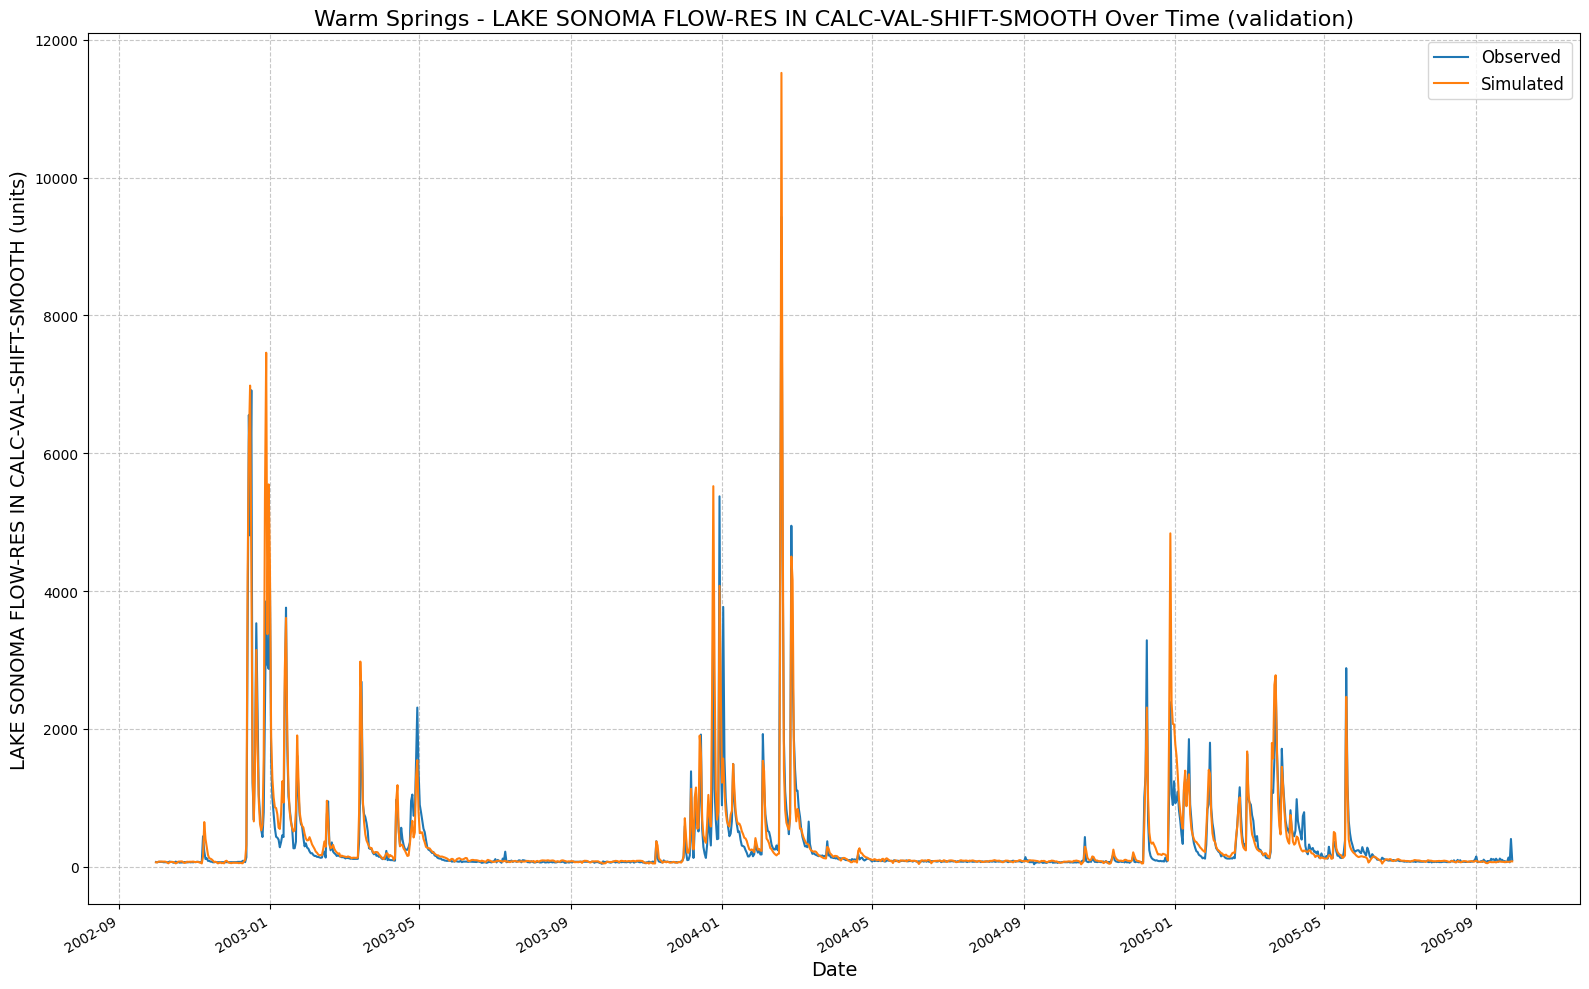

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230027\results_output_validation.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [14]:
if not skip_best_model_train:
    lstmNoPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=False,
        gpu=0
    )
    lstmNoPhysicsValBest.train()
    no_physics_val_csv, no_physics_val_metrics = lstmNoPhysicsValBest.results()
    no_physics_val_metrics

2025-03-11 23:00:37,216: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230037\output.log initialized.
2025-03-11 23:00:37,217: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230037
2025-03-11 23:00:37,217: ### Run configurations for testing_run
2025-03-11 23:00:37,218: experiment_name: testing_run
2025-03-11 23:00:37,219: train_basin_file: warm springs
2025-03-11 23:00:37,219: validation_basin_file: warm springs
2025-03-11 23:00:37,219: test_basin_file: warm springs
2025-03-11 23:00:37,220: train_start_date: 1994-10-01 00:00:00
2025-03-11 23:00:37,221: train_end_date: 2002-09-30 00:00:00
2025-03-11 23:00:37,221: validation_start_date: 2002-10-01 00:00:00
2025-03-11 23:00:37,221: validation_end_date: 2005-09-30 00:00:00
2025-03-11 23:00:37,222: test_start_date: 2005-10-01 00:00:00
2025-03-11 23:00:37,222: test_end_date: 2009-09-2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]
2025-03-11 23:00:45,351: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230037\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:00:45,352: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230037\validation\model_epoch032\validation_results.p
got predictions


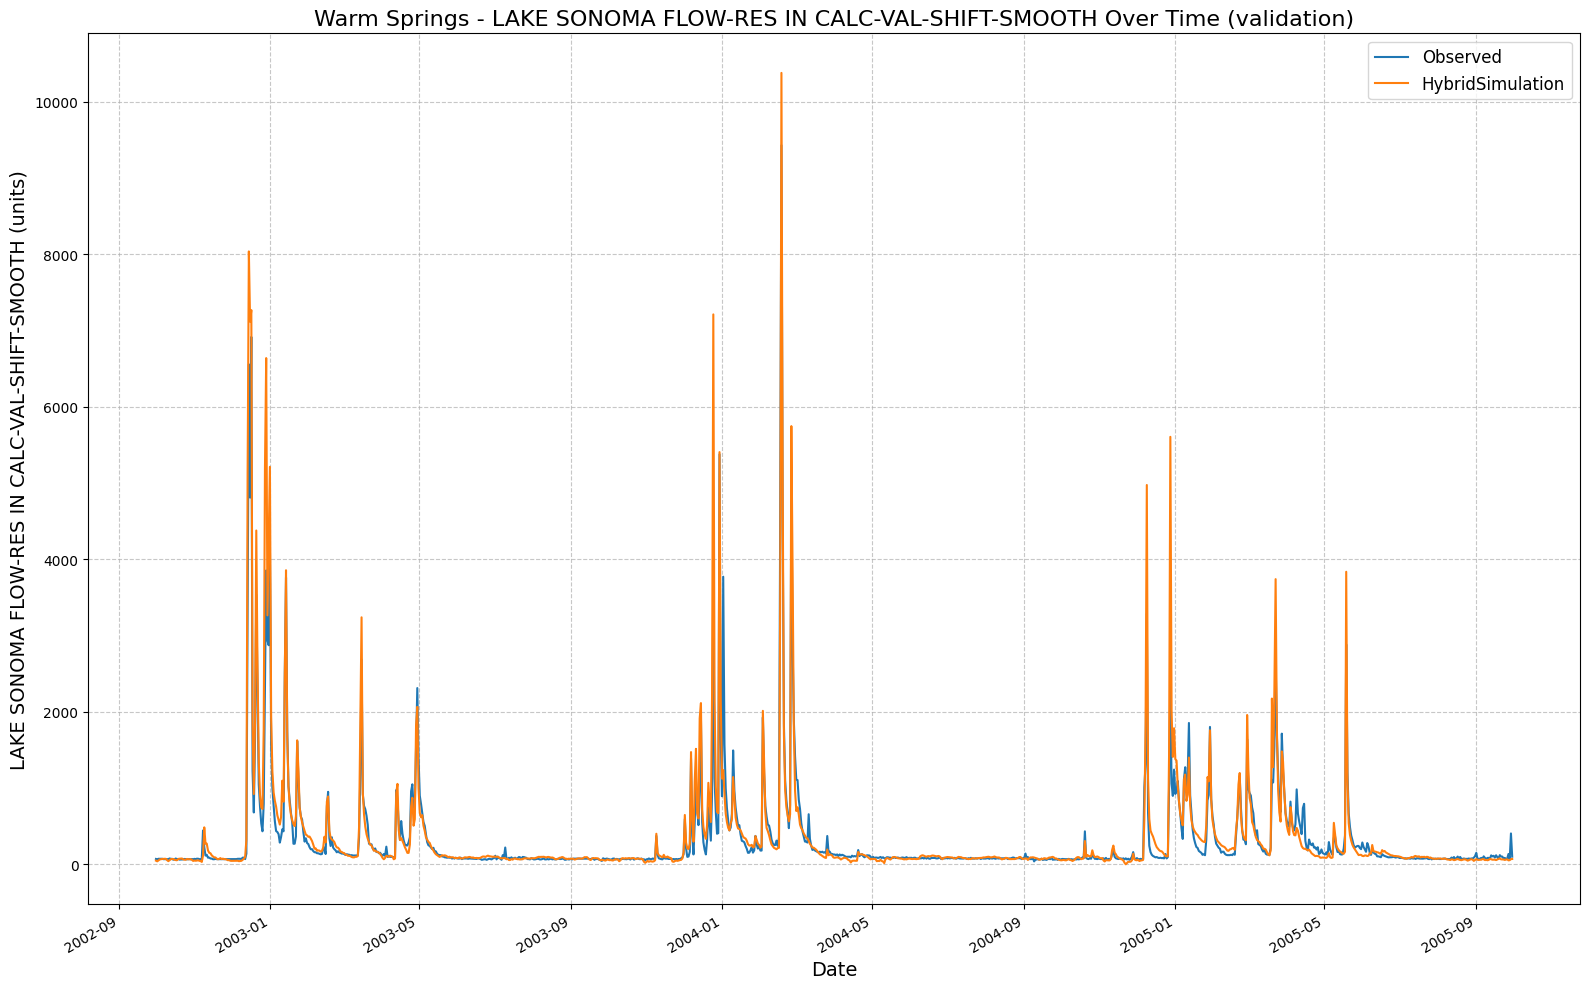

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230037\results_output_validation.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [15]:
if not skip_best_model_train:
    lstmPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=False,
        gpu=0
    )
    lstmPhysicsValBest.train()
    physics_val_csv, physics_val_metrics = lstmPhysicsValBest.results()
    physics_val_metrics

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\

[INFO] Wrote metrics CSV: CV_warm_springs_daily_val_metrics.csv
[INFO] Saved figure: CV_warm_springs_daily_val_model_comparison.png


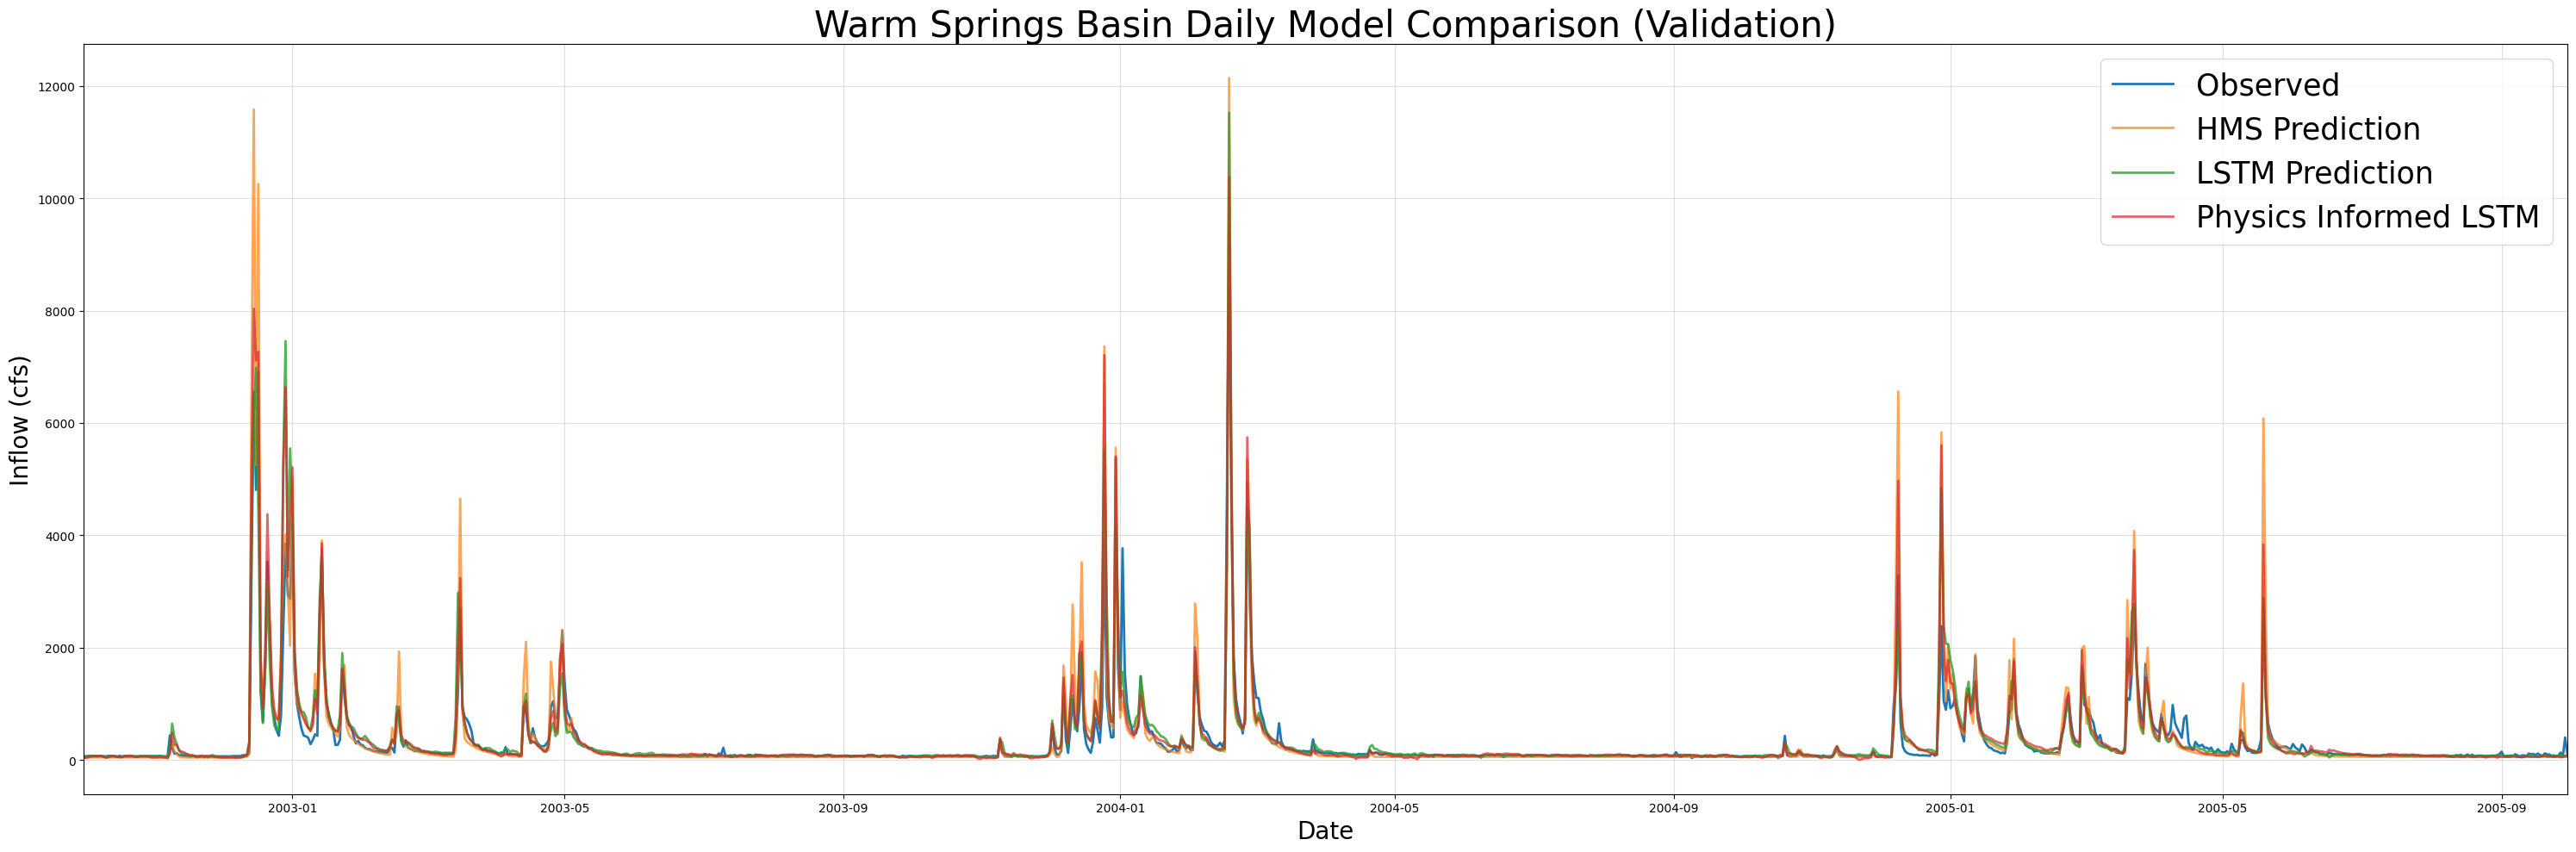

In [16]:
if not skip_best_model_train:
    combinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title="Warm Springs Basin Daily Model Comparison (Validation)",
        fName="CV_warm_springs_daily_val_metrics.csv",
        plot_filename="CV_warm_springs_daily_val_model_comparison.png",
        timeseries_filename ="CV_warm_springs_daily_val_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("CV_warm_springs_daily_val_combined_ts.csv")
    combinedPlotFromDf(combined_df, title="Warm Springs Basin Daily Model Comparison (Validation)", fName="CV_warm_springs_daily_val_metrics.csv")

In [17]:
if not skip_best_model_train:
    fancyCombinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title='Warm Springs Basin Daily Model Comparison (Validation)',
        fName="CV_warm_springs_daily_val_metrics.csv",
        timeseries_filename ="CV_warm_springs_daily_val_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(combined_df, title='Warm Springs Basin Daily Model Comparison (Validation)',
                             fName="CV_warm_springs_daily_val_metrics.csv")

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\

[INFO] Wrote metrics CSV: CV_warm_springs_daily_val_metrics.csv


In [18]:
if skip_best_model_train:
    val_metrics = pd.read_csv("CV_warm_springs_daily_val_metrics.csv", index_col=0)
    print(val_metrics)

### Re-run testing with best hyperparameters

2025-03-11 23:00:48,788: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\output.log initialized.
2025-03-11 23:00:48,789: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048
2025-03-11 23:00:48,789: ### Run configurations for testing_run
2025-03-11 23:00:48,790: experiment_name: testing_run
2025-03-11 23:00:48,790: train_basin_file: warm springs
2025-03-11 23:00:48,791: validation_basin_file: warm springs
2025-03-11 23:00:48,791: test_basin_file: warm springs
2025-03-11 23:00:48,791: train_start_date: 1994-10-01 00:00:00
2025-03-11 23:00:48,792: train_end_date: 2005-09-30 00:00:00
2025-03-11 23:00:48,792: validation_start_date: 2002-10-01 00:00:00
2025-03-11 23:00:48,792: validation_end_date: 2005-09-30 00:00:00
2025-03-11 23:00:48,793: test_start_date: 2005-10-01 00:00:00
2025-03-11 23:00:48,793: test_end_date: 2009-09-2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
2025-03-11 23:01:02,369: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:01:02,371: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\validation\model_epoch032\validation_results.p
2025-03-11 23:01:02,382: Using the model weights from c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\model_epoch032.pt


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
2025-03-11 23:01:02,636: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\test\model_epoch032\test_metrics.csv
2025-03-11 23:01:02,637: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\test\model_epoch032\test_results.p
got predictions


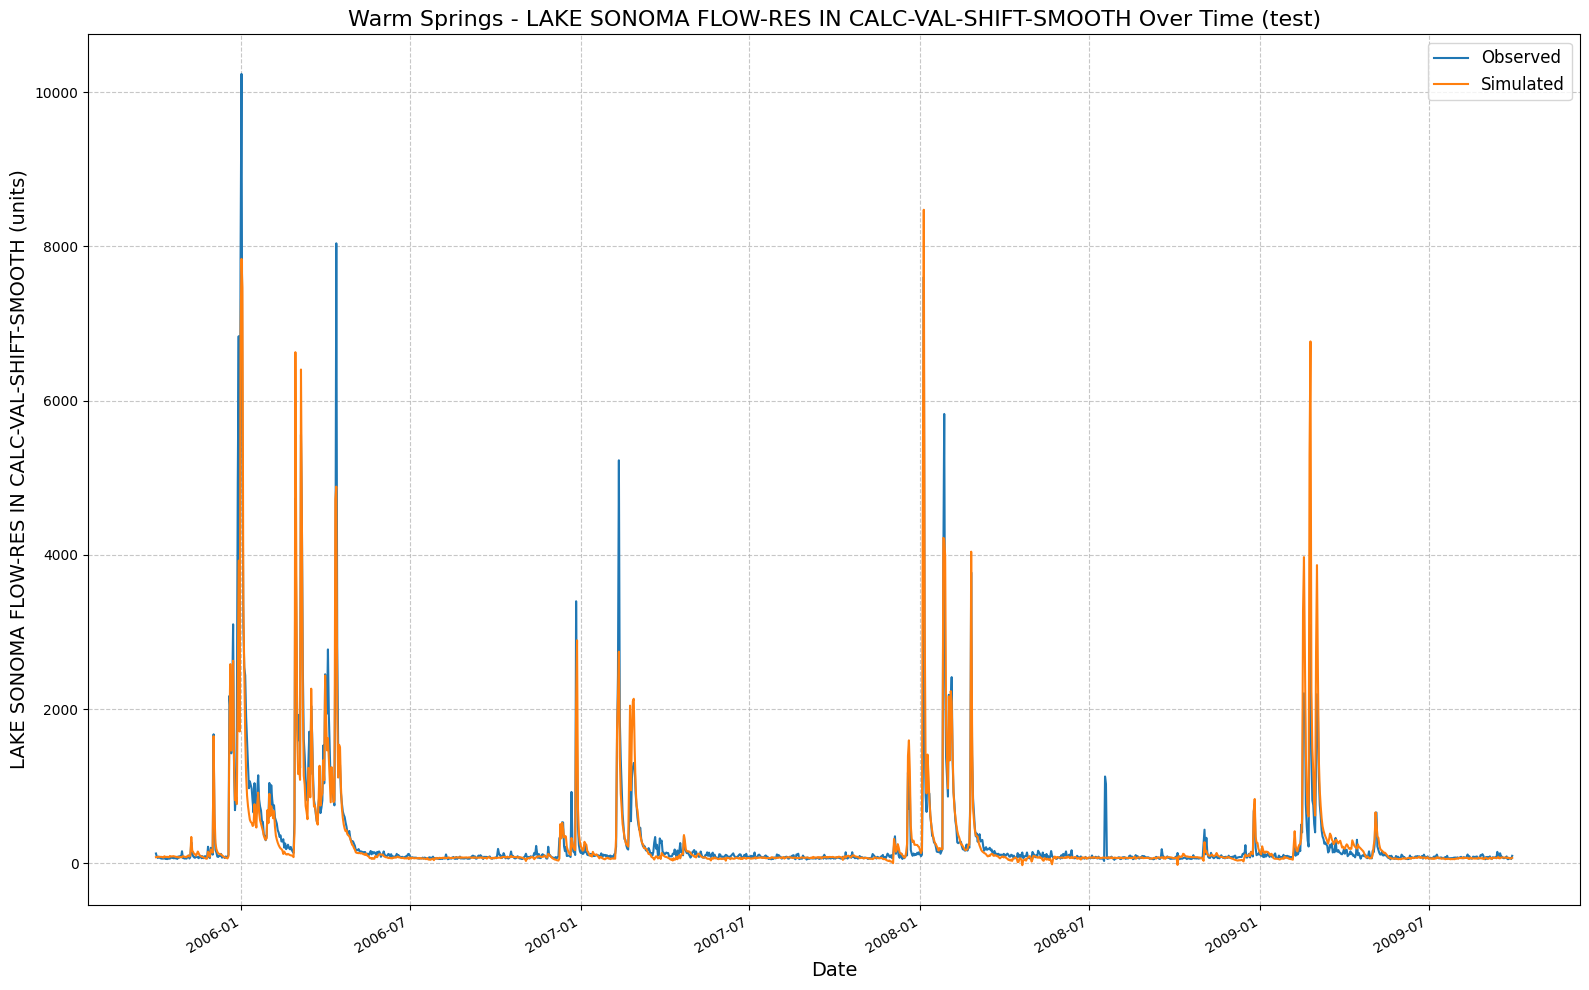

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230048\results_output_test.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [19]:
if not skip_best_model_train:
    lstmNoPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=True,  
        gpu=0
    )
    
    lstmNoPhysicsExtBest.train()
    no_physics_test_csv, no_physics_test_metrics = lstmNoPhysicsExtBest.results('test')
    no_physics_test_metrics

2025-03-11 23:01:02,970: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\output.log initialized.
2025-03-11 23:01:02,971: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102
2025-03-11 23:01:02,971: ### Run configurations for testing_run
2025-03-11 23:01:02,971: experiment_name: testing_run
2025-03-11 23:01:02,972: train_basin_file: warm springs
2025-03-11 23:01:02,972: validation_basin_file: warm springs
2025-03-11 23:01:02,973: test_basin_file: warm springs
2025-03-11 23:01:02,973: train_start_date: 1994-10-01 00:00:00
2025-03-11 23:01:02,974: train_end_date: 2005-09-30 00:00:00
2025-03-11 23:01:02,974: validation_start_date: 2002-10-01 00:00:00
2025-03-11 23:01:02,975: validation_end_date: 2005-09-30 00:00:00
2025-03-11 23:01:02,975: test_start_date: 2005-10-01 00:00:00
2025-03-11 23:01:02,975: test_end_date: 2009-09-2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]
2025-03-11 23:01:12,774: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\validation\model_epoch032\validation_metrics.csv
2025-03-11 23:01:12,776: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\validation\model_epoch032\validation_results.p
2025-03-11 23:01:12,791: Using the model weights from c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\model_epoch032.pt


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]
2025-03-11 23:01:13,168: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\test\model_epoch032\test_metrics.csv
2025-03-11 23:01:13,170: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\test\model_epoch032\test_results.p
got predictions


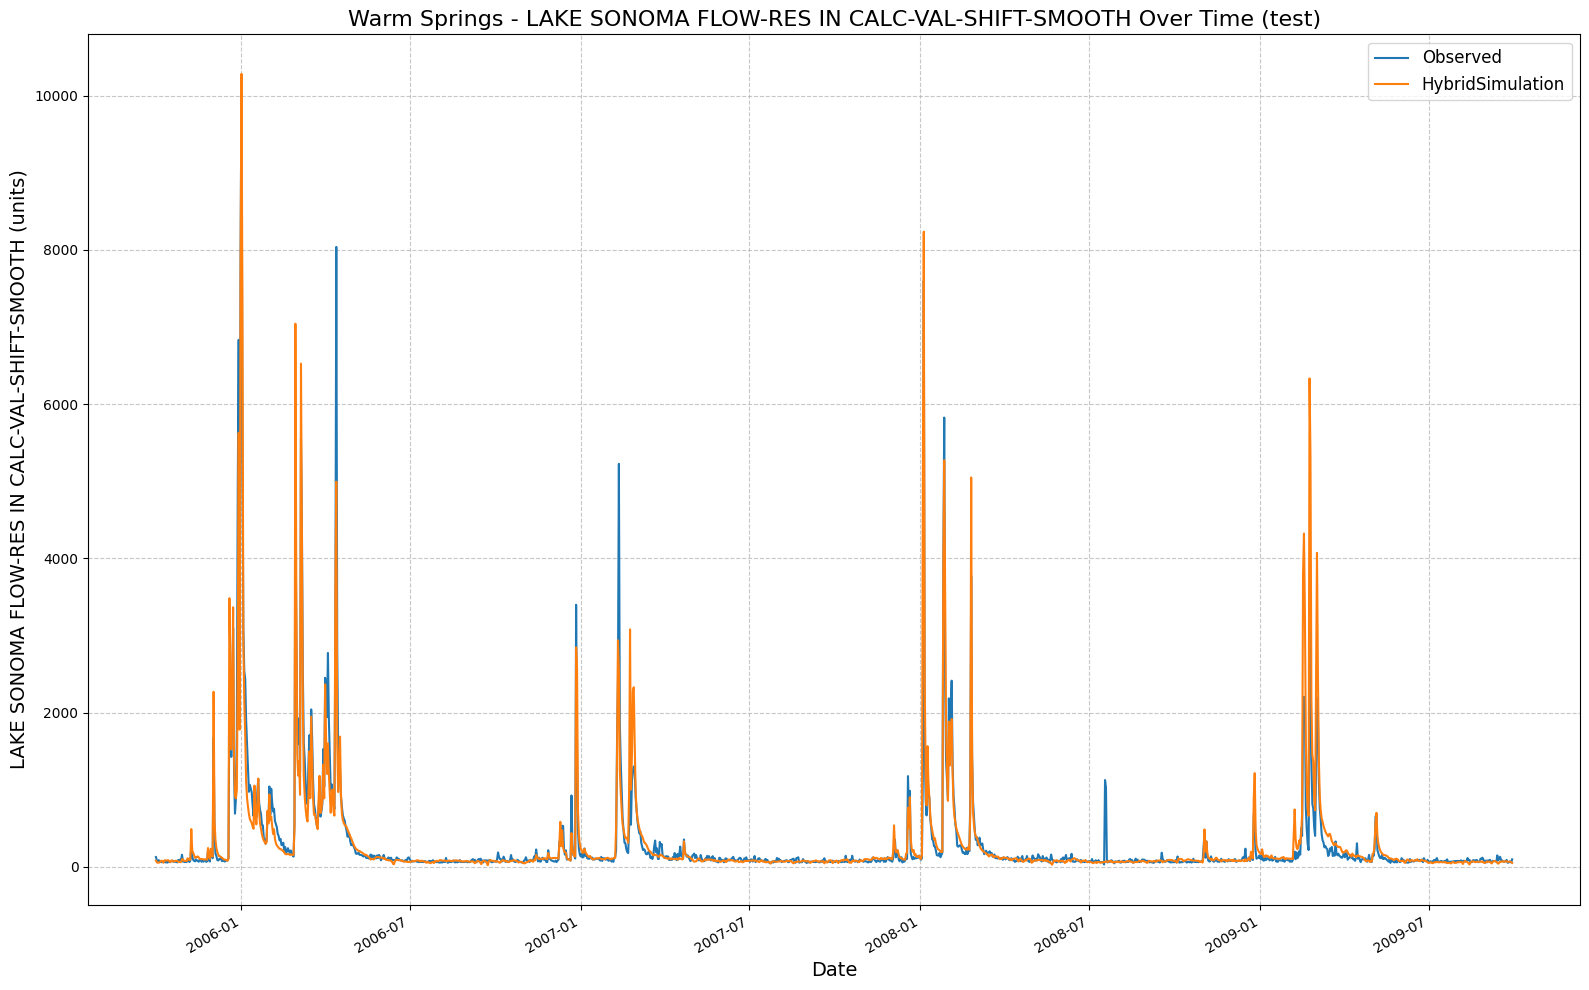

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1103_230102\results_output_test.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [20]:
if not skip_best_model_train:
    lstmPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=True,
        gpu=0
    )
    
    lstmPhysicsExtBest.train()
    physics_test_csv, physics_test_metrics = lstmPhysicsExtBest.results('test')
    physics_test_metrics

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h'

[INFO] Wrote metrics CSV: CV_warm_springs_daily_test_metrics.csv
[INFO] Saved figure: CV_warm_springs_daily_test_model_comparison.png


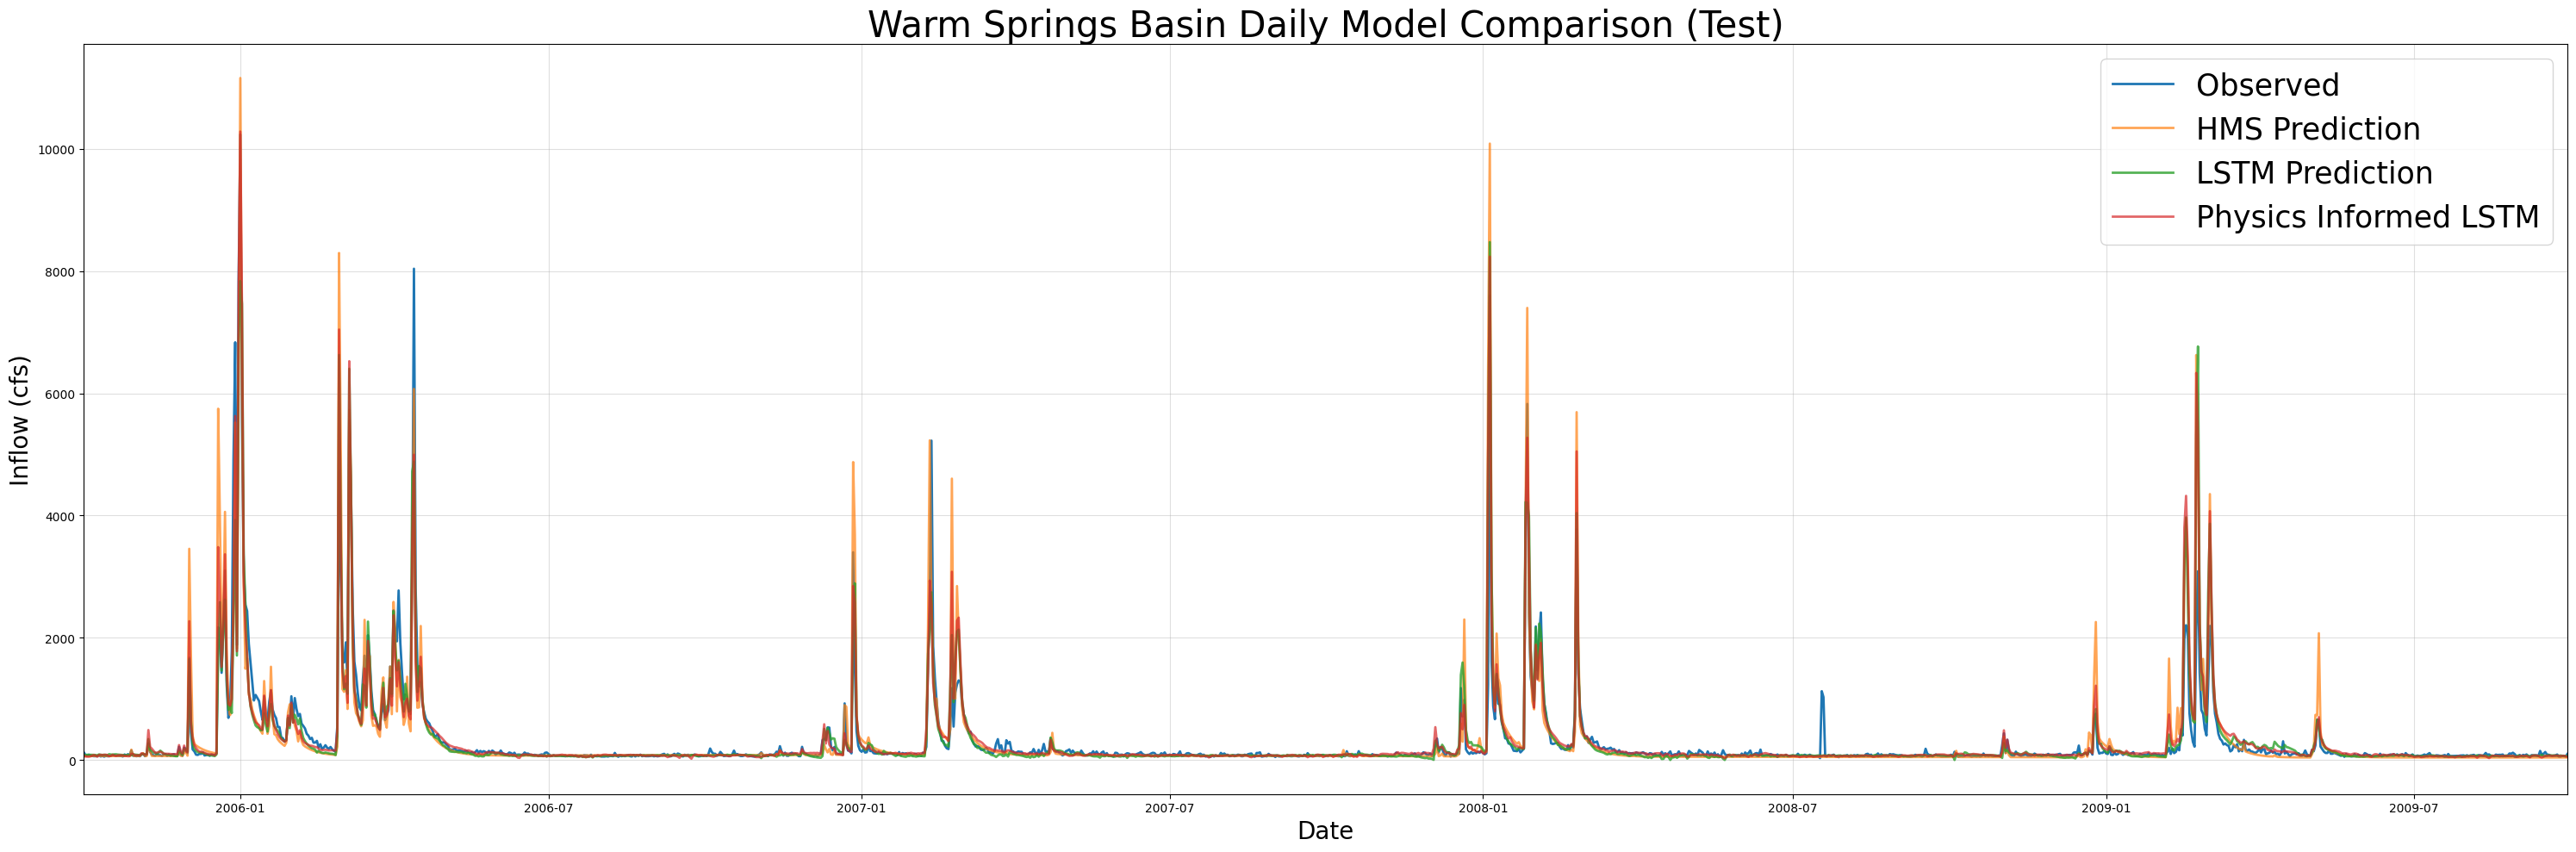

In [21]:
if not skip_best_model_train:
    combinedPlot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Warm Springs Basin Daily Model Comparison (Test)",
        fName="CV_warm_springs_daily_test_metrics.csv",
        plot_filename="CV_warm_springs_daily_test_model_comparison.png",
        timeseries_filename ="CV_warm_springs_daily_test_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("CV_warm_springs_daily_test_combined_ts.csv")
    combinedPlotFromDf(combined_df, title="Warm Springs Basin Daily Model Comparison (Test)", fName="CV_warm_springs_daily_test_metrics.csv")

In [22]:
if not skip_best_model_train:
    fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Warm Springs Basin Daily Model Comparison', fName = "CV_warm_springs_daily_test_metrics.csv", timeseries_filename ="CV_warm_springs_daily_test_combined_ts.csv")
else:
    fancyCombinedPlotFromDf(combined_df, title='Warm Springs Basin Daily Model Comparison', fName = "CV_warm_springs_daily_test_metrics.csv")

[INFO] Wrote metrics CSV: CV_warm_springs_daily_test_metrics.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h'

In [23]:
if skip_best_model_train:
    test_metrics = pd.read_csv("CV_warm_springs_daily_test_metrics.csv", index_col=0)
    print(test_metrics)